In [1]:
# Add the root path of the pyqula library
import os ; import sys
try: sys.path.append(os.environ["PYQULAROOT"]) # add the library via environmental variable
except: 
    try: from pyqula import geometry # check if the library is present
    except: print("Install pyqula with\npip install --upgrade pyqula") # pyqula must be installed
    # you can uncomment the following lines to install it automatically
    #import subprocess ; subprocess.check_call([sys.executable, "-m", "pip", "install", "pyqula"])

# some default parameters in matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['font.size'] = 22
plt.rcParams['image.cmap'] = 'coolwarm'

# parallelization
# from pyqula import parallel ; parallel.set_cores("max") # uncomment to use all the cores

import numpy as np

# Superconductivity in 2D materials
In this session we will address several different examples involving superconductivity
### Contents
- Superconductivity driven by interactions
- Impact of spin-orbit coupling in superconductivity
- Impact of magnetism in superconductivity
- Artificial topological superconductivity

### Learning outcomes
- Understand which interactions promote superconductivity, and how the electronic structure gets modified
- Understand which perturbations are detrimental to superconductivity
- Understand how unconventional superconductors can be engineered in 2D materials

### The impact of superconductivity in an electronic structure
Let us first show how a superconducting order affects an electronic structure. For this, let us change the chemical potential of a lattice, and include spin-singlet superconductivity in the different cases

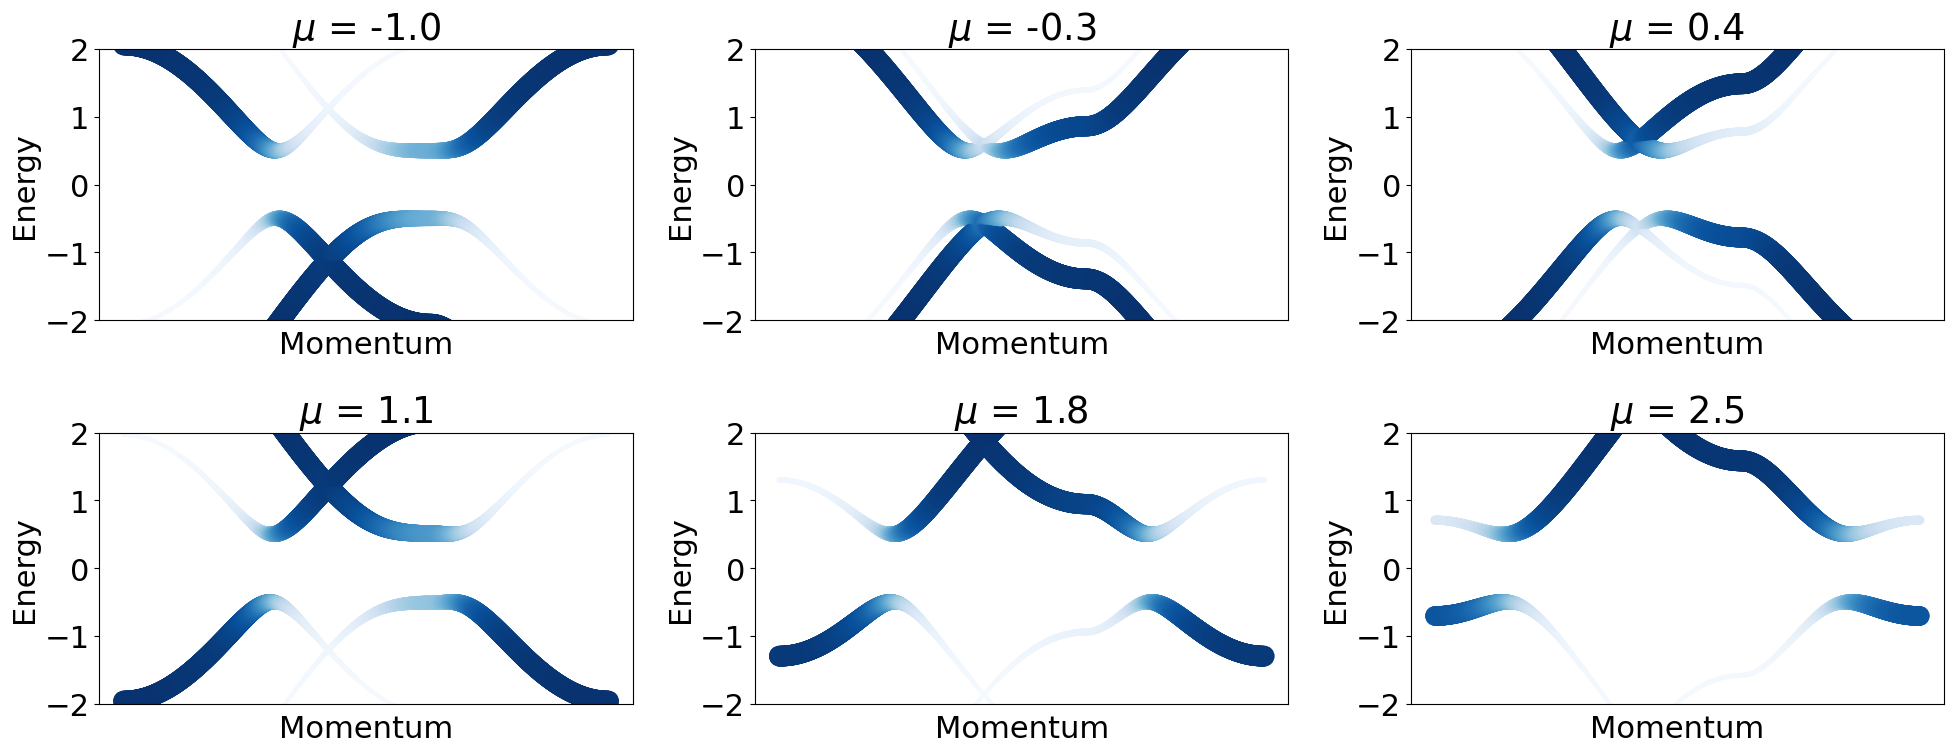

In [2]:
from pyqula import geometry
mus = np.linspace(-1.,2.5,6) # chemical potentials
g = geometry.honeycomb_lattice() # take a triangular lattice
iw = 1 # counter
delta = 0.5 # value of the superconducting order
for mu in mus: # loop over local potentials
    h = g.get_hamiltonian() # generate Hamiltonian
    h.add_onsite(mu) # shift chemical potential
    h.add_swave(delta) # add superconductivity 
    plt.subplot(2,len(mus)//2,iw) 
    iw +=1 ; plt.title("$\mu$ = "+str(np.round(mu,3)))
    (k,e,c) = h.get_bands(operator="electron",kpath=["G","K","M","G"]) # compute band structure
    plt.scatter(k,e,c=c,s=200*c,cmap="Blues") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") 
    plt.xticks([]) ; plt.ylim([-2.,2.]) # plot
plt.tight_layout() # adjust

### Exercise
- Switch off the superconducting order. Do you still see a gap at the different chemical potentials?
- Does the gap depend on the chemical potential for finite superconducting order?
- Replace the honeycomb lattice by any other type of lattice. Do you still see a gap opening for different chemical potentials?

## Nambu electronic structure
First, let us see how the electronic structuer is represented in the Nambu basis

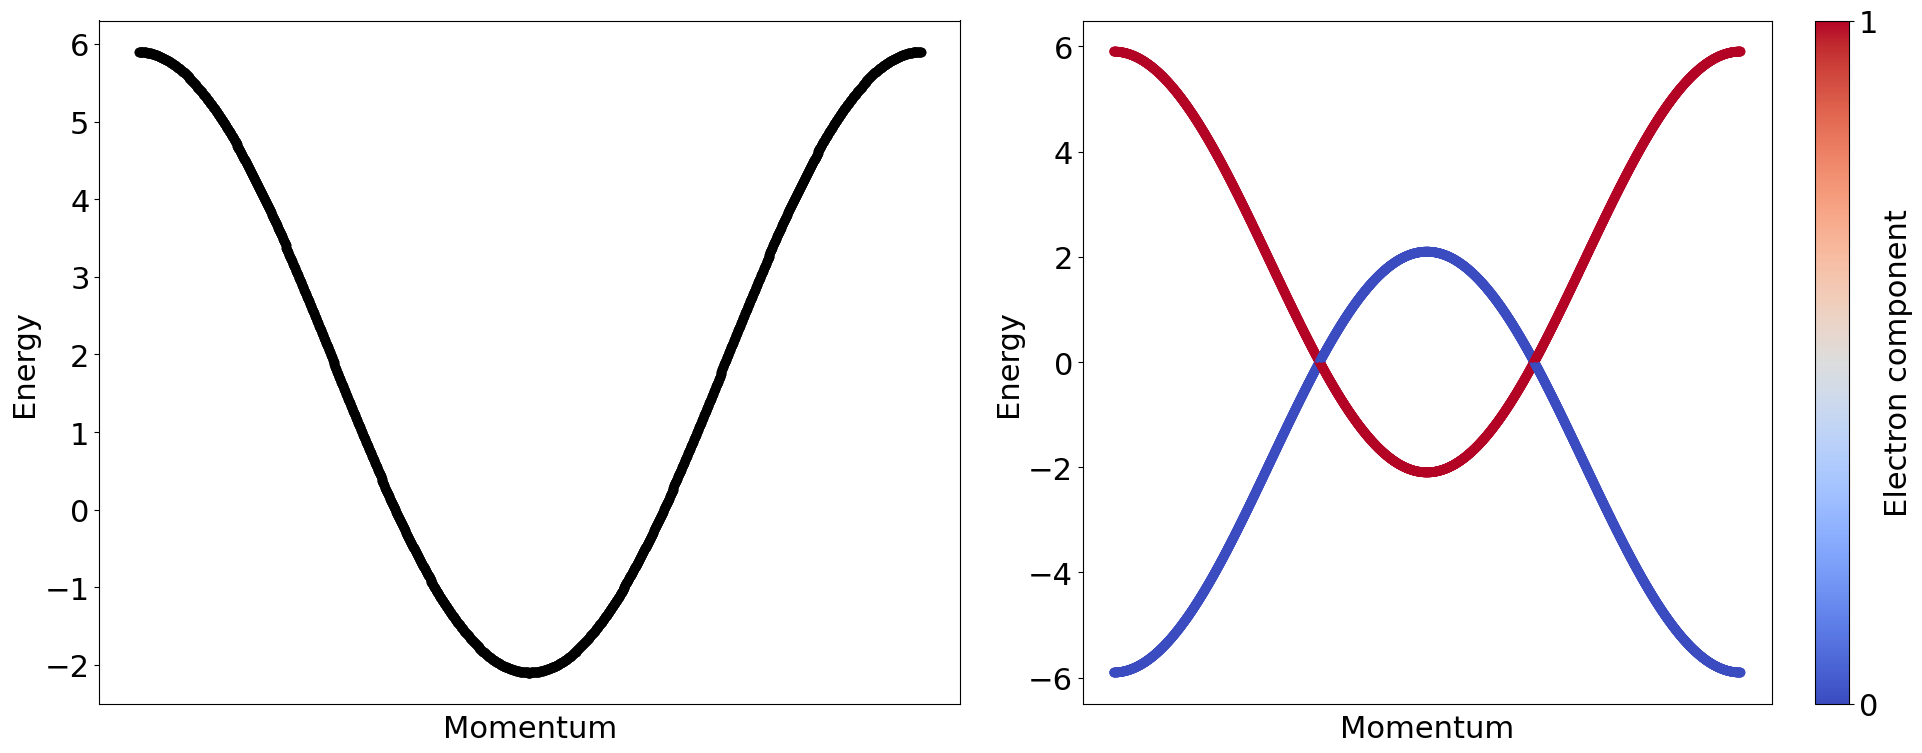

In [3]:
from pyqula import geometry
# as a warm up, let us look at how the bands look like if we added a Nambu spinor
# first, let us see how the band structure looks like
g = geometry.square_lattice() # generate a square lattice
h = g.get_hamiltonian() # generate the Hamiltonian
h.set_filling(0.2,nk=20) # set filling


# first without Nambu spinor
plt.subplot(1,2,1)
(k,e) = h.get_bands(nk=800) # compute band structure, returning the electron-hole flavor
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot


# now with a Nambu spinor
plt.subplot(1,2,2)
h.setup_nambu_spinor() # setup the nambu spinor
(k,e,c) = h.get_bands(operator="electron",nk=800) # compute band structure, returning the electron-hole flavor
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot
plt.colorbar(label="Electron component",ticks=[0.,1.])

plt.tight_layout()

### Exercise
- Discuss how the bands with a Nambu spinor can be understood in terms of the bands without a Nambu spinor

## s-wave superconductivity driven by attractive interactions
First, we will show how a superconducting state appears due to attractive interactions

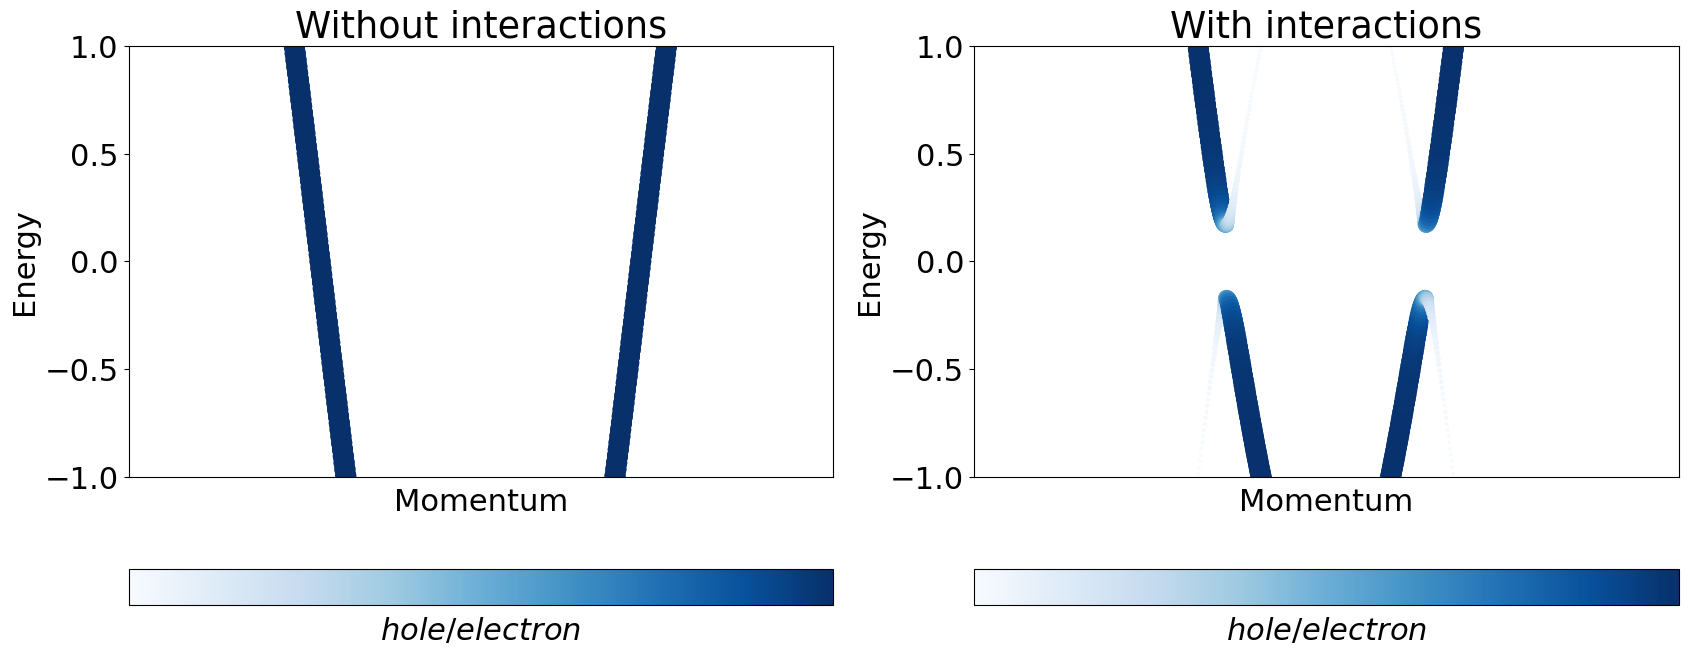

In [4]:
from pyqula import geometry
# now, let us include attractive interactions at the mean-field level
g = geometry.square_lattice() # generate a square lattice
h = g.get_hamiltonian() # generate the Hamiltonian
h.setup_nambu_spinor() # setup the nambu spinor

def plot_case(hscf):
    (k,e,c) = hscf.get_bands(operator="electron",nk=800) # compute band structure
    plt.scatter(k,e,c=c,s=200*c,cmap="Blues") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") 
    plt.xticks([]) ; plt.ylim([-1,1]) ; plt.colorbar(label="$hole/electron$",ticks=[],orientation="horizontal")

# first, let us see how the band structure looks like without interactions
plt.subplot(1,2,1) ; plt.title("Without interactions")
plot_case(h)

# now, let us see how the band structure looks like with interactions
hscf = h.get_mean_field_hamiltonian(U=-2.0,filling=0.2,nk=10,mix=0.9,mf="swave")
plt.subplot(1,2,2) ; plt.title("With interactions")
plot_case(hscf)



### Exercise
- Identify the superconducting gap that appear due to interactions
- Increase the value of the attractive interactions. What happens to the superconducting gap?

## Dependence on the attractive interaction
Let us now see how the superconducting order depends on teh strength of the interaction

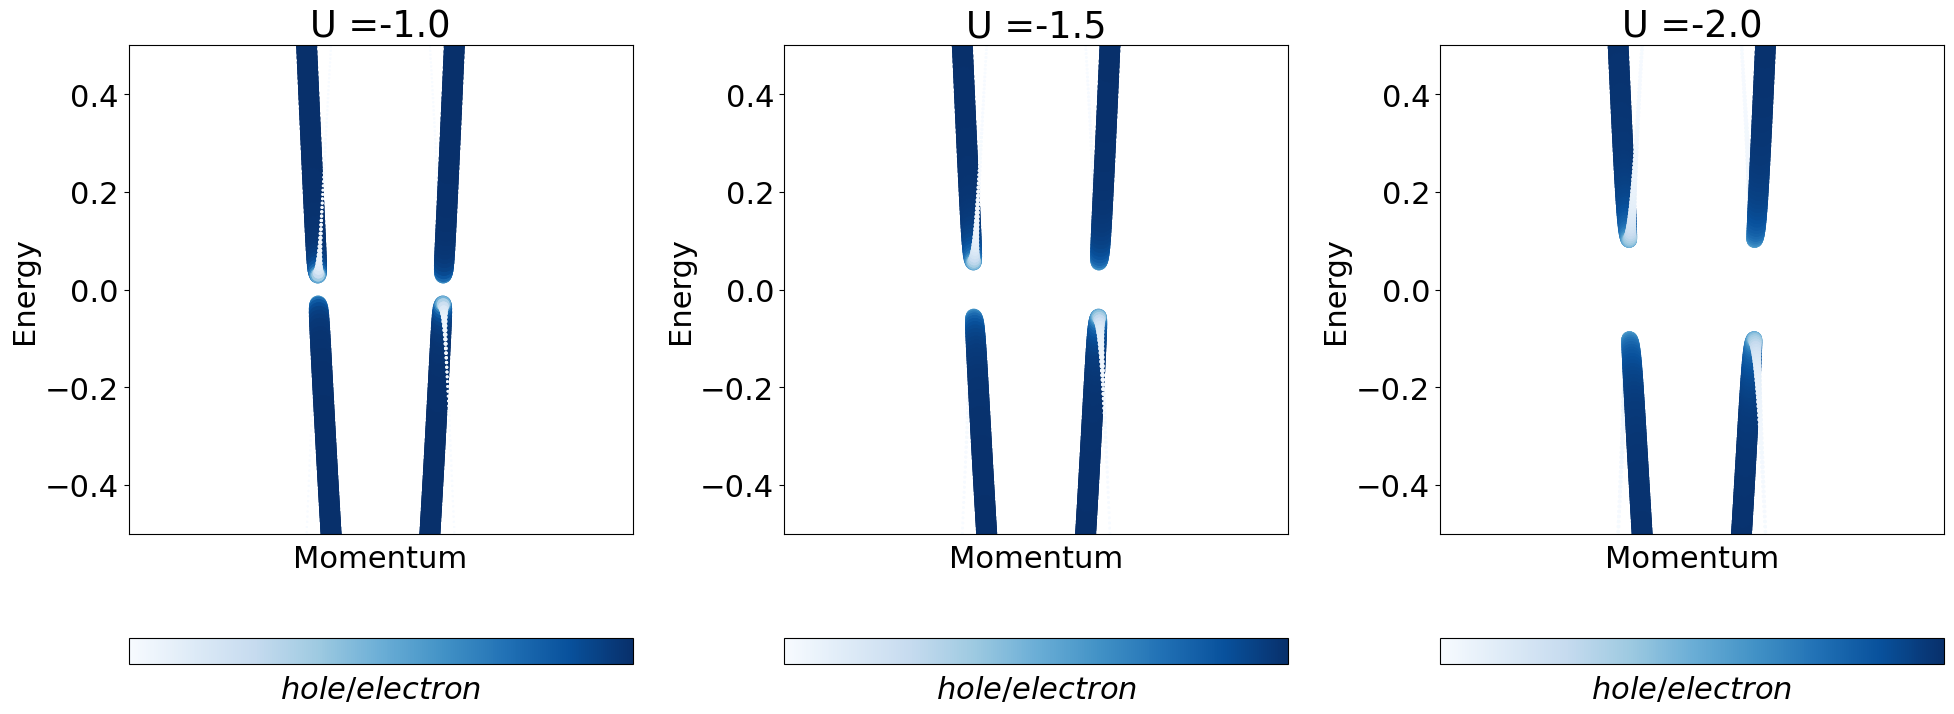

In [5]:
from pyqula import geometry
# We now compare the band structure for different interaction strength
g = geometry.square_lattice() # generate a square lattice
h = g.get_hamiltonian() # generate the Hamiltonian
h.setup_nambu_spinor() # setup the nambu spinor
Us = [-1.0,-1.5,-2.0]
iu = 0
# h.add_exchange([0.,0.,0.1]) # to add a Zeeman field
for U in Us: # loop over interaction strength
    hscf = h.get_mean_field_hamiltonian(U=U,filling=0.1,nk=10,mix=0.9,mf="swave")
    # first, let us see how the band structure looks like
    (k,e,c) = hscf.get_bands(operator="electron",nk=2000) # compute band structure
    plt.subplot(1,len(Us),iu+1) ; iu += 1
    plt.scatter(k,e,c=c,s=200*c,cmap="Blues") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") 
    plt.xticks([]) ; plt.ylim([-.5,.5]) ; plt.title("U ="+str(U)) 
    plt.colorbar(label="$hole/electron$",ticks=[],orientation="horizontal")
    
plt.tight_layout()

### Exercise
- Perform the selfconsistent calculation above including an external Zeeman field. Does the superconducting gap become bigger or smaller? This effect is known as paramagnetic depairing.

## Unconventional singlet superconducting orders
In the example above we considered the simplest superconducting case, an s-wave superconductor. Let us now address other types of superconducting order parameters

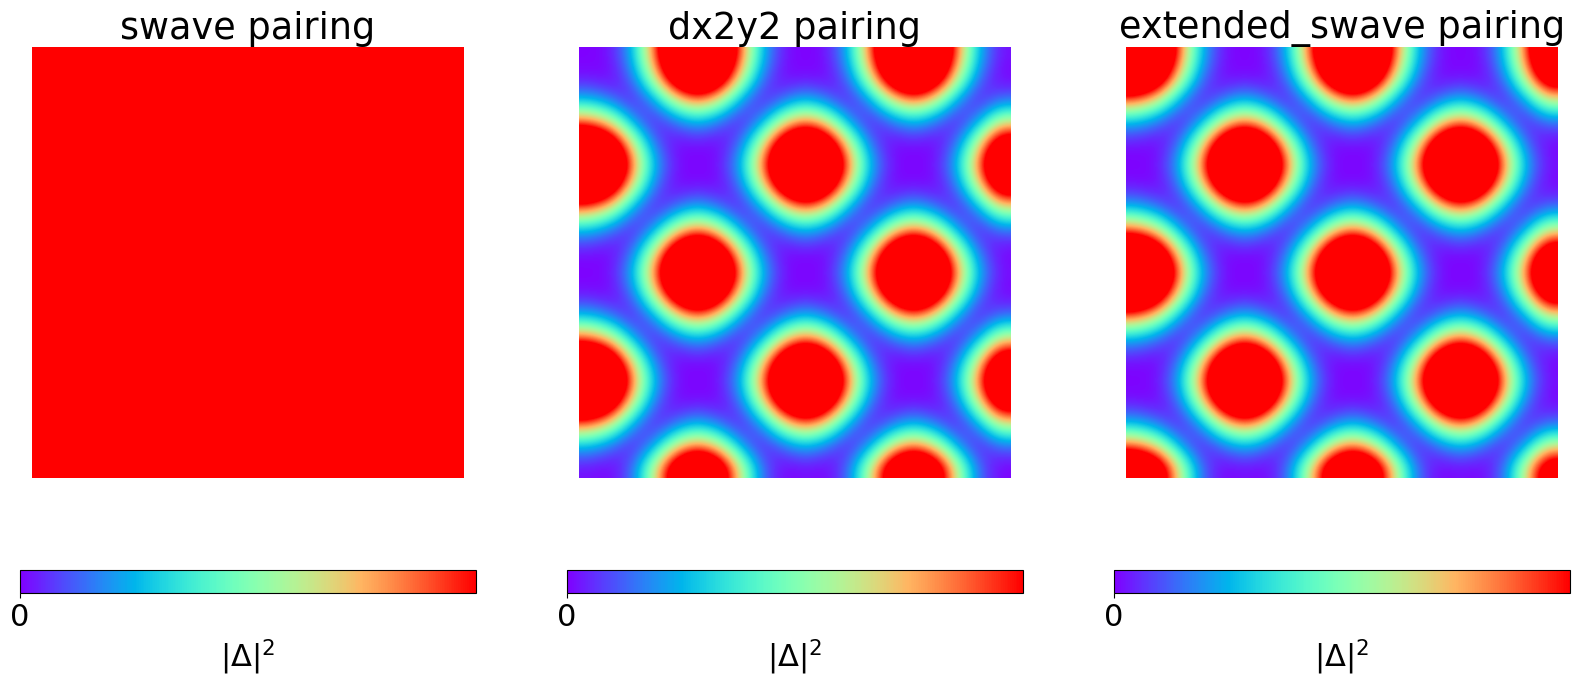

In [6]:
from pyqula import geometry
g = geometry.square_lattice() # generate a square lattice

# define a function to return pairing in reciprocal space
def deltak(mode): # function to extract the pairing from a geometry
    h = g.get_hamiltonian() # generate Hamiltonian
    h.add_pairing(mode=mode,delta=0.2) # extract the spin-singlet component in reciprocal space
    nk = 20 # number of k-points
    (kx,ky,ds) = h.extract("deltak",nk=nk,mode="all") # extract pairing in reciprocal space
    ds = ds.reshape((nk,nk)).real # real part
    ds = ds/np.max(np.abs(ds)) # normalize 
    plt.imshow(ds,vmin=0.,vmax=.5,interpolation='bicubic',cmap="rainbow") ; plt.axis("equal") ; plt.axis("off") 
    plt.colorbar(ticks=[0,1],label="$|\Delta|^2$",orientation = 'horizontal')
    plt.title(mode+" pairing")


ps = ["swave","dx2y2","extended_swave"]
ip = 1
for p in ps: # plot all the pairings
    plt.subplot(1,len(ps),ip) ; ip+=1 
    deltak(p)


### Exercise
- Replace the square lattice by a triangular lattice. Which of the orders above break the symmetry of the lattice?
- Discuss how you can see from the plots above that those pairings correspond to a spin singlet state from symmetry considerations
- (Advanced) Does the extended s-wave order lead to a fully gapped superconductor?

## Interaction-induced spin-triplet superconductivity
We will now see that even in systems breaking time-reversal symmetry, superconductivity can emerge

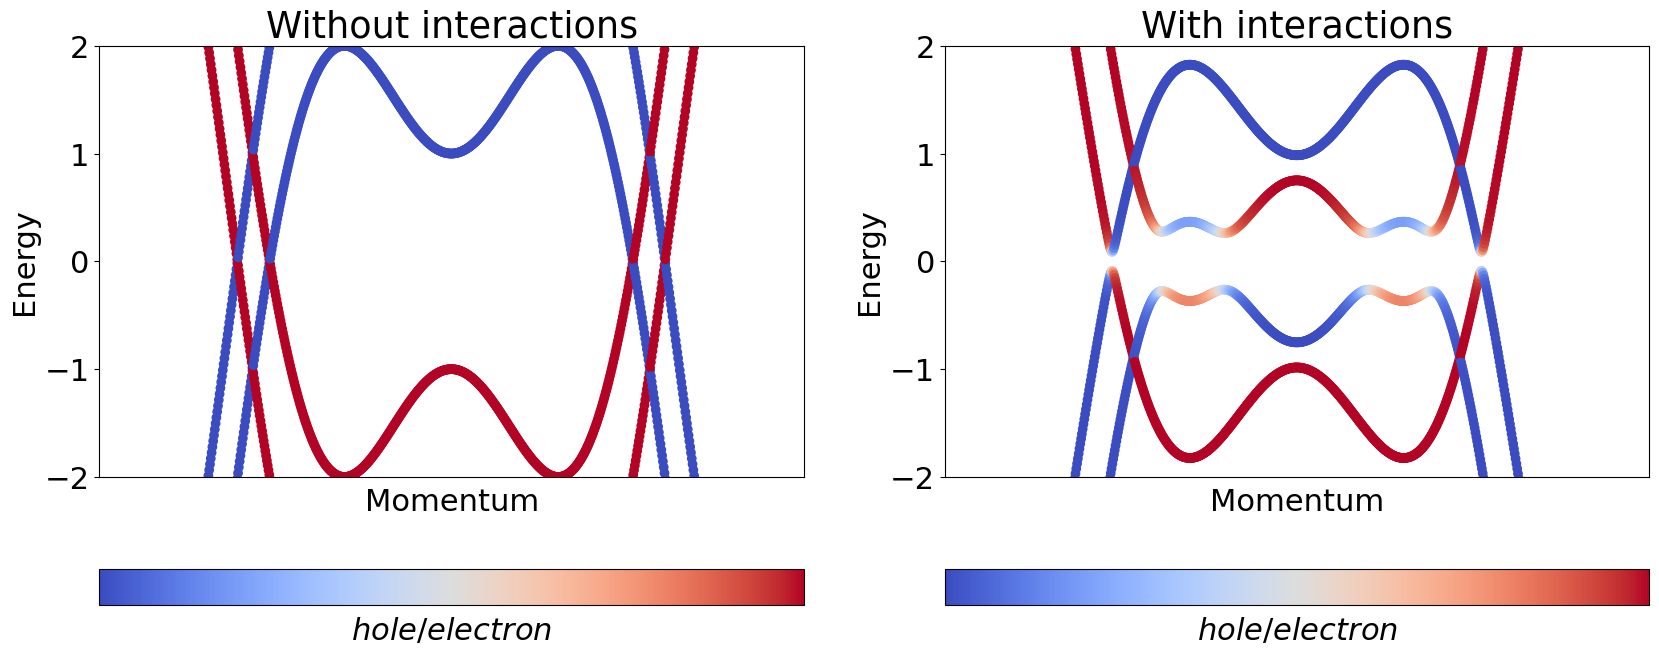

In [7]:
from pyqula import geometry
# now, let us include attractive interactions at the mean-field level
g = geometry.triangular_lattice() # generate a triangular lattice
h = g.get_hamiltonian() # generate the Hamiltonian
h.add_exchange([0.,0.,1.]) # break time-reversal symmetry with an exchange field
h.setup_nambu_spinor() # setup the nambu spinor

def plot_case(hscf):
    (k,e,c) = hscf.get_bands(operator="electron",nk=800) # compute band structure
    plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") 
    plt.xticks([]) ; plt.ylim([-2,2]) ; plt.colorbar(label="$hole/electron$",ticks=[],orientation="horizontal")

# first, let us see how the band structure looks like without interactions
plt.subplot(1,2,1) ; plt.title("Without interactions")
plot_case(h)

# now, let us see how the band structure looks like with interactions
hscf = h.get_mean_field_hamiltonian(V1=-1.0,filling=0.3,mix=0.5,mf="random")
plt.subplot(1,2,2) ; plt.title("With interactions")
plot_case(hscf)


#### In the lab
- Spin triplet superconductivity has been observed in twisted graphene trilayers under an external magnetic field
https://www.nature.com/articles/s41586-021-03685-y

## Topological modes in interaction-driven spin triplet superconductors
Let us now see that the interaction-induced topological superconductor above has topological modes

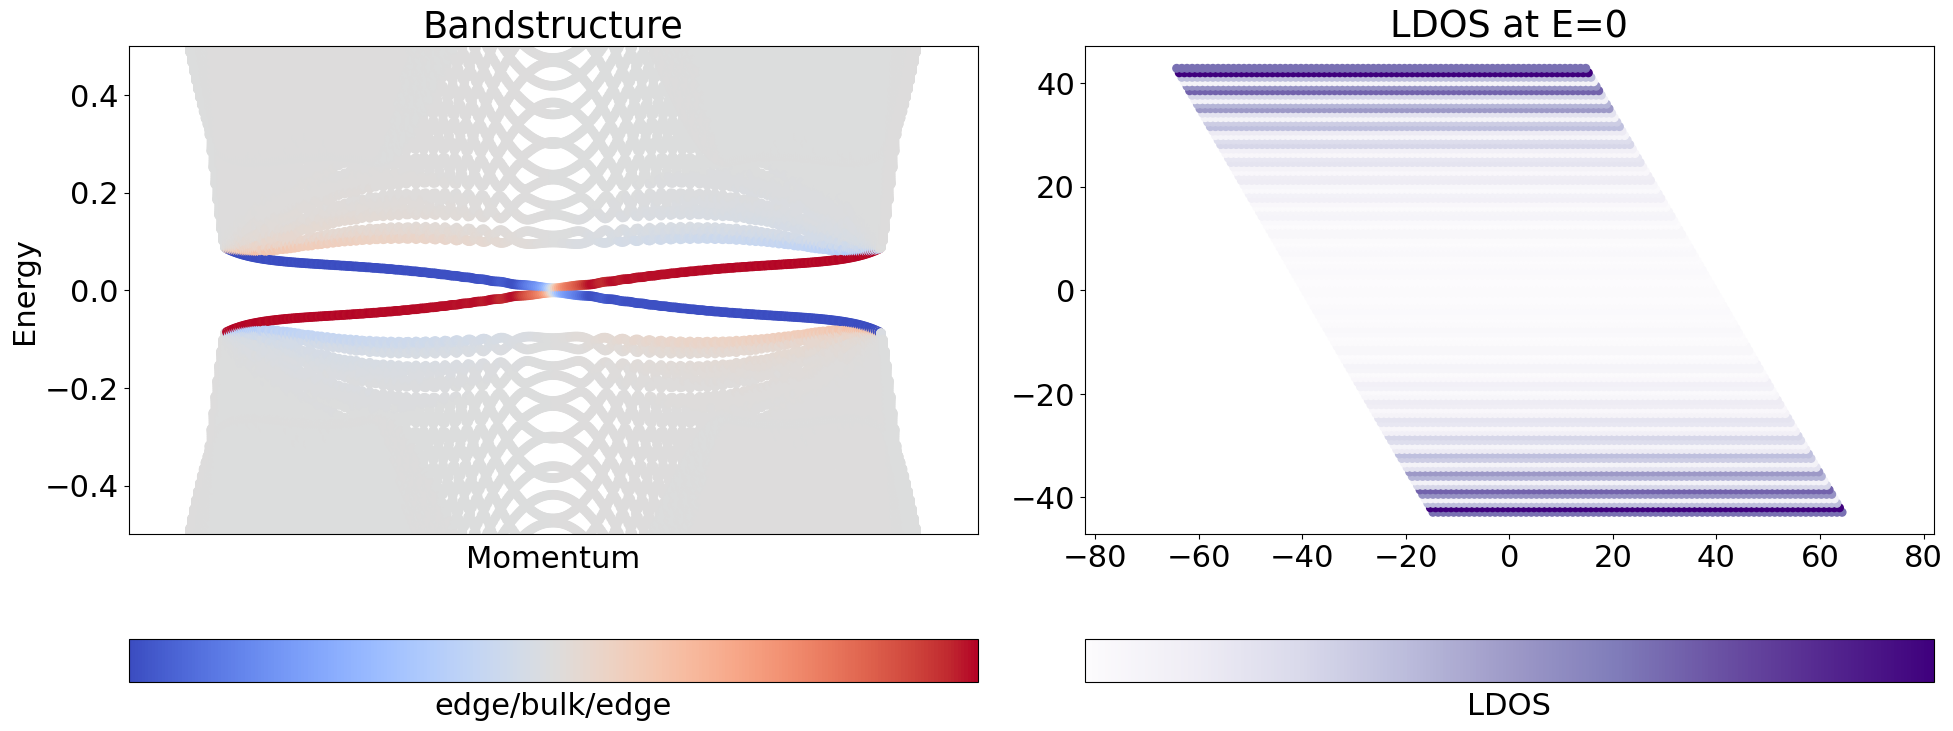

In [8]:
from pyqula import geometry, ribbon

g = geometry.triangular_lattice() # generate a triangular lattice
h = g.get_hamiltonian() # generate the Hamiltonian
h.add_exchange([0.,0.,1.]) # break time-reversal symmetry with an exchange field
h.setup_nambu_spinor() # setup the nambu spinor
h = h.get_mean_field_hamiltonian(V1=-1.,filling=0.3,mix=0.5,mf="random")

# now plot electronic structure in a ribbon
plt.subplot(1,2,1) ; plt.title("Bandstructure") # first the bands
hr = ribbon.bulk2ribbon(h,n=100) # create a ribbon from a bulk Hamiltonian
(k,e,c) = hr.get_bands(operator="yposition",kpath=["X","G","X"]) # plot the bands highlighting the position
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-.5,.5])
plt.colorbar(label="edge/bulk/edge",ticks=[],orientation="horizontal")

plt.subplot(1,2,2) ; plt.title("LDOS at E=0") # now the LDOS
(x,y,d) = hr.get_ldos(energy=0.0,nrep=80,delta=1e-2,nk=50) # compute the local density of states
plt.scatter(x,y,c=d,s=30,cmap="Purples") ; plt.axis("equal") 
plt.colorbar(label="LDOS",ticks=[],orientation="horizontal")

plt.tight_layout() # adjust subplots

### Exercise
- Remove the external exchange field. What happens to the electronic structure of the ribbon?
- Put the exchange field in a different direction. What happens to the electronic structure and why?

## Trivial and topological superconducting order parameters, bulk spectra
Let us now see that a gapped topological state can be trivial or topological.

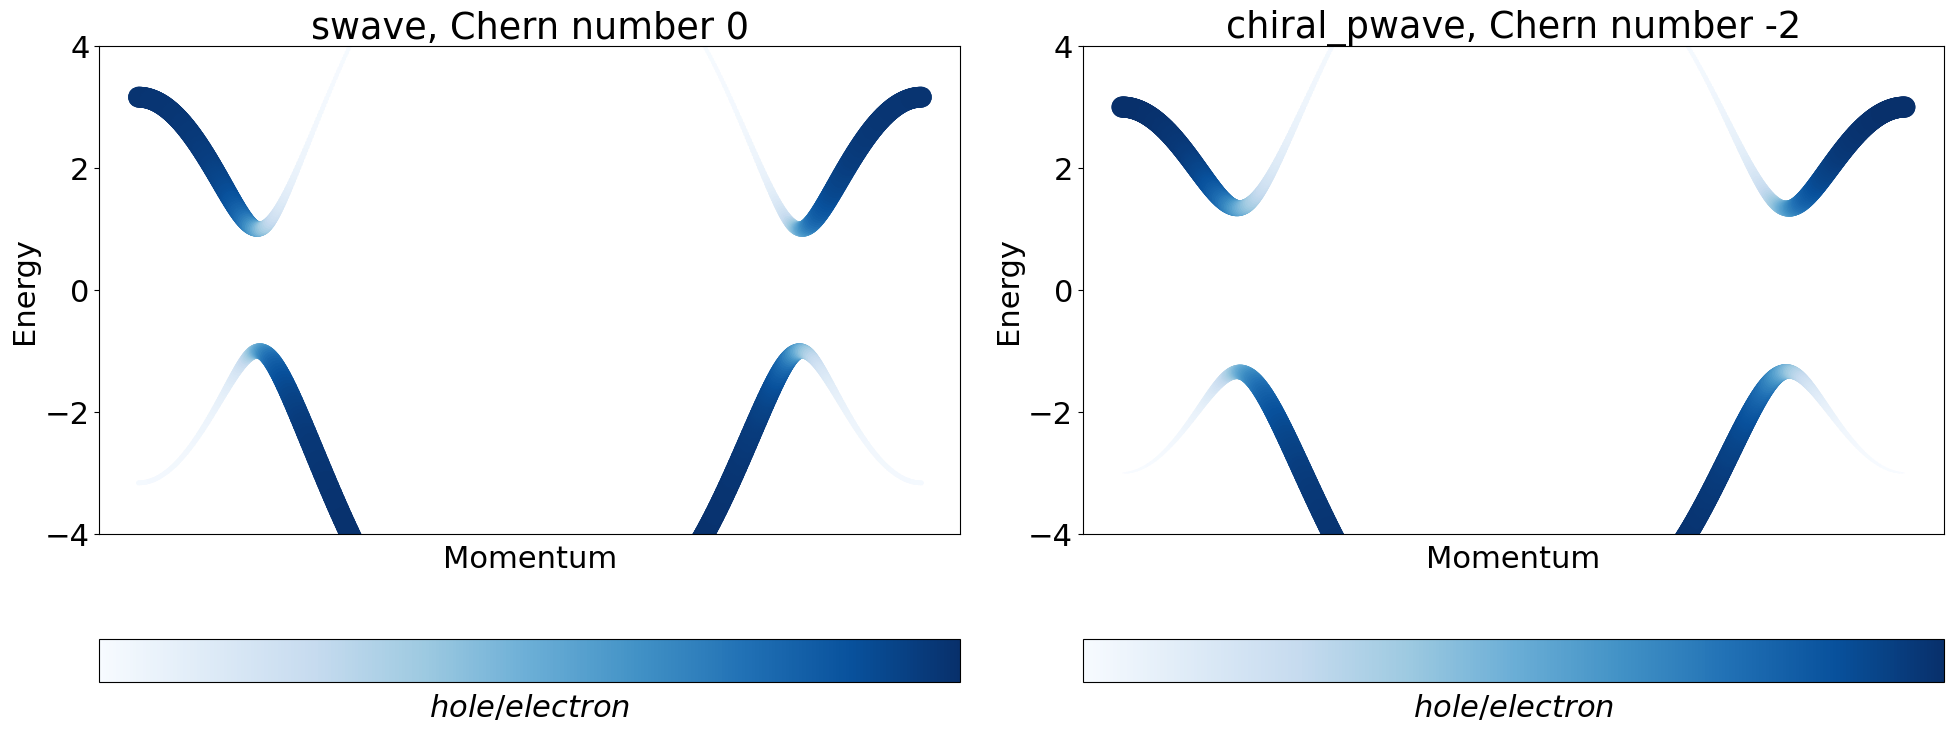

In [9]:
from pyqula import geometry
g = geometry.triangular_lattice() # generate a triangular lattice

def plot_case(name,delta): 
    h = g.get_hamiltonian() ; h.add_onsite(-3.0) # generate Hamiltonian
    h.add_pairing(mode=name,delta=delta) # add pairing
    (k,e,c) = h.get_bands(operator="electron",kpath=["G","K","M","G"]) # compute bands
    plt.scatter(k,e,c=c,s=200*c,cmap="Blues") ; plt.xlabel("Momentum") 
    plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-4,4]) # plot
    plt.colorbar(label="$hole/electron$",ticks=[],orientation="horizontal")
    c = h.get_chern()
    plt.title(name+", Chern number "+str(int(c)))

# first s-wave
plt.subplot(1,2,1) 
plot_case("swave",1.0)

# now chiral pwave
plt.subplot(1,2,2) 
plot_case("chiral_pwave",0.4)
    
plt.tight_layout()

### Exercise
- Add both swave and pwave superconducting order, what happens to the electronic band structure?
- Change the chemical potential. How does the chiral pwave superconducting order change? Explain why

## Trivial and topological superconducting order parameters, edge spectra
Let us now see that a gapped topological state can be trivial or topological, leading the presence or absence of edge states

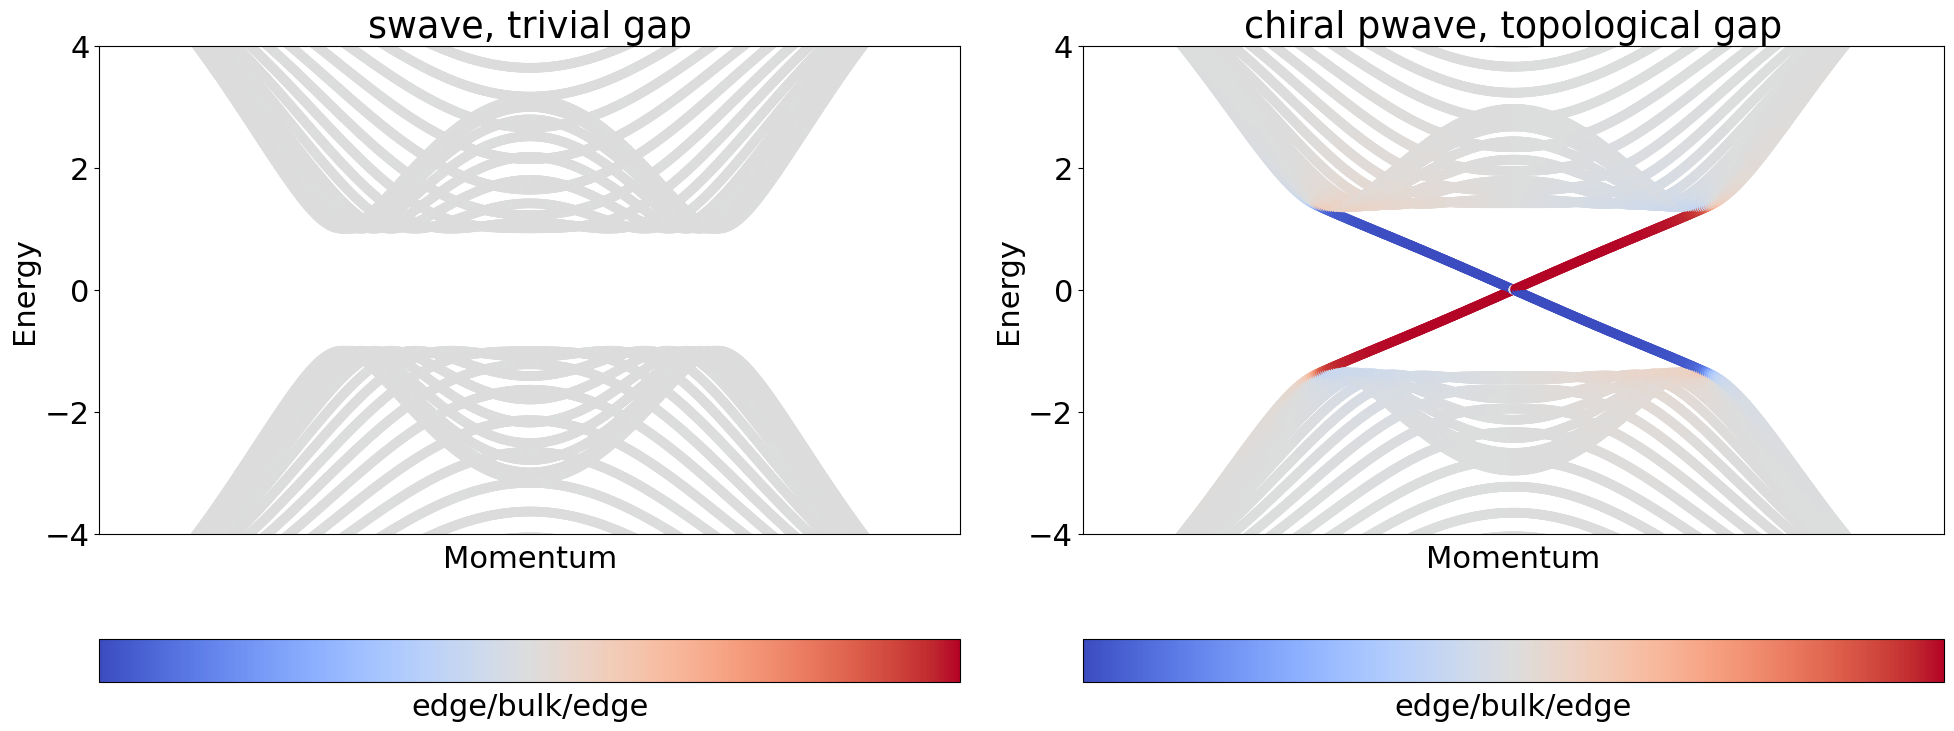

In [10]:
from pyqula import geometry, ribbon
g = geometry.triangular_lattice() # generate a triangular lattice
g = ribbon.bulk2ribbon(g,n=20) # create a ribbon from a bulk Hamiltonian

def plot_case(name,delta): 
    h = g.get_hamiltonian() ; h.add_onsite(-3.0) # generate Hamiltonian
    h.add_pairing(mode=name,delta=delta) # add pairing
    (k,e,c) = h.get_bands(operator="yposition",kpath=["X","G","X"]) # plot the bands highlighting the position
    plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-4,4])
    plt.colorbar(label="edge/bulk/edge",ticks=[],orientation="horizontal")

# first s-wave
plt.subplot(1,2,1) ; plt.title("swave, trivial gap")
plot_case("swave",1.0)

# now chiral pwave
plt.subplot(1,2,2) ; plt.title("chiral pwave, topological gap")
plot_case("chiral_pwave",0.4)
    
plt.tight_layout()

### Exercise
- Include both swave and chiral pwave orders. What happens to the electronic structure?
- CHange the chemical potential. How does the electronic structure change?

## Gapped and nodal superconducting orders
Let us now discuss different superconducting orders in the triangular lattice, in particular focusing on gaped s-wave order and nodal f-wave order

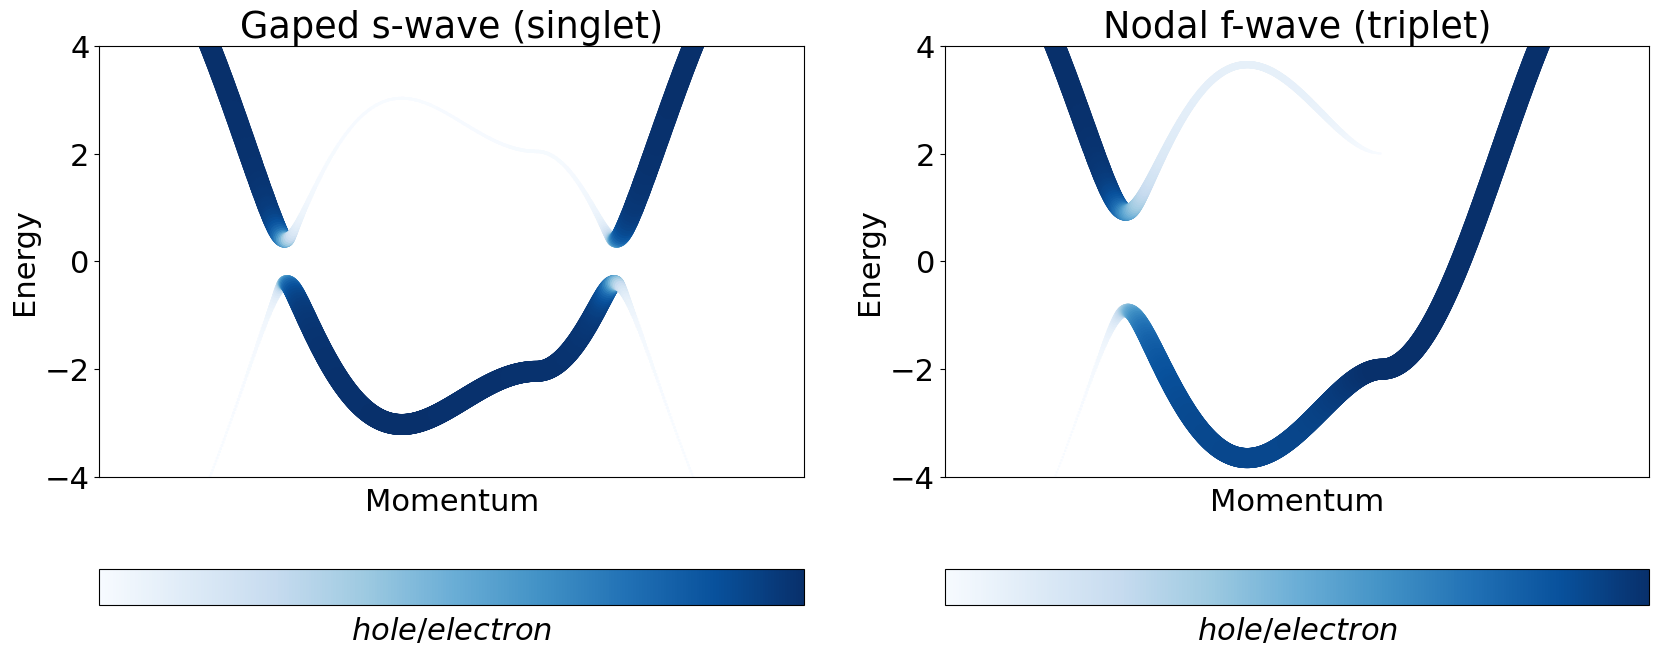

In [11]:
from pyqula import geometry
g = geometry.triangular_lattice() # generate a triangular lattice

# first s-wave
plt.subplot(1,2,1) ;  plt.title("Gaped s-wave (singlet)")
h = g.get_hamiltonian() # generate Hamiltonian
h.add_pairing(mode="swave",delta=0.4) # add swave pairing
(k,e,c) = h.get_bands(operator="electron",kpath=["G","K","M","G"]) # compute bands
plt.scatter(k,e,c=c,s=200*c,cmap="Blues") ; plt.xlabel("Momentum") 
plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-4,4]) # plot
plt.colorbar(label="$hole/electron$",ticks=[],orientation="horizontal")

# now nodal f-wave
plt.subplot(1,2,2) ;  plt.title("Nodal f-wave (triplet)")
h = g.get_hamiltonian() # generate Hamiltonian
h.add_pairing(mode="nodal_fwave",delta=0.2) # add swave pairing
(k,e,c) = h.get_bands(operator="electron",kpath=["G","K","M","G"]) # compute bands
plt.scatter(k,e,c=c,s=200*c,cmap="Blues") ; plt.xlabel("Momentum") 
plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-4,4]) # plot
plt.colorbar(label="$hole/electron$",ticks=[],orientation="horizontal")


### Exercise
- Discuss why an f-wave order is a triplet superconducting order parameter
- Discuss in which points of the Brillouin zone the triplet order (odd order parameter) must have nodes

#### In the lab
- Nodal superconductivity has been observed in twisted graphene trilayers 
https://www.nature.com/articles/s41586-022-04715-z

## s-wave superconductivity in the presence of spin-orbit coupling
In the following we will show how a superconducting state is compatible with spin-orbit coupling. As a reference, we will use the Hamiltonian of NbSe2 that includes long range hopping.

### Ising spin-orbit coupling
Here we first start looking at the impact of Ising spin-orbit coupling, and its interplay with superconductivity. In the presence of s-wave superconductivity, spin-orbit coupling is not detrimental to the superconducting state

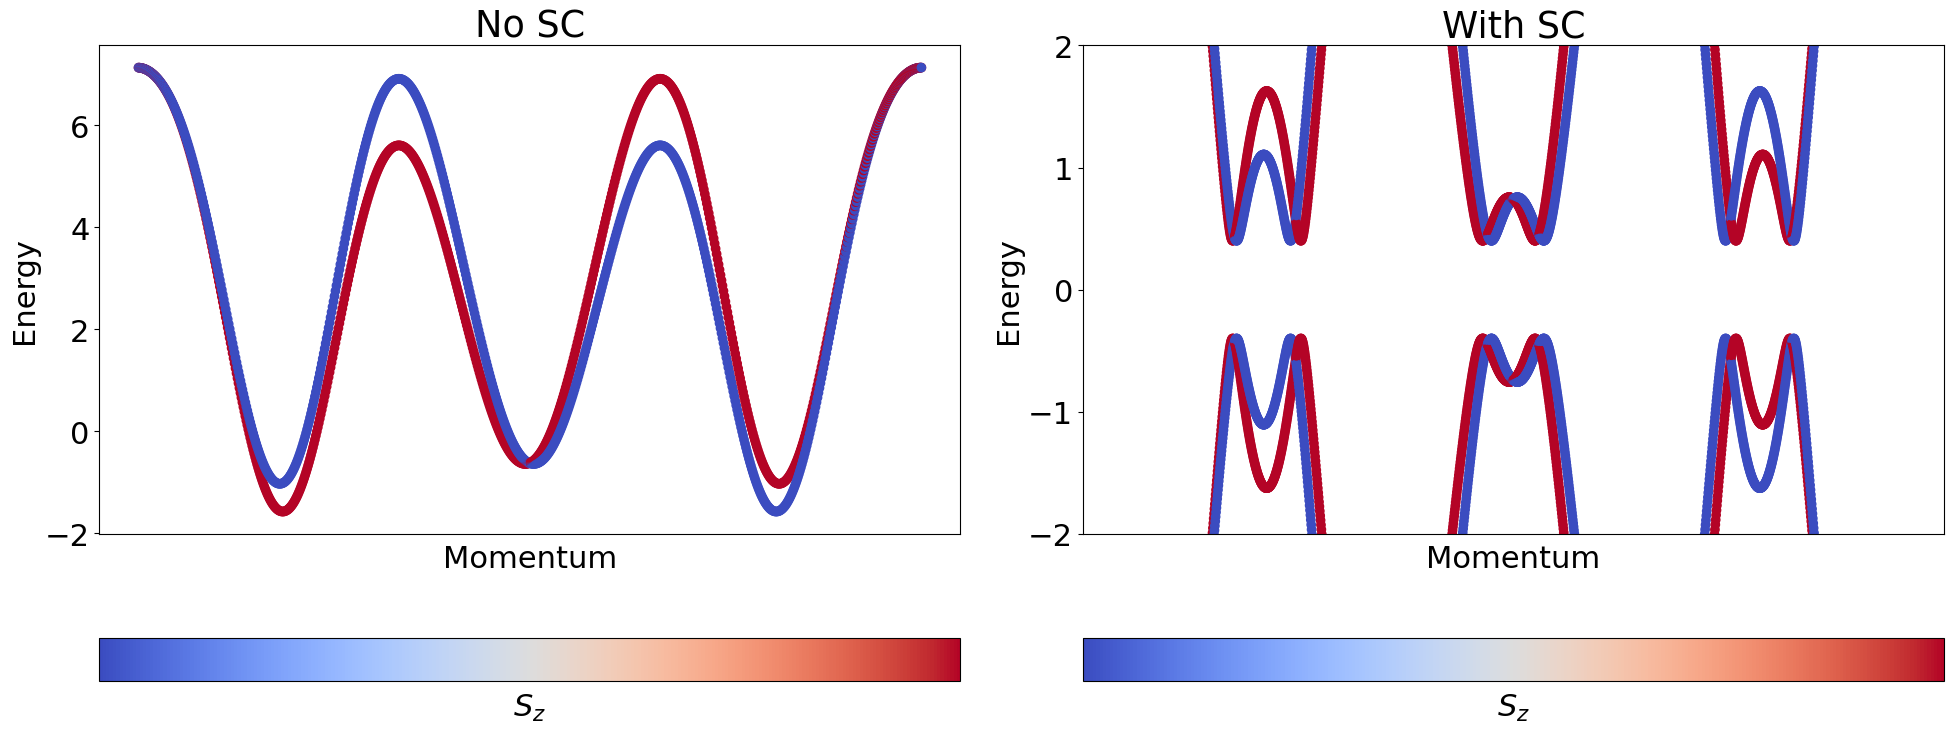

In [12]:
# first compute the bands without superconductivity
from pyqula import specialhamiltonian # special Hamiltonians library
h = specialhamiltonian.NbSe2(soc=0.5) # NbSe2 Hamiltonian, soc controls the Ising SOC

plt.subplot(1,2,1) ; plt.title("No SC")
(k,e,c) = h.get_bands(operator="sz",nk=800) # compute bands
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([])
plt.colorbar(label="$S_z$",ticks=[],orientation="horizontal")

plt.subplot(1,2,2) ; plt.title("With SC")
h.add_swave(0.4)
(k,e,c) = h.get_bands(operator="sz",nk=2000) # compute bands
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-2,2]) # plot
plt.colorbar(label="$S_z$",ticks=[],orientation="horizontal")

plt.tight_layout()

### Exercise
- Increase the value of the spin-orbit coupling. Does the superconducting gap in the band structure change?
- Discuss why you observe the phenomenology above

## Rashba spin-orbit coupling
Here we look at the impact of Rashba spin-orbit coupling, and its interplay with s-wave superconductivity. Due to Kramer's theorem, a finite Rashba spin-orbit coupling is not detrimental for an s-wave superconducting state

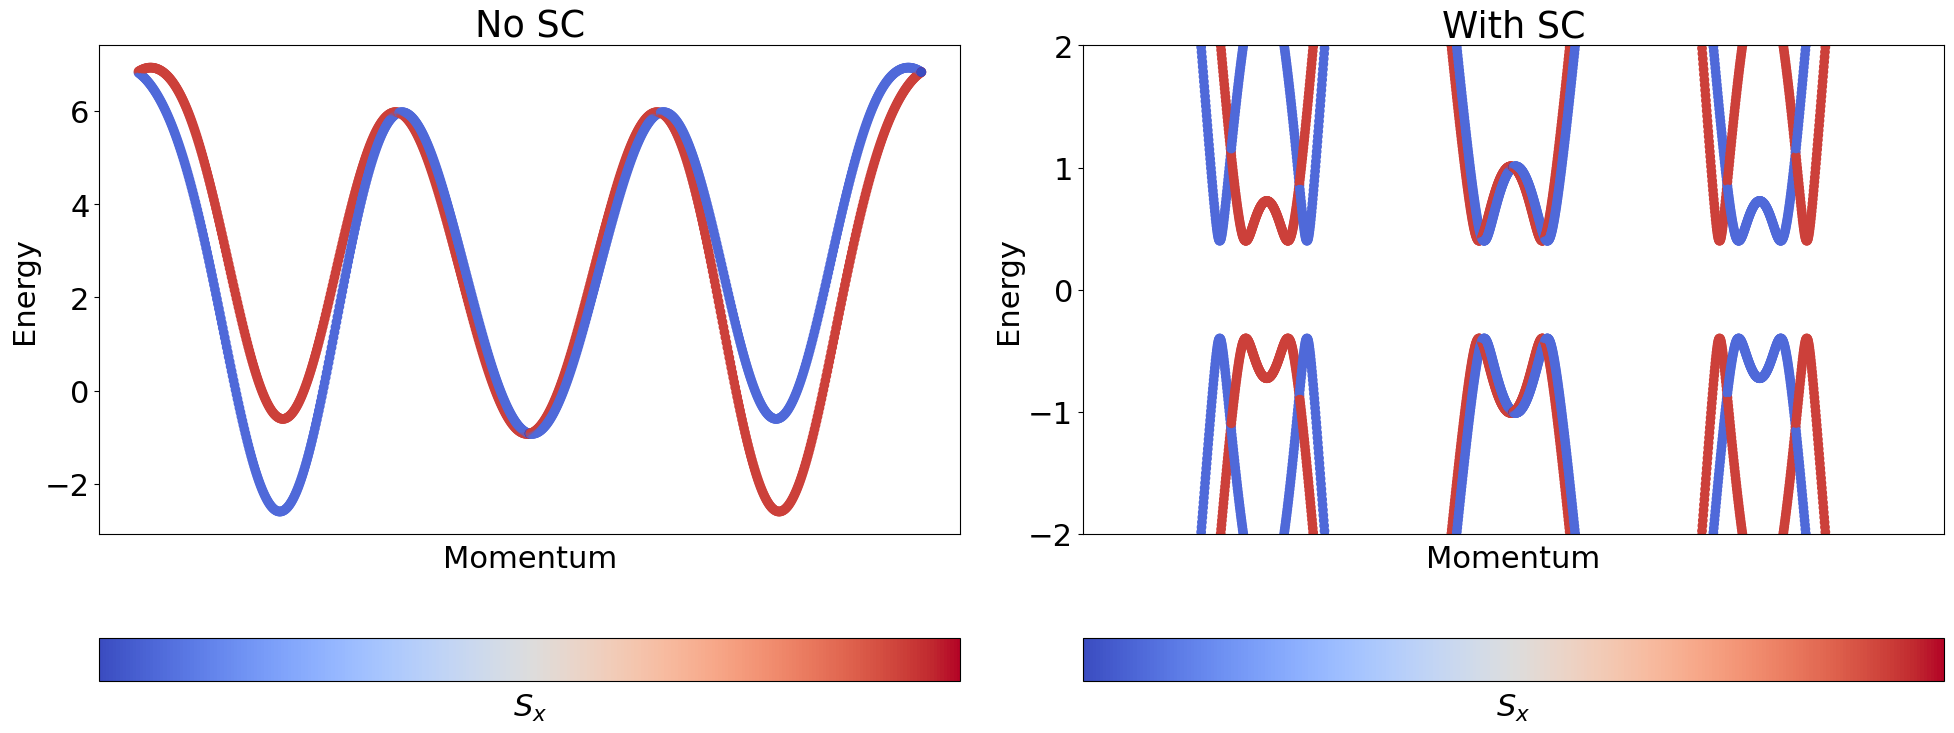

In [13]:
# first compute the bands without superconductivity
from pyqula import specialhamiltonian # special Hamiltonians library
h = specialhamiltonian.NbSe2() # NbSe2 Hamiltonian

plt.subplot(1,2,1) ; plt.title("No SC")
h.add_rashba(0.3) # add Rashba SOC
(k,e,c) = h.get_bands(operator="sx",nk=800) # compute bands
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([])
plt.colorbar(label="$S_x$",ticks=[],orientation="horizontal")

plt.subplot(1,2,2) ; plt.title("With SC")
h.add_swave(0.4)
(k,e,c) = h.get_bands(operator="sx",nk=2000) # compute bands
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-2,2]) # plot
plt.colorbar(label="$S_x$",ticks=[],orientation="horizontal")

plt.tight_layout()

### Exercise
- Compute the electronic structure with s-wave superconductivity in the presence of both Rashba and Ising spin-orbit coupling, and show that the superconducting gap remains unaffected in the presence of SOC.
- Discuss why the phenomenology above happens.

## s-wave superconductivity in the presence of magnetism
Let us now see how the presence of magnetism impacts an s-wave superconducting state

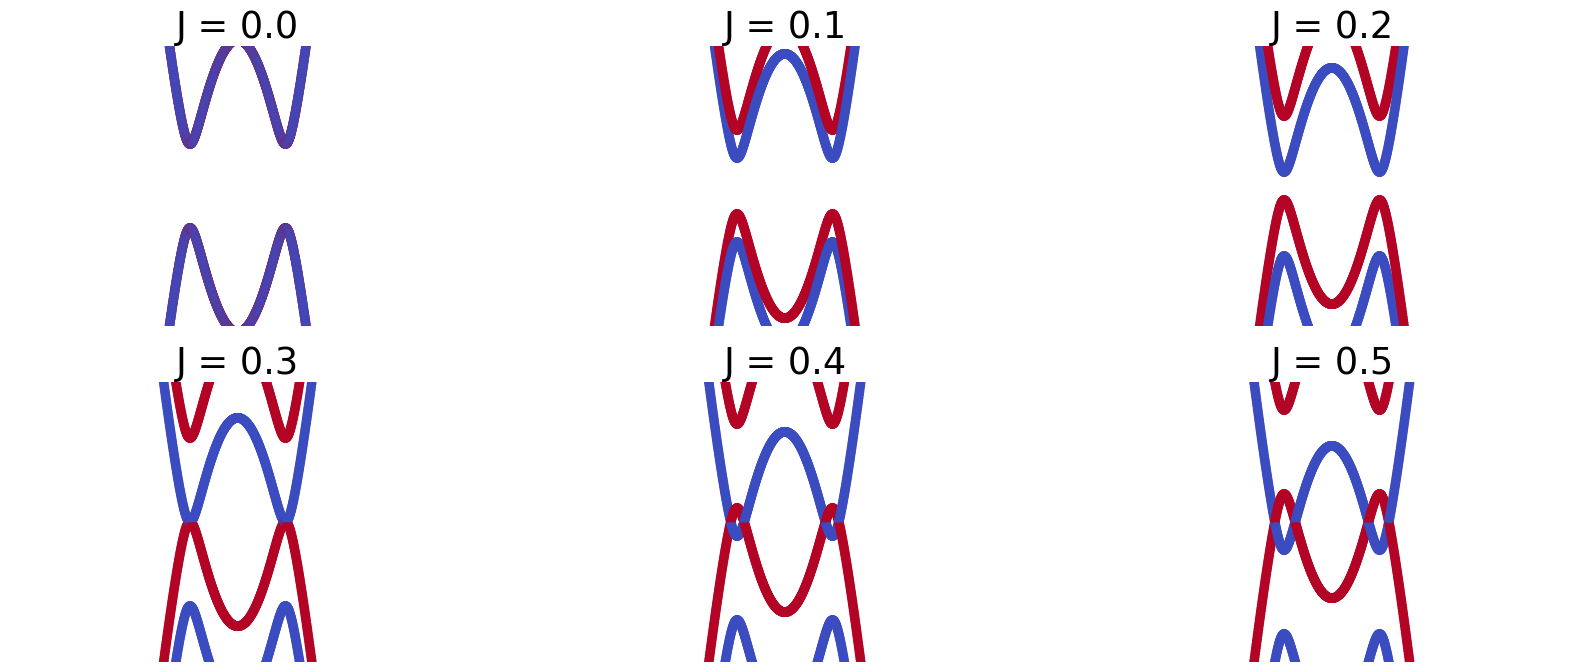

In [14]:
# plot the bands for different exchance couplings
from pyqula import geometry
Js = np.linspace(0.,0.5,6) # exchange couplings
ij = 0 # counter
for J in Js: # loop over exchange couplings
    g = geometry.square_lattice() # get the geometry
    h = g.get_hamiltonian() # get the Hamiltonian
    h.add_onsite(3.) # shift chemical potential
    h.add_zeeman([0.,0.,J]) # add exchange field
    h.add_swave(0.3) # add swave SC
    (k,e,c) = h.get_bands(nk=1000,operator="sz") # compute the bands
    plt.subplot(len(Js)//3,3,ij+1) ; ij +=1 
    plt.scatter(k,e,c=c) ; plt.axis("off") ; plt.ylim([-1.,1.]) ; plt.title("J = "+str(round(J,2))) # plot

### Exercise
- Change the value of the superconducting term. At which value of the exchange do you see the gap closing?
- Discuss why a magnetic exchange field closes the gap 

## Yu-Shiba-Rusinov states in s-wave superconductors
Let now show how a local magnetic impurity gives rise to in-gap modes in a superconductor

(-2.0, 2.0)

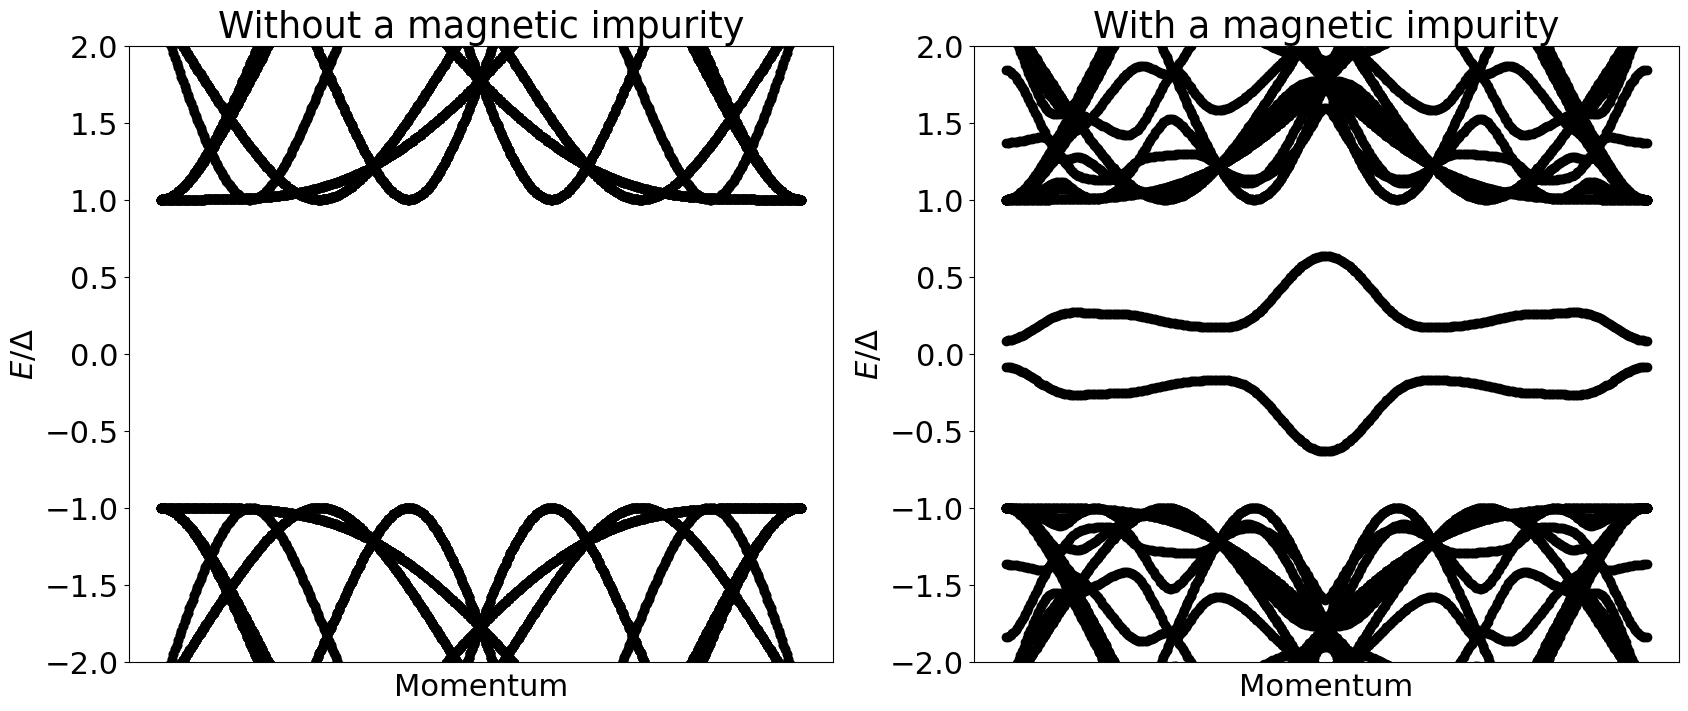

In [15]:
from pyqula import geometry, potentials # to put an impurity
g = geometry.triangular_lattice() # take a triangular lattice
g = g.get_supercell((6,6)) # make a supercell so that we have many sites per unit cell
h = g.get_hamiltonian() # generate Hamiltonian

delta = 0.5 # superconducting order parameter
h.add_swave(delta) # add superconductivity

# first without the impurity
plt.subplot(1,2,1) ; plt.title("Without a magnetic impurity")
(k,e) = h.get_bands() # compute bands
plt.scatter(k,e/delta,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("$E/\Delta$") 
plt.xticks([]) ; plt.ylim([-2.,2.]) # plot

# now with the magnetic impurity
plt.subplot(1,2,2) ; plt.title("With a magnetic impurity")
fimp = potentials.impurity(g.r[0],v=[0.,0.,2.]) # magnetic impurity
h.add_exchange(fimp) # add local magnetic impurity
(k,e) = h.get_bands() # compute bands
plt.scatter(k,e/delta,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("$E/\Delta$") 
plt.xticks([]) ; plt.ylim([-2.,2.]) # plot

### Exercise
- Change the strength of the magnetic impurity. How does the in-gap band change?
- Replace the magnetic impurity by a local non-magnetic potential (add_onsite). Discuss why the result is different from the magnetic impurity

#### In the lab
- Yu-Shiba-Rusinov states can be engineered by depositing individual magnetic atoms in NbSe2
https://pubs.acs.org/doi/full/10.1021/acs.nanolett.9b03988

## Single magnetic impurity in a superconductor
Above we considered a periodic lattice of magnetic impurities, now we will consider a single magnetic site in an infinite system

(0.0, 4.146764000529834)

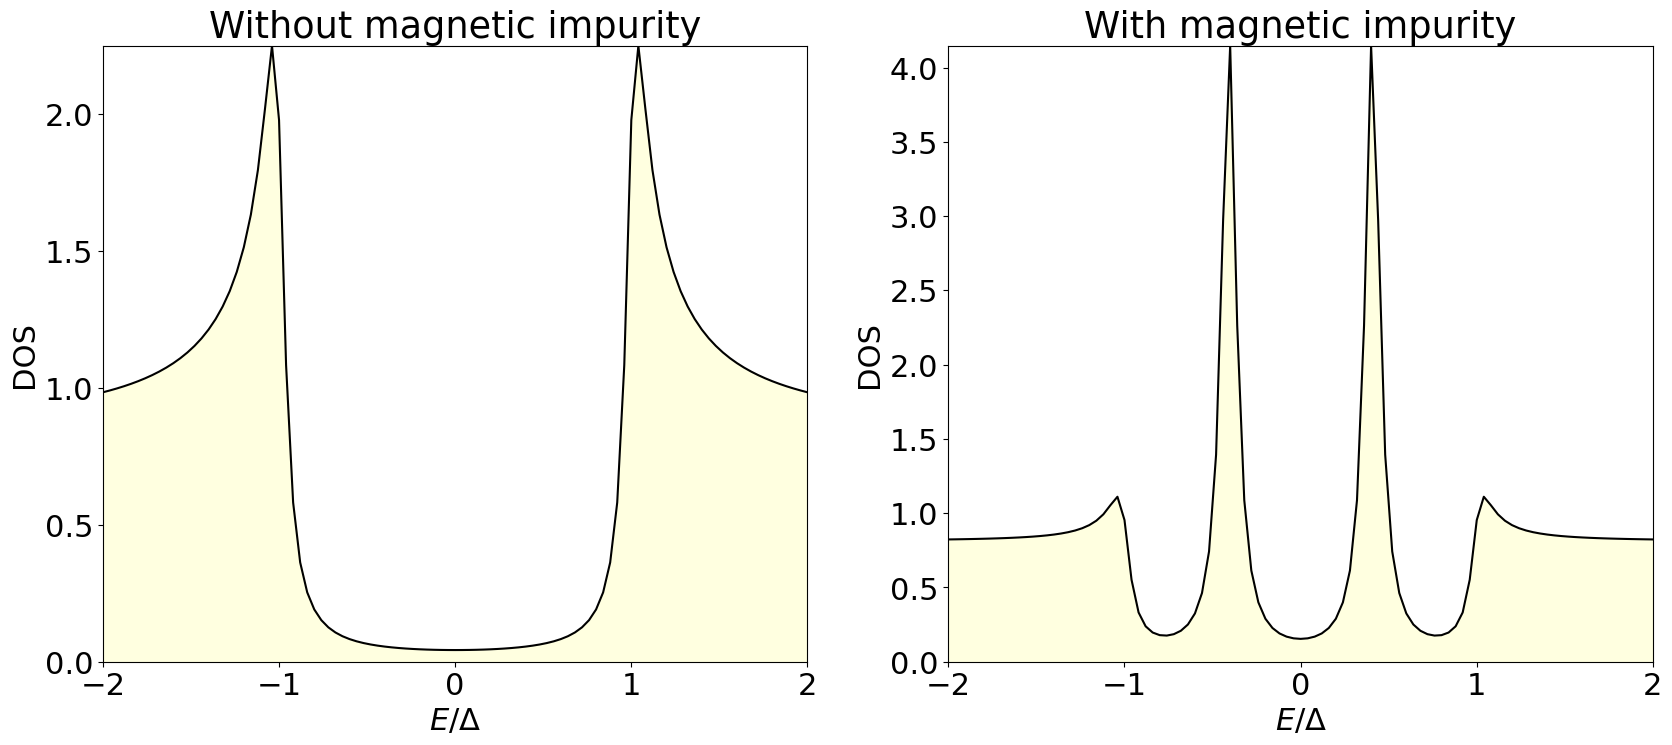

In [16]:
from pyqula import geometry, potentials, embedding
g = geometry.triangular_lattice() # take a triangular lattice
g = g.get_supercell((2,2)) # make a supercell so that we have several sites per unit cell
h = g.get_hamiltonian() # generate Hamiltonian
h.add_onsite(-4.0) # shift the chemical potential
delta = 1e-3 # superconducting order parameter (very small to have nearly constant DOS in the energy window)
h.add_swave(delta) # add superconductivity 
hv = h.copy() # make a copy
hv.add_zeeman(potentials.impurity(g.r[0],v=[0.,0.,3.])) # unit cell with a magnetic impurity

# first the pristine
plt.subplot(1,2,1) ; plt.title("Without magnetic impurity")
eb = embedding.Embedding(h,m=h) 
energies = np.linspace(-2*delta,2*delta,101) # energy grid
(e,d) = eb.multidos(es=energies,delta=delta/20) # compute DOS
e = e/delta # redefine
plt.plot(e,d,c="black") ; plt.xlabel("$E/\Delta$") ; plt.ylabel("DOS") # plot
plt.fill_between(e, d, where=d>=d, interpolate=True, color='lightyellow') # add a background
plt.xlim([min(e),max(e)]) ; plt.ylim([0,max(d)])

# create an embedding object (infinite pristine system with h, central impurity hv)
plt.subplot(1,2,2) ; plt.title("With magnetic impurity")
eb = embedding.Embedding(h,m=hv) 
(e,d) = eb.multidos(es=energies,delta=delta/20) # compute LDOS
e = e/delta # redefine
plt.plot(e,d,c="black") ; plt.xlabel("$E/\Delta$") ; plt.ylabel("DOS") # plot
plt.fill_between(e, d, where=d>=d, interpolate=True, color='lightyellow') # add a background
plt.xlim([min(e),max(e)]) ; plt.ylim([0,max(d)])

### Exercise
- Change the value of the exchange coupling. How does the in-gap state depend on the exchange?
- Make the superconducting order twice as big. Does the relative position of the in-gap state change?

## Electron-hole asymmetry in Yu-Shiba-Rusinov states
Let us now see how an non-magnetic potential gives rise to electron-hole asymmetry in Yu-Shiba-Rusinov states

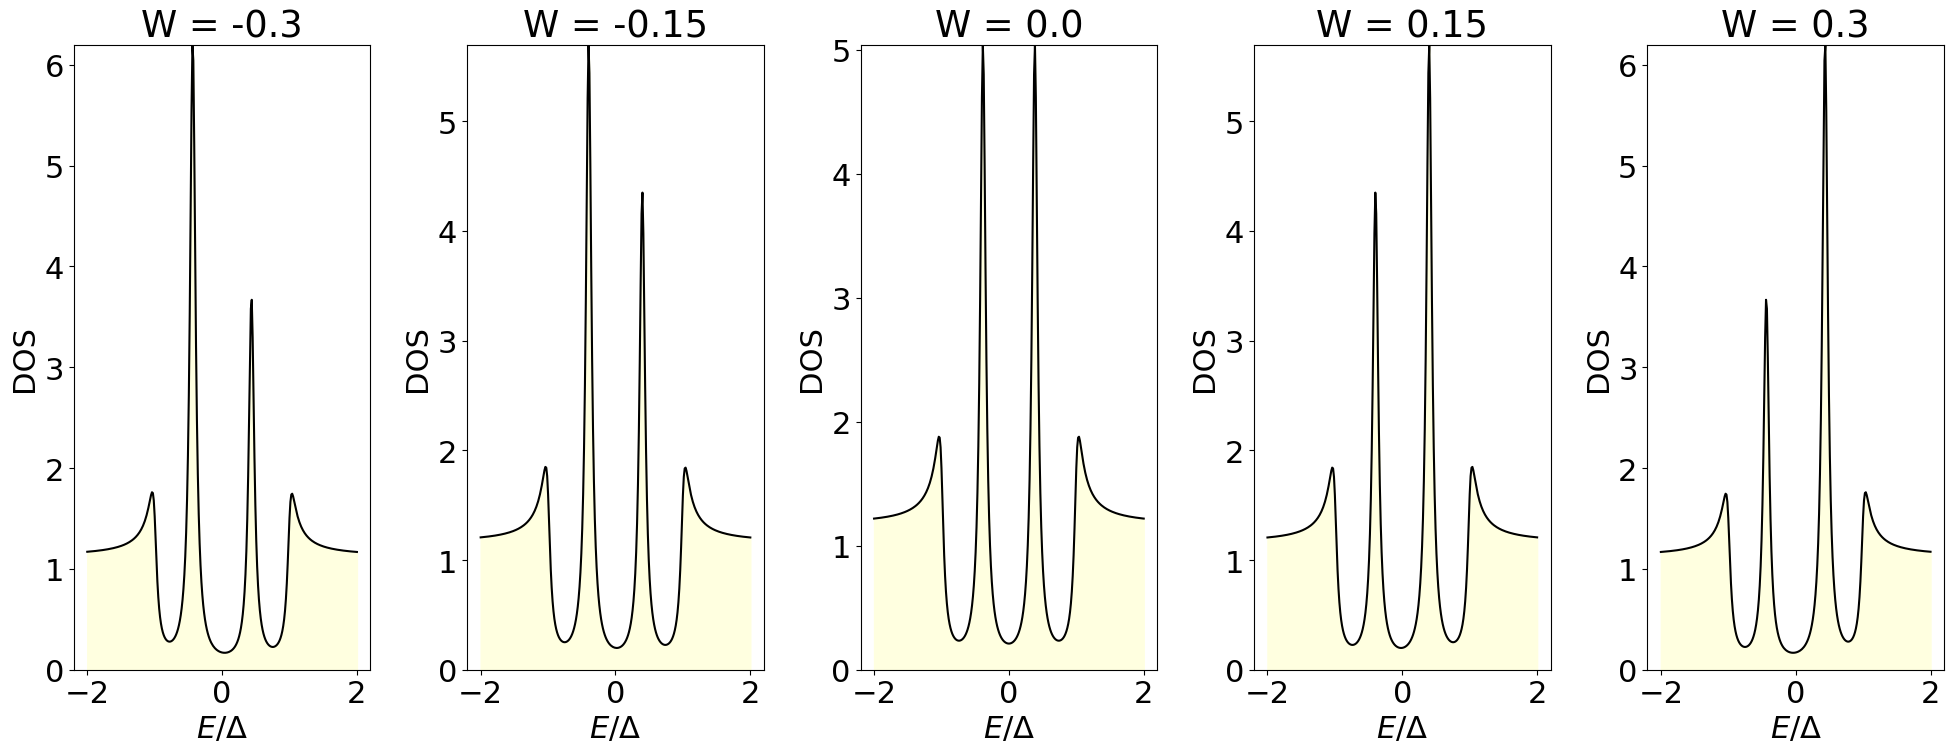

In [17]:
from pyqula import geometry, potentials, embedding
g = geometry.chain() # take a chain to make the calculations faster
g = g.get_supercell(3) # make a supercell so that we have several sites per unit cell
delta = 1e-3 # superconducting order parameter (very small to have nearly constant DOS in the energy window)
h = g.get_hamiltonian() # generate Hamiltonian
h.add_swave(delta) # add superconductivity 
energies = np.linspace(-2*delta,2*delta,301) # energy grid
Ws = np.linspace(-0.3,0.3,5) # potentials
iw = 1 # counter
for W in Ws: # loop over local potentials
    hv = h.copy() # make a copy
    hv.add_zeeman(potentials.impurity(g.r[1],v=[0.,0.,3.])) # magnetic impurity
    hv.add_onsite(potentials.impurity(g.r[0],v=W)) # non-magnetic potential nearby
    hv.add_onsite(potentials.impurity(g.r[2],v=W)) # non-magnetic potential nearby
    # create an embedding object (infinite pristine system with h, central impurity hv)
    plt.subplot(1,len(Ws),iw) 
    iw +=1 ; plt.title("W = "+str(np.round(W,3)))
    eb = embedding.Embedding(h,m=hv) 
    (e,d) = eb.multidos(es=energies,delta=delta/20,operator="electron") # compute DOS
    e = e/delta # redefine
    plt.plot(e,d,c="black") ; plt.xlabel("$E/\Delta$") ; plt.ylabel("DOS") # plot
    plt.ylim([0.,np.max(d)])
    plt.fill_between(e, d, where=d>=d, interpolate=True, color='lightyellow') # add a background
plt.tight_layout() # adjust

### Exercise
- Switch the sign of the exchange coupling. Does it affect the asymmetry of the peaks? Discuss why
- Add an exchange coupling with the same moduli, but in a different direction. Does it affect the previous plots? Discuss why
- Switch off the magnetic exchange. DO you observe an in-gap state? Discuss why

## Magnetic disorder in an s-wave superconductor
Let us now add random magnetic disorder to a superconductor, and see how that impact the superconducting gap

(-2.0, 2.0)

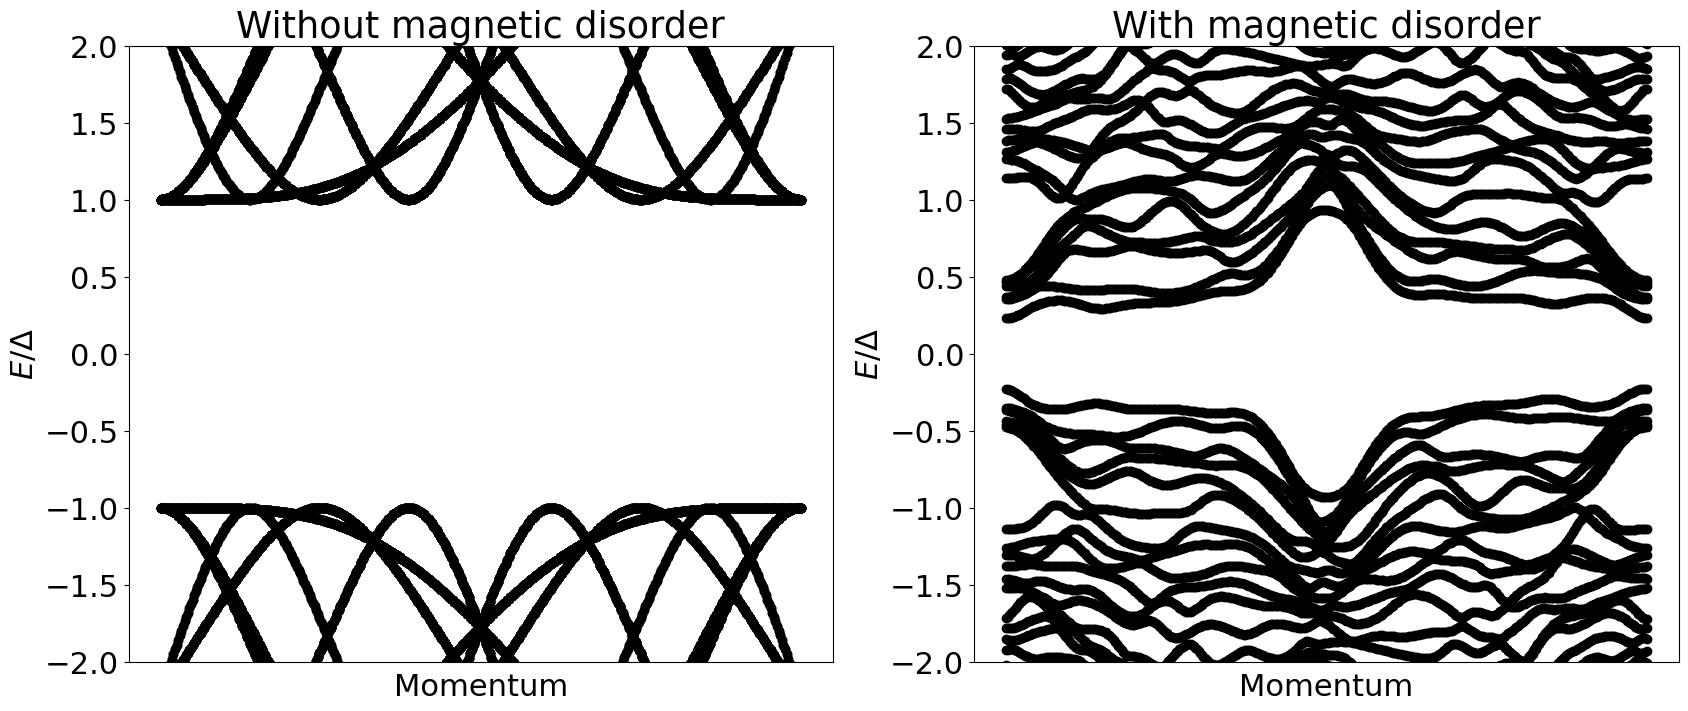

In [18]:
from pyqula import geometry, potentials
g = geometry.triangular_lattice() # take a triangular lattice
g = g.get_supercell((6,6)) # make a supercell so that we have many sites per unit cell
h = g.get_hamiltonian() # generate Hamiltonian

delta = 0.5 # superconducting order parameter
h.add_swave(delta) # add superconductivity

# first without magnetic disorder
plt.subplot(1,2,1) ; plt.title("Without magnetic disorder")
(k,e) = h.get_bands() # compute bands
plt.scatter(k,e/delta,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("$E/\Delta$") 
plt.xticks([]) ; plt.ylim([-2.,2.]) # plot

# now with the magnetic disorder
plt.subplot(1,2,2) ; plt.title("With magnetic disorder")
fimp = potentials.impurity(g.r[0],v=[0.,0.,2.]) # magnetic impurity
h.add_exchange(lambda r: 2*delta*(np.random.random(3)-0.5)) # add local magnetic disorder
#h.add_onsite(lambda r: 2*delta*(np.random.random()-0.5)) # add local disorder
(k,e) = h.get_bands() # compute bands
plt.scatter(k,e/delta,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("$E/\Delta$") 
plt.xticks([]) ; plt.ylim([-2.,2.]) # plot

### Exercise
- Change the strength of the magnetic disorder. How does the in-gap band change?
- Replace the magnetic disorder by non-magnetic disorder (add_onsite). Discuss why the result is different from the magnetic disorder

## Non-magnetic disorder in an unconventional superconductor
Let us now add random non-magnetic disorder to an unconventional superconductor, and see how that impact the superconducting gap

0.13474566018534992


(-2.0, 2.0)

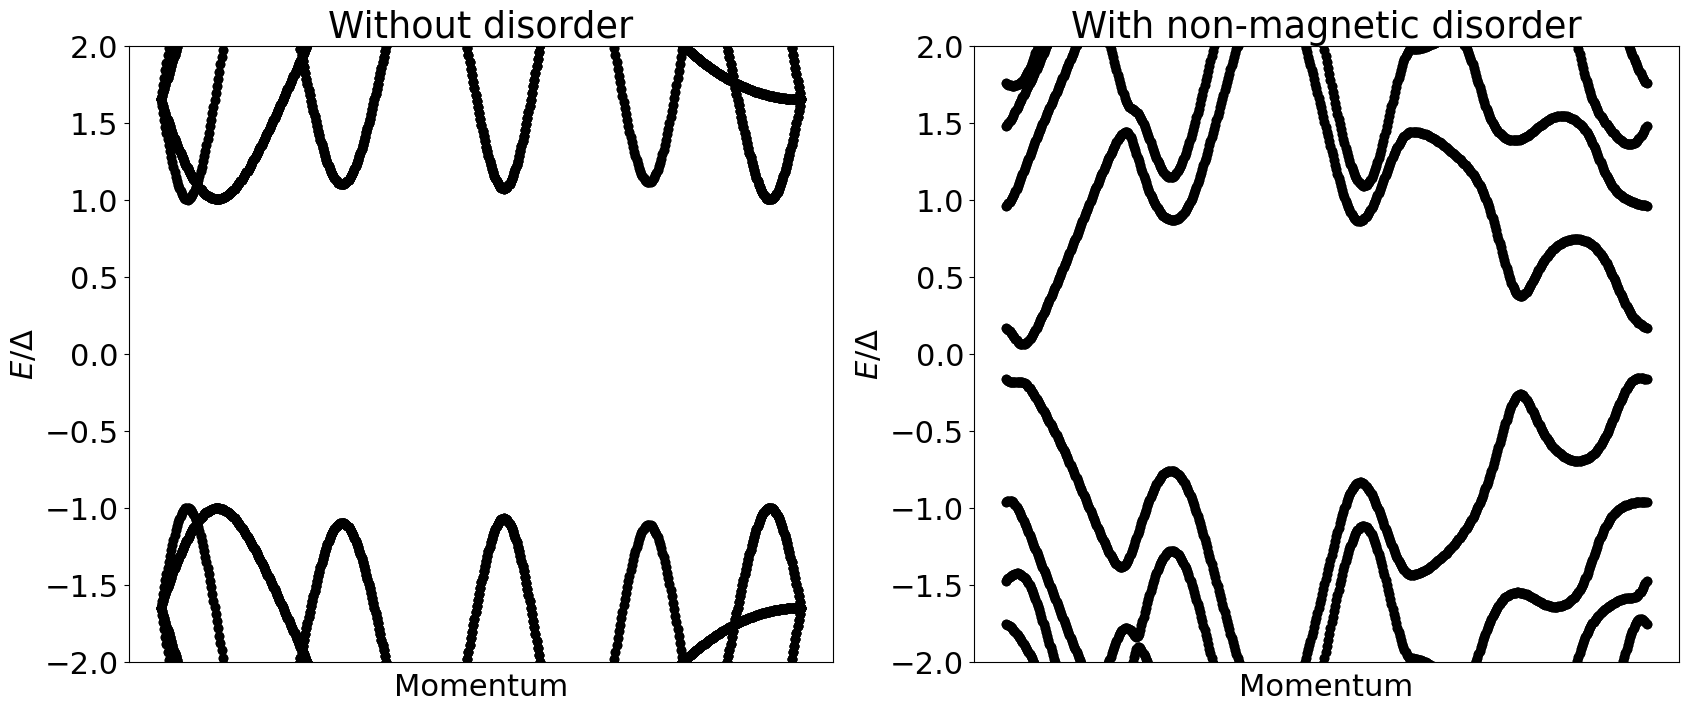

In [19]:
from pyqula import potentials, geometry
g = geometry.triangular_lattice() # take a triangular lattice
h = g.get_hamiltonian() # generate Hamiltonian
h.add_onsite(-3.0) # shift chemical potential 
delta = .1 # superconducting order parameter
h.add_pairing(delta=delta,mode="chiral_dwave") # add an unconventional order parameter
h = h.get_supercell(8) # make a supercell

# first without disorder
plt.subplot(1,2,1) ; plt.title("Without disorder")
gap = h.get_gap()/2. ; print(gap)
kpath=["G","K","M","G"]
(k,e) = h.get_bands(kpath=kpath) # compute bands
plt.scatter(k,e/gap,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("$E/\Delta$") 
plt.xticks([]) ; plt.ylim([-2.,2.]) # plot

# now with the non-magnetic disorder
plt.subplot(1,2,2) ; plt.title("With non-magnetic disorder")
fimp = potentials.impurity(g.r[0],v=[0.,0.,2.]) # magnetic impurity
#h.add_exchange(lambda r: 2*delta*(np.random.random(3)-0.5)) # add local magnetic disorder
h.add_onsite(lambda r: 20*delta*(np.random.random()-0.5)) # add local disorder
(k,e) = h.get_bands(kpath=kpath) # compute bands
plt.scatter(k,e/gap,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("$E/\Delta$") 
plt.xticks([]) ; plt.ylim([-2.,2.]) # plot

### Exercise
- Change the strength of the non-magnetic disorder. How does the in-gap states change?
- Discuss why a non-magnetic disorder decreases the gap of a fully gapped unconventional order parameter

# Artificial topological superconductivity
Here, as warm up exercise, we will create an artificial topological superconductor by combining s-wave superconductivity, exchange field and Rashba spin-orbit coupling. For the sake of concreteness we will use a triangular lattice with first neighbor hopping.

([], [])

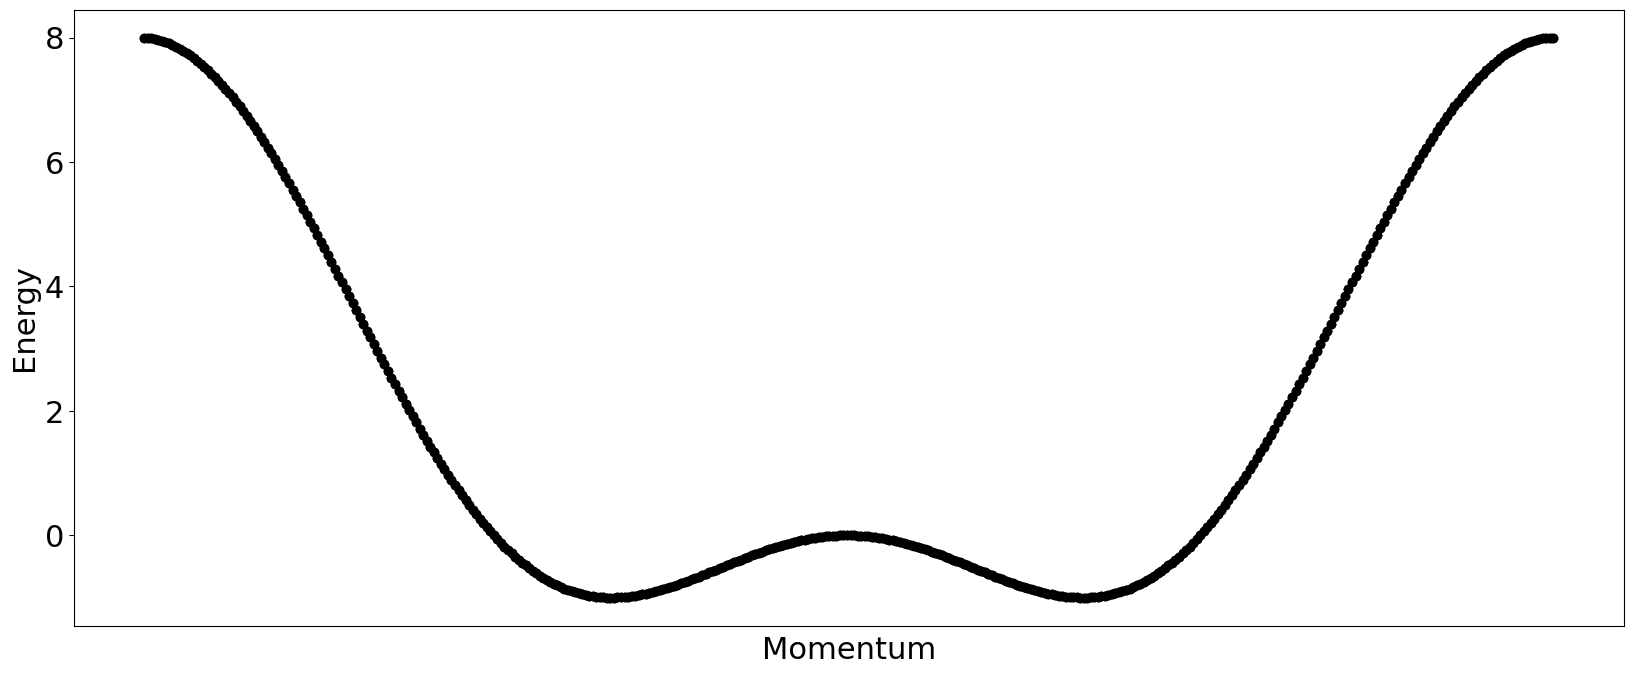

In [20]:
# Let us first look at the band structure without additional terms
from pyqula import geometry
g = geometry.triangular_lattice() # get the geometry
h = g.get_hamiltonian() # get the Hamiltonian
h.add_onsite(2.0) # shift chemical potential
(k,e) = h.get_bands() # compute the bands
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

([], [])

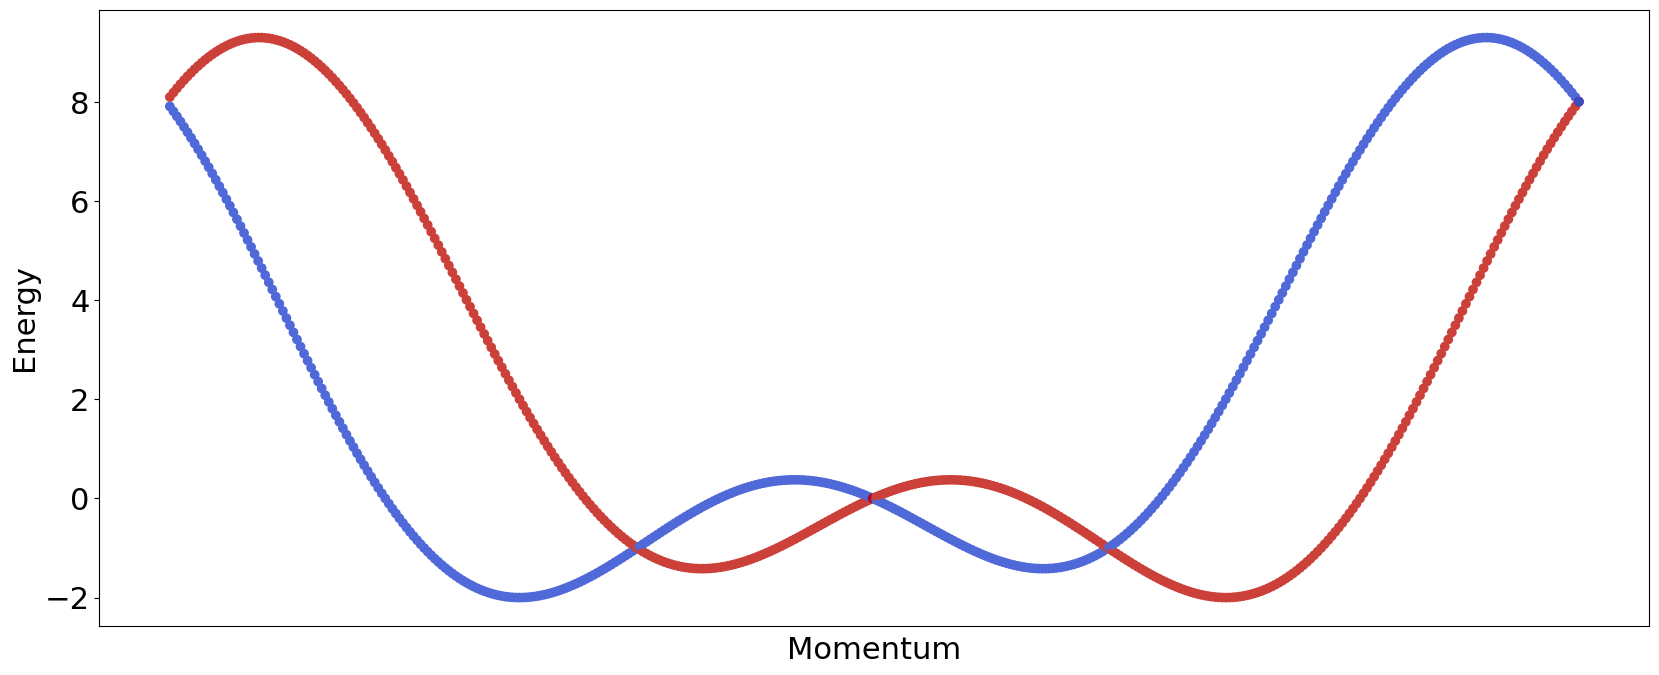

In [21]:
# Now we add Rashba spin-orbit coupling, to create a spin-momentum locking in the electronic structure
from pyqula import geometry
g = geometry.triangular_lattice() # get the geometry
h = g.get_hamiltonian() # get the Hamiltonian
h.add_rashba(1.0) # Rashba spin-orbit coupling
h.add_onsite(2.0) # shift chemical potential
(k,e,c) = h.get_bands(operator="sx") # compute the bands
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

### Exercise
- Decrease value of the Rashba SOC. Does the splitting in momentum space become bigger or smaller?

(-2.0, 2.0)

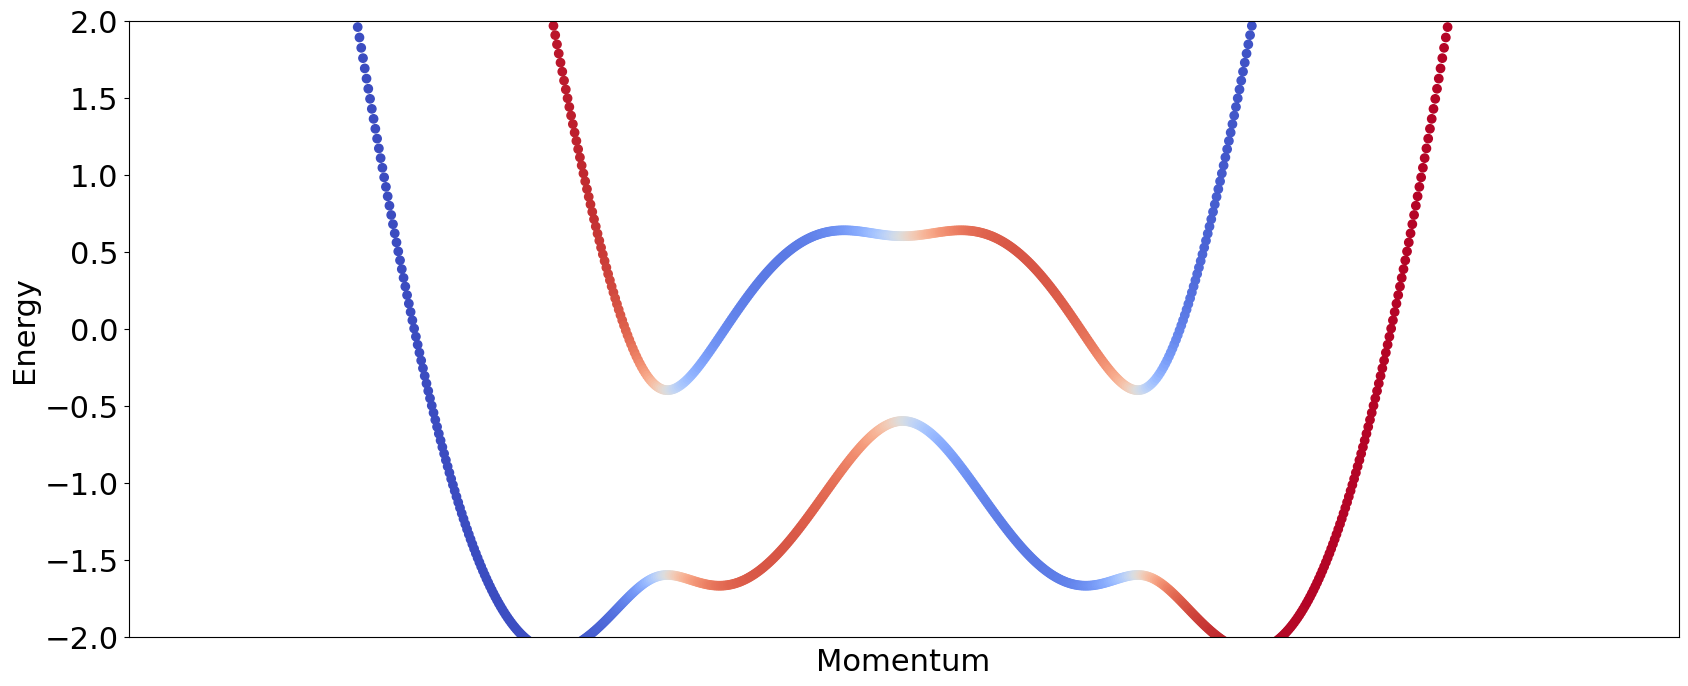

In [22]:
# Now we also add a Zeeman field, to open up a gap in the points where different spins cross
from pyqula import geometry
g = geometry.triangular_lattice() # get the geometry
h = g.get_hamiltonian() # get the Hamiltonian
h.add_rashba(1.0) # Rashba spin-orbit coupling
h.add_onsite(2.0) # shift chemical potential
h.add_zeeman([0.,0.,0.6]) # Zeeman field
(k,e,c) = h.get_bands(operator="sx",nk=800) # compute the bands
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-2.,2.]) # plot

### Exercise
- Discuss why an out-of plane field opens a gap in some of the previous crossings of the band structure
- Decrease value of the exchange field. Do the anticrossings become bigger or smaller?

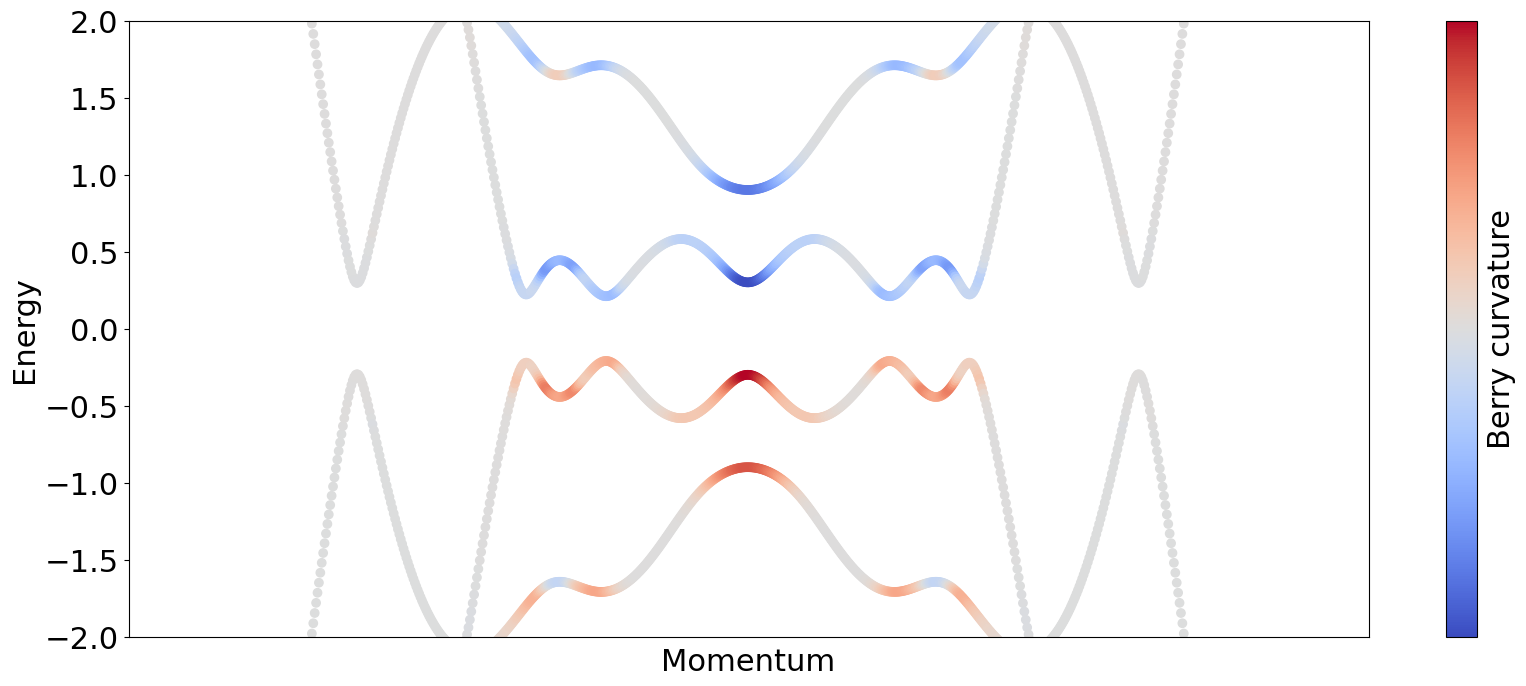

In [23]:
# finally we also add a superconducting order
from pyqula import geometry
g = geometry.triangular_lattice() # get the geometry
h = g.get_hamiltonian() # get the Hamiltonian
h.add_rashba(1.0) # Rashba spin-orbit coupling
h.add_onsite(2.0) # shift chemical potential
h.add_zeeman([0.,0.,0.6]) # Zeeman field
h.add_swave(.3) # add superconductivity
(k,e,c) = h.get_bands(operator="berry",nk=800) # compute the bands
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-2.,2.]) # plot
plt.colorbar(label="Berry curvature",ticks=[])

(-0.5, 59.5, 59.5, -0.5)

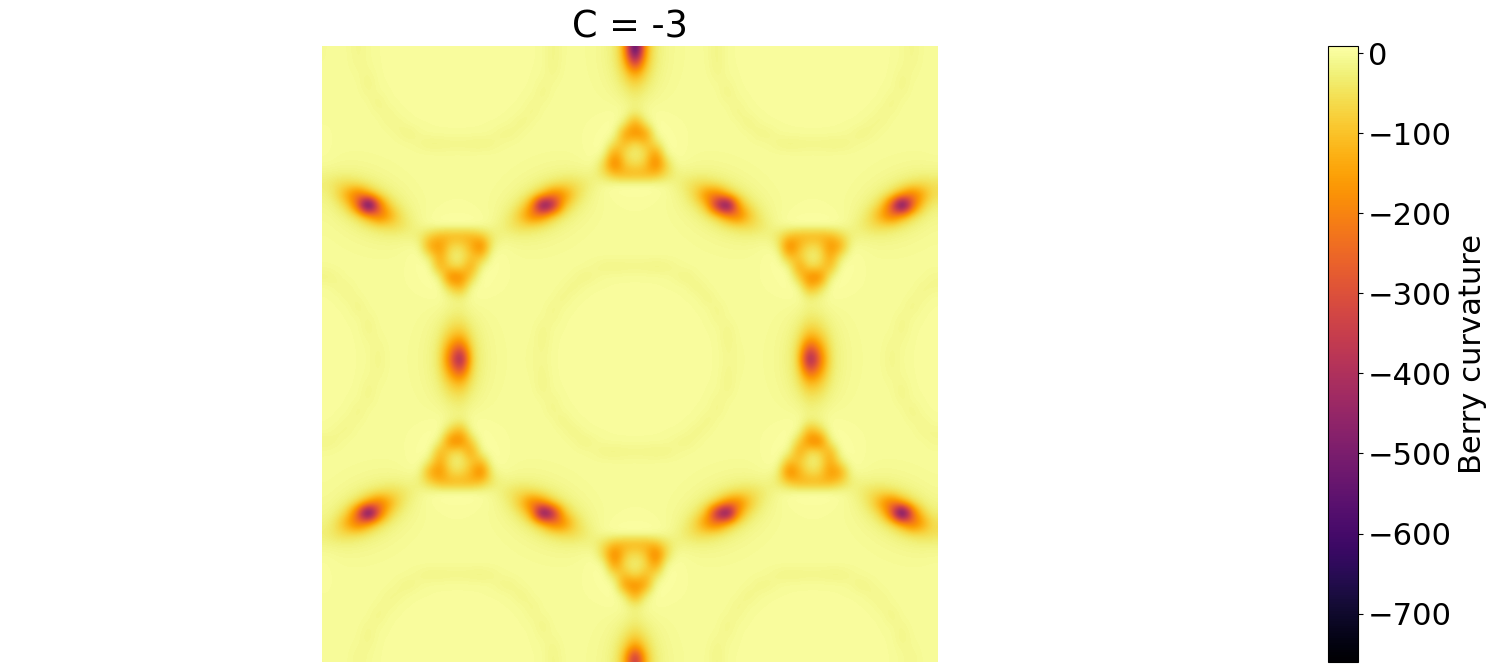

In [24]:
# Now let us compute the Chern number
from pyqula import geometry
g = geometry.triangular_lattice() # get the geometry
h = g.get_hamiltonian() # get the Hamiltonian
h.add_rashba(1.0) # Rashba spin-orbit coupling
h.add_onsite(2.0) # shift chemical potential
h.add_zeeman([0.,0.,0.6]) # Zeeman field
h.add_swave(.3) # add superconductivity
nk = 60 # number of kpoints
c = h.get_chern(nk=nk) # compute Chern number
# now let us compute the Berry curvature in 2D
(kx,ky,omega) = h.get_berry_curvature(nk=nk) # compute Berry curvature
plt.title("C = "+str(int(round(c))))
omega2d = np.array(omega).reshape((nk,nk)) # reshape as a 2d array
plt.imshow(omega2d,interpolation="bicubic",cmap="inferno") # plot
plt.axis("equal") ; plt.colorbar(label="Berry curvature") ; plt.axis("off") 

### Exercise
- Discuss what can be the consequence of having a Chern number
- If you change the chemical potential, do you still get a finite Chern number? Discuss why

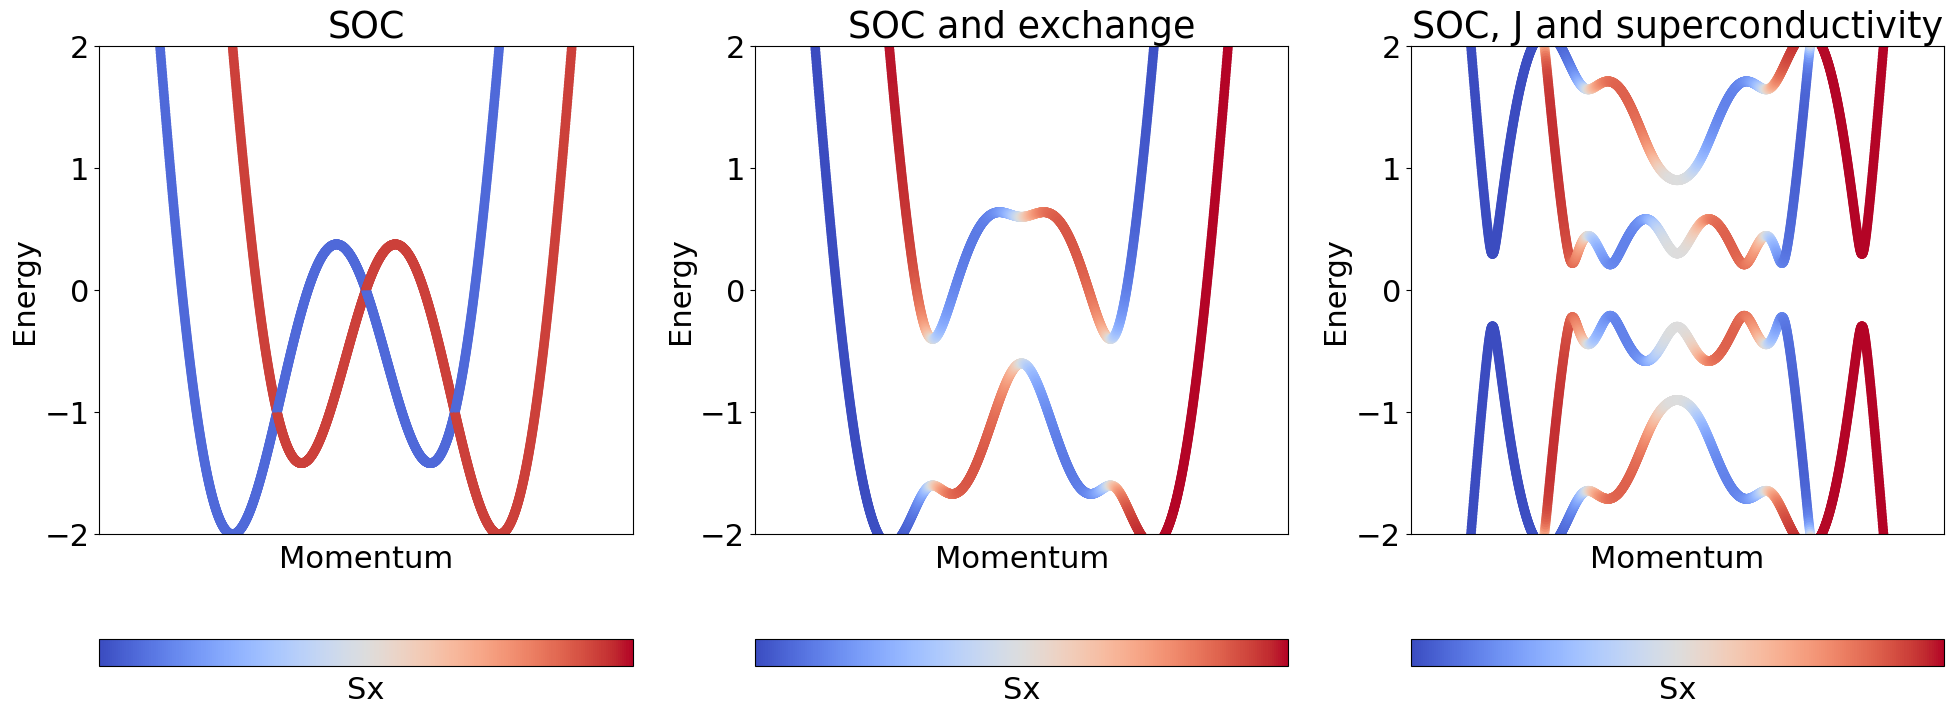

In [25]:
# let us now look at the three bands at the same time
from pyqula import geometry

def plot_case(h):
    (k,e,c) = h.get_bands(operator="sx",nk=2000) # compute the bands
    plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") 
    plt.xticks([]) ; plt.ylim([-2.,2.]) ; plt.xlim([min(k),max(k)])
    plt.colorbar(label="Sx",ticks=[],orientation="horizontal")


g = geometry.triangular_lattice() # get the geometry
h = g.get_hamiltonian() # get the Hamiltonian
h.add_onsite(2.0) # shift chemical potential

plt.subplot(1,3,1) ; plt.title("SOC")
h.add_rashba(1.0) # Rashba spin-orbit coupling
plot_case(h) # plot this case

plt.subplot(1,3,2) ; plt.title("SOC and exchange")
h.add_zeeman([0.,0.,0.6]) # Zeeman field
plot_case(h) # plot this case

plt.subplot(1,3,3) ; plt.title("SOC, J and superconductivity")
h.add_swave(.3) # add superconductivity
plot_case(h) # plot this case



plt.tight_layout()

## Edge states of an artificial topological superconductor
Here, taking as starting point the Hamiltonian of a topological superconductor above, we will show how topological edge states appear in finite systems

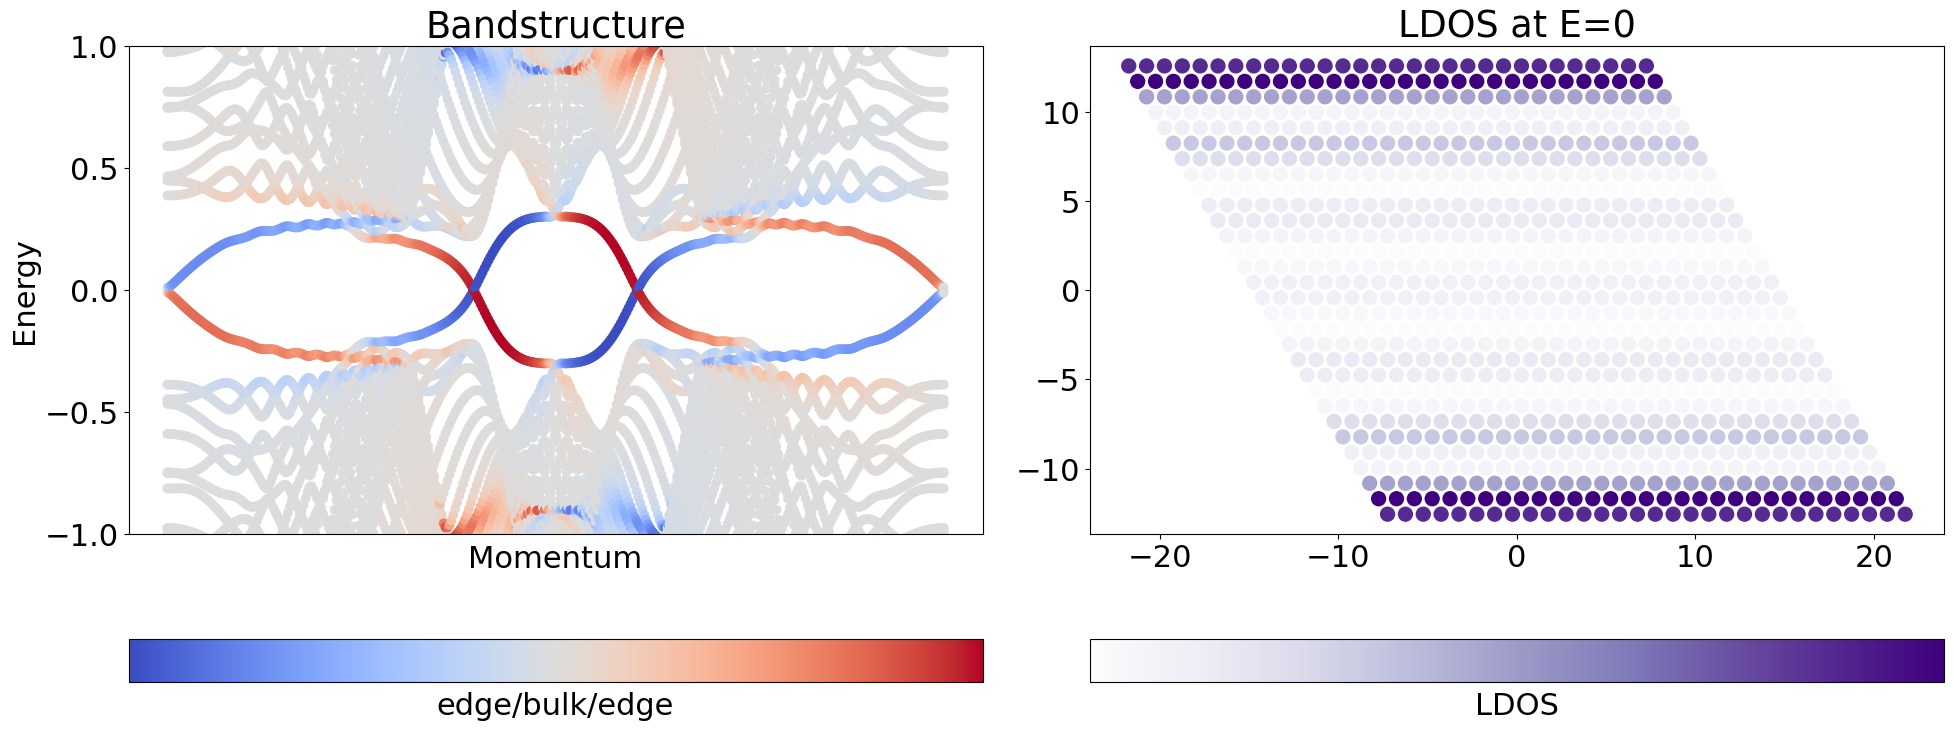

In [26]:
from pyqula import ribbon,geometry
g = geometry.triangular_lattice() # get the geometry
h = g.get_hamiltonian() # get the Hamiltonian
h.add_rashba(1.0) # Rashba spin-orbit coupling
h.add_onsite(2.0) # shift chemical potential
h.add_zeeman([0.,0.,0.6]) # Zeeman field
h.add_swave(.3) # add superconductivity

plt.subplot(1,2,1) ; plt.title("Bandstructure") # first the bands
hr = ribbon.bulk2ribbon(h,n=30) # create a ribbon from a bulk Hamiltonian
(k,e,c) = hr.get_bands(operator="yposition") # plot the bands highlighting the position
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-1.,1.])
plt.colorbar(label="edge/bulk/edge",ticks=[],orientation="horizontal")

plt.subplot(1,2,2) ; plt.title("LDOS at E=0") # now the LDOS
(x,y,d) = hr.get_ldos(energy=0.0,nrep=30,delta=1e-2,nk=50) # compute the local density of states
plt.scatter(x,y,c=d,s=100,cmap="Purples") ; plt.axis("equal") 
plt.colorbar(label="LDOS",ticks=[],orientation="horizontal")

plt.tight_layout() # adjust subplots

### Exercise
- The localization of the edge modes depends on the topological gap. Show that for parameters yielding a small topological gap, the edge states are more delocalized
- Show that if the ribbon is not wide enough, the edge states hybridize and lead to a gap opening

#### In the lab
- Topological superconductivity has been observed in artificial NbSe2/CrBr3 heterostructures
https://www.nature.com/articles/s41586-020-2989-y

## Topological phase transition with the exchange field
Above we saw that superconductivity can coexist with spin-orbit coupling. Since the superconductor at zero exchange field is trivial, a topological phase transition must occur as the exchange field is turned on. Here we will show how such a phase transition takes place

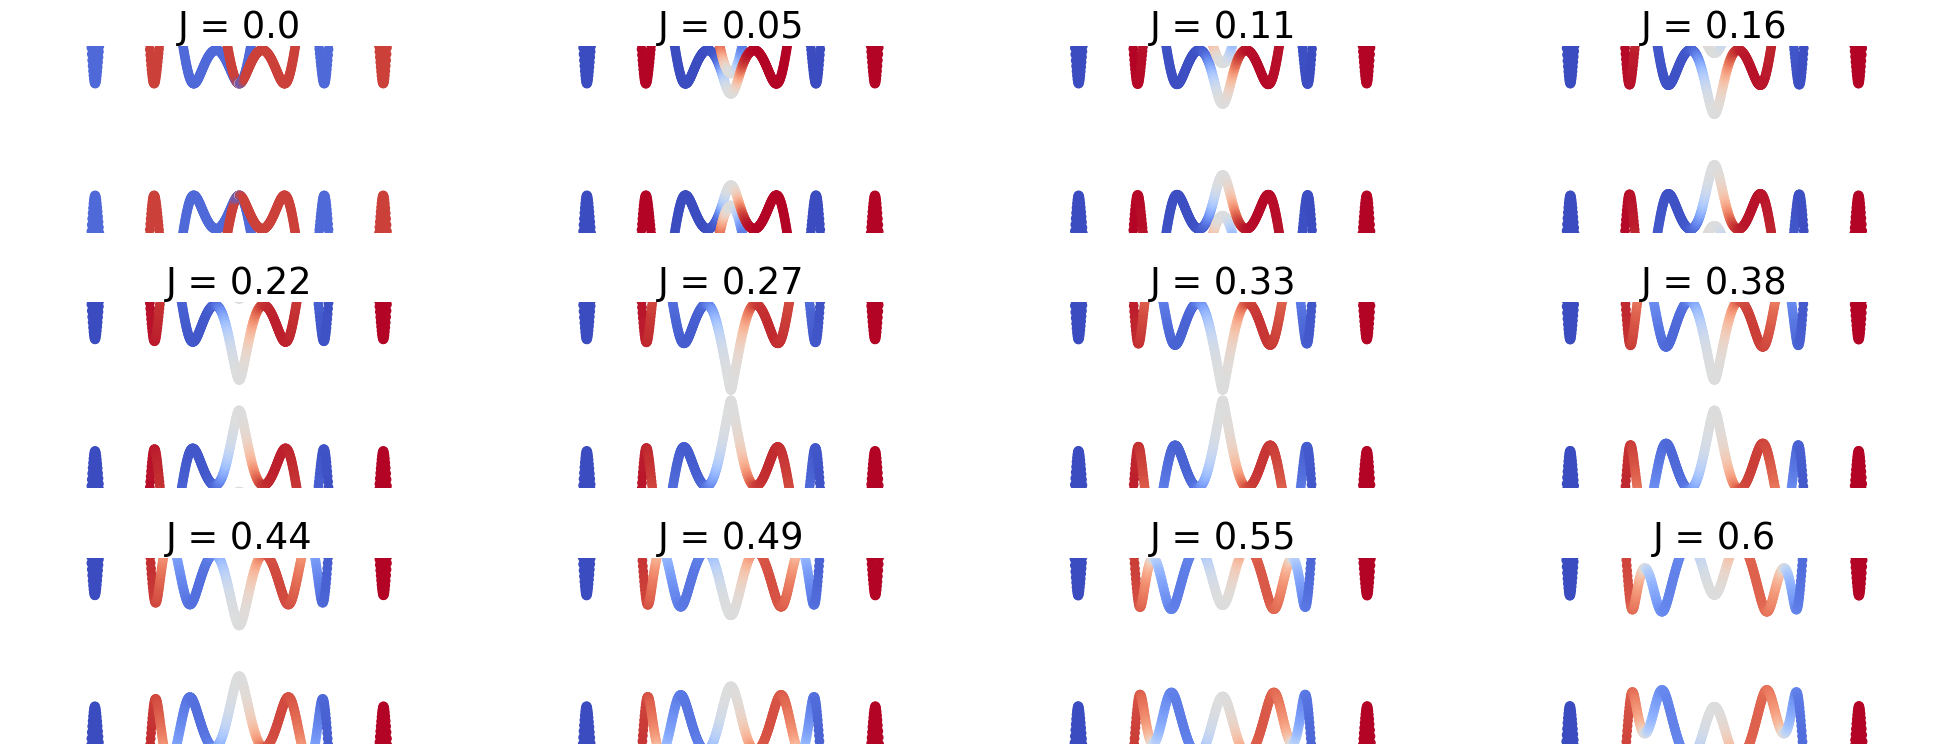

In [27]:
# plot the bands for different exchance couplings
from pyqula import geometry
Js = np.linspace(0.,0.6,12) # exchange couplings
ij = 0 # counter
for J in Js: # loop over exchange couplings
    g = geometry.triangular_lattice() # get the geometry
    h = g.get_hamiltonian() # get the Hamiltonian
    h.add_onsite(2.0) # shift chemical potential
    h.add_rashba(1.0) # add Rashba SOC
    h.add_zeeman([0.,0.,J]) # add exchange field
    h.add_swave(0.3) # add swave SC
    (k,e,c) = h.get_bands(nk=1000,operator="sx") # compute the bands
    plt.subplot(len(Js)//4,4,ij+1) ; ij +=1 
    plt.scatter(k,e,c=c) ; plt.axis("off") ; plt.ylim([-0.5,0.5]) ; plt.title("J = "+str(round(J,2))) # plot

plt.tight_layout() # adjust subplots

# Magnetism in 2D materials
In this session we will address several examples about magnetism in 2D materials

### Contents
- Symmetry breaking by magnetic interactions
- The strong coupling limit of a magnetic system
- Intermediate coupling regime and Stoner instability
- Non-collinear magnetism from competing interactions
- Non-collinear magnetism from spin-orbit coupling
- Non-collinear magnetism from magnetic frustration
- Charge-magnetic coupling

### Learning outcomes
- Understand the impact of electronic repulsion in an electronic structure
- Rationalize the intermediate and strong coupling regimes of an interacting magnetic system
- Understand mechanism leading to non-collinear magnetism
- Rationalize the interplay between charge and magnetic order

## Magnetic order driven by interactions
We will start showing the magnetic instabilities of a 1D chain at half filling, with two sites per unit cell

([], [])

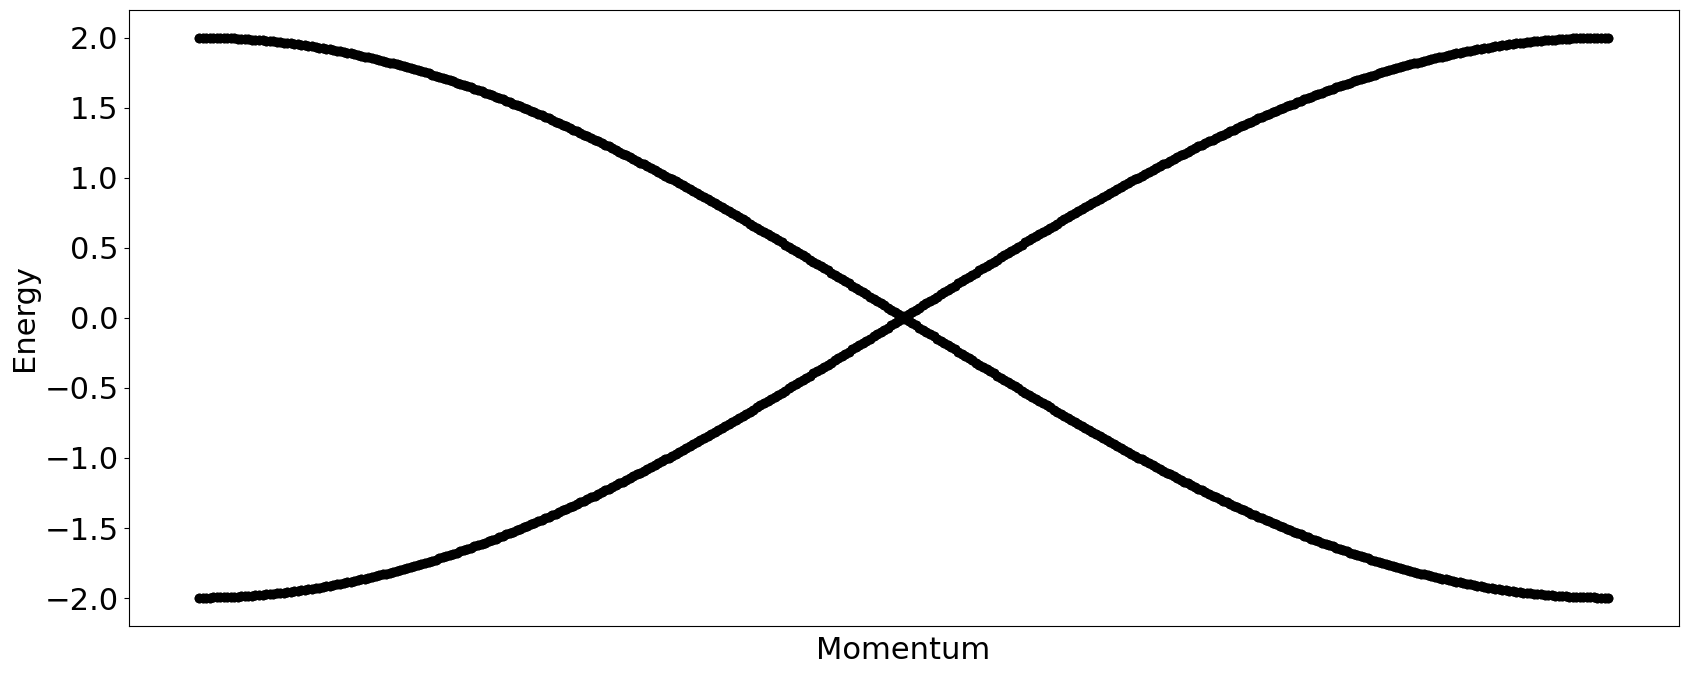

In [28]:
from pyqula import geometry
g = geometry.bichain() # generate a chain with two sites per unit cell
h = g.get_hamiltonian() # generate the Hamiltonian
(k,e) = h.get_bands() # compute band structure
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

### Exercise
- Discuss why there are two bands

(-3.85, 3.85, -0.05500000000000001, 0.05500000000000001)

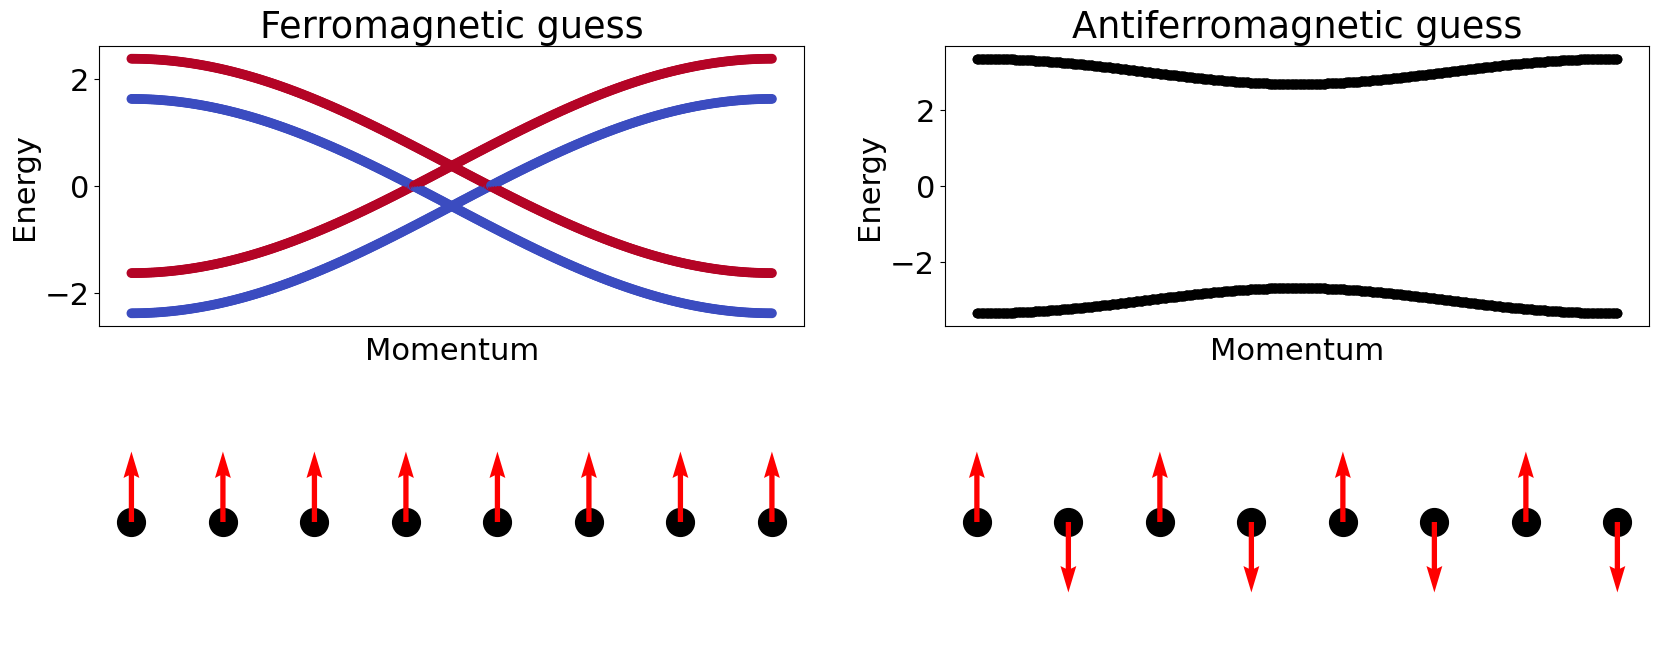

In [29]:
# let us now add interactions, and compute the electronic structure
from pyqula import geometry
g = geometry.bichain() # generate a chain with two sites per unit cell
h = g.get_hamiltonian() # generate the Hamiltonian

U = 6.0 # value of the local interaction

# first with a ferromagnetic guess
plt.subplot(2,2,1)
plt.title("Ferromagnetic guess")
hfe = h.get_mean_field_hamiltonian(U=U,mf="ferro") # solve the interacting problem with a mean-field guess
(k,e,c) = hfe.get_bands(operator="sz") # compute band structure
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

# plot magnetization
hs = hfe.get_supercell(4) ; gs = hs.geometry ; mz = hs.extract("mz") # supercell geometry and Mz
plt.subplot(2,2,3)
mz = hs.extract("mz") ; x = gs.r[:,0] ; y = gs.r[:,1] 
mz = mz/np.max(np.abs(mz)) # normalize
plt.scatter(x,y,c="black",s=400) ; plt.quiver(x,y,0.,mz,color="red",scale=10) ; plt.axis("off") # plot

# and with an antiferromagnetic guess
plt.subplot(2,2,2)
plt.title("Antiferromagnetic guess")
haf = h.get_mean_field_hamiltonian(U=U,mf="antiferro") # solve the interacting problem with a mean-field guess
(k,e) = haf.get_bands() # compute band structure
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

# plot magnetization
hs = haf.get_supercell(4) ; gs = hs.geometry ; mz = hs.extract("mz") # supercell geometry and Mz
plt.subplot(2,2,4)
mz = hs.extract("mz") ; x = gs.r[:,0] ; y = gs.r[:,1] 
mz = mz/np.max(np.abs(mz)) # normalize
plt.scatter(x,y,c="black",s=400) ; plt.quiver(x,y,0.,mz,color="red",scale=10) ; plt.axis("off") # plot

### Exercise
- Discuss which solution you think it has the lowest energy, and why
- Compute the selfconsistent solution for stronger values of the interaction. Which change do you observe?

## The strong coupling limit
Let us now compare the energies of a ferromagnetic and antiferromagnetic state in the strong coupling limit

Text(0, 0.5, 'Energy FE - AF')

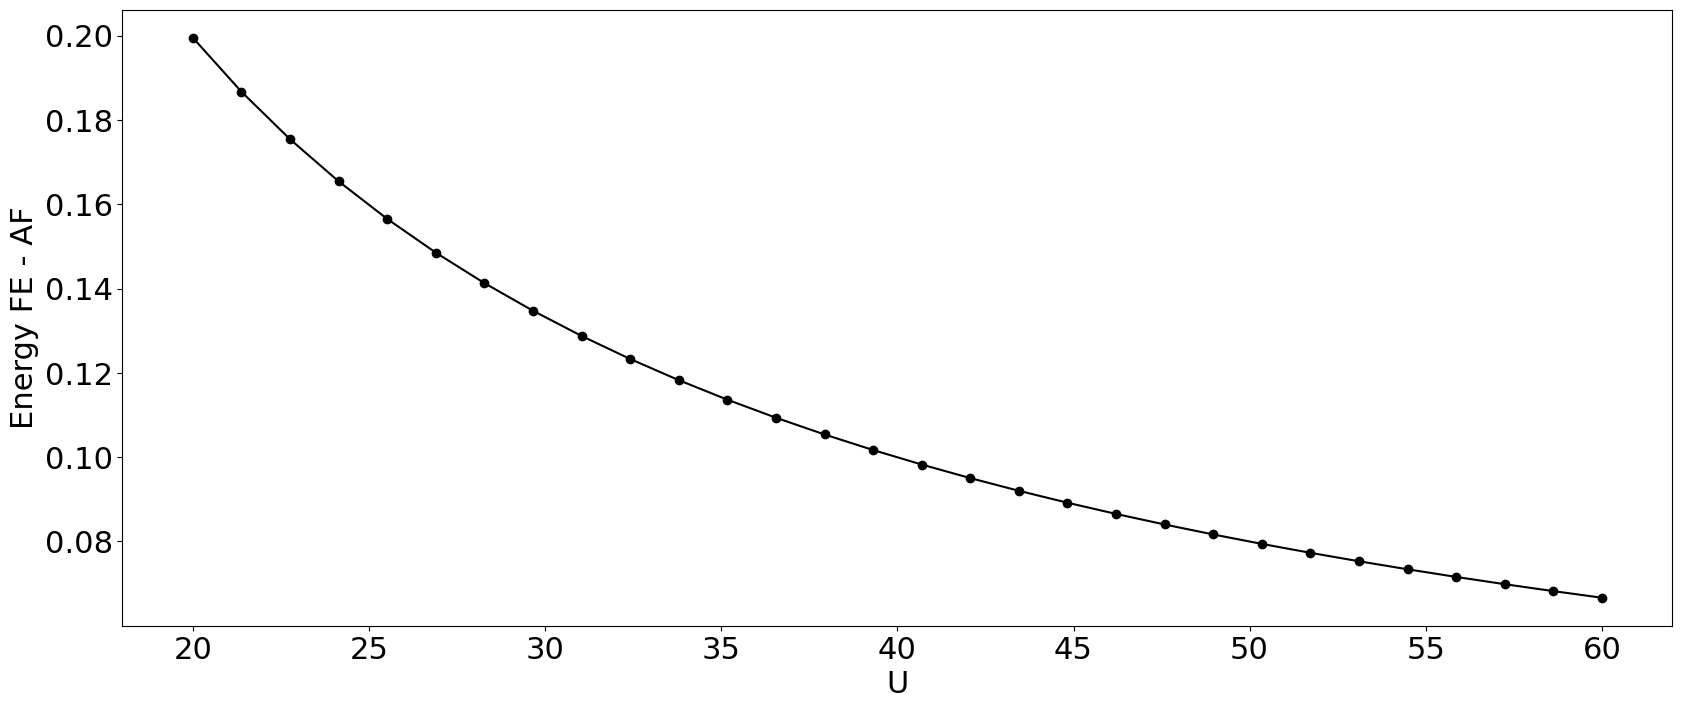

In [30]:
# let us now compute the energy difference as a function of U
from pyqula import geometry
def get_energy_difference(U):
    g = geometry.bichain() # generate a chain with two sites per unit cell
    h = g.get_hamiltonian() # generate the Hamiltonian
    (hfe,efe) = h.get_mean_field_hamiltonian(U=U,return_total_energy=True,mf="ferro",mix=0.9) # FE
    (haf,eaf) = h.get_mean_field_hamiltonian(U=U,return_total_energy=True,mf="antiferro",mix=0.9) # AF
    return efe - eaf

Us = np.linspace(20.,60,30) # values of U considered

Et = [get_energy_difference(U) for U in Us] # energy differences

plt.plot(Us,Et,c="black",marker="o") # plot total energy VS value of U
plt.xlabel("U") ; plt.ylabel("Energy FE - AF")

### Exercise
- Which state has the lowest energy?
- Discuss why the dependence of 1/U is observed in the energy differences between FE and AF configurations
- Compute this very same curve but going to lower values of U. Why does the 1/U behavior break down?

## Intermediate coupling regime and Stoner instability
Let us now show how there is a critical value of the electronic interaction to develop time-reversal symmetry breaking

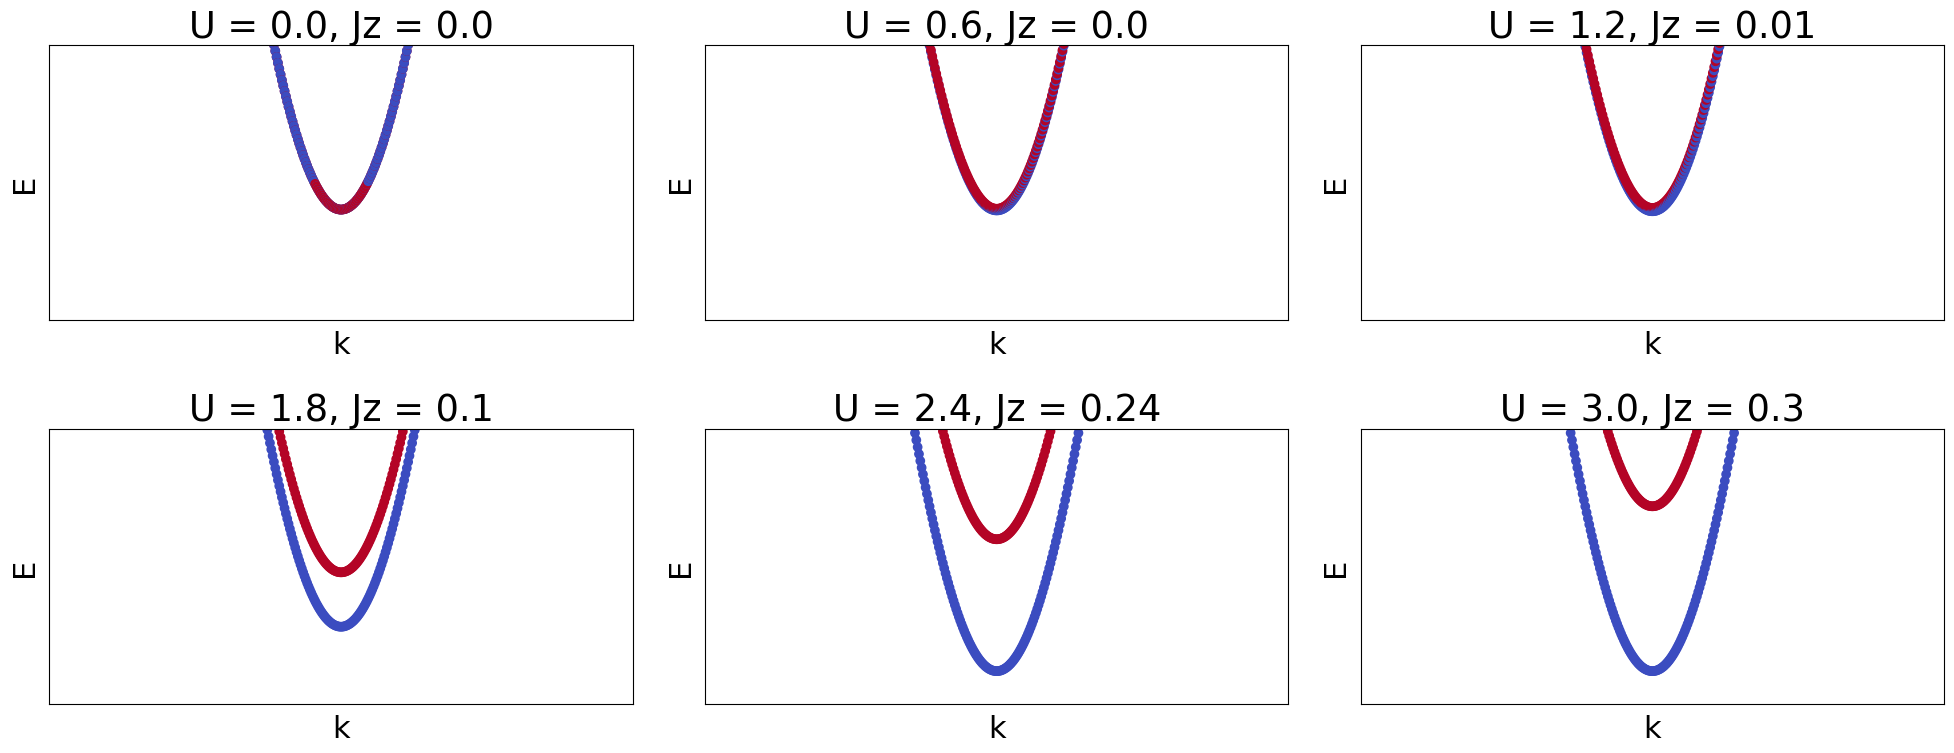

In [31]:
from pyqula import geometry
N = 6 # number of plots
Us = np.linspace(0.,3.0,N) # strengths of electronic interaction

ii = 1 # counter for the subplots
for U in Us:
    g = geometry.chain() # generate a chain
    h = g.get_hamiltonian() # generate the Hamiltonian
    h = h.get_mean_field_hamiltonian(U=U,filling=0.1,mf="ferro",mix=0.9,nk=200) # perform SCF
    plt.subplot(N//3,3,ii); ii += 1 
    (k,e,c) = h.get_bands(operator="sz") # compute band structure
    jz = np.mean(np.abs(h.extract("mz"))) # magnetization
    plt.title("U = "+str(np.round(U,2))+", Jz = "+str(np.round(jz,2))) # set the title
    plt.scatter(k,e,c=c) ; plt.yticks([]) ; plt.xticks([]) ; plt.ylim([-.5,.5]) ; plt.xlabel("k") ; plt.ylabel("E")
plt.tight_layout() # adjust the subplots

### Exercise
- Perform the calculation at a smaller filling (0.05 for example). Does the critical value increase or decrease?
- Perform the calculation at a bigger filling (0.2 for example). Does the critical value increase or decrease?
- Discuss why the critical value leading to magnetism changes

## Magnetism in flat bands
Let us now show the emergence of magnetic instabilities in a flat band system. For that, we will put a vacancy in a honeycomb lattice, which gives rise to a flat zero mode

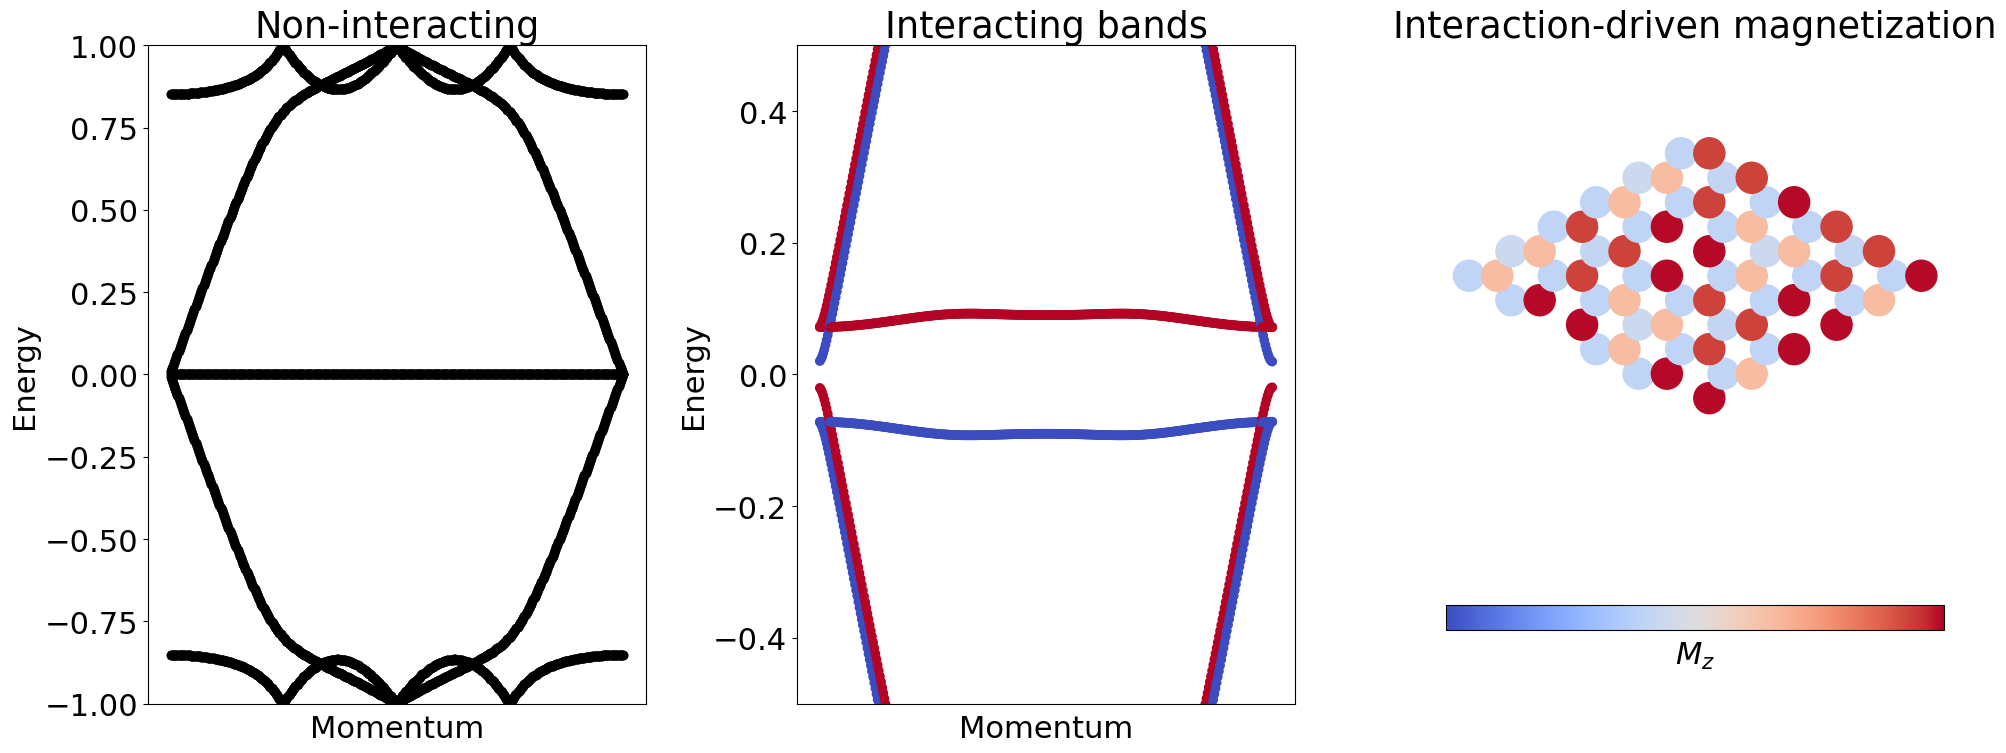

In [32]:
from pyqula import geometry
g = geometry.honeycomb_lattice() # generate a honeycomb lattice
N=3 ; g = g.get_supercell((N,N)) ; g = g.remove(0) # make a supercell and remove a site

# first plot the non-interacting bands
plt.subplot(1,3,1) ; plt.title("Non-interacting")
h = g.get_hamiltonian() # generate the Hamiltonian
(k,e) = h.get_bands() # compute band structure
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-1.,1.])# plot

# compute the mean-field Hamiltonian
U = 1.0 # value of the interaction
hscf = h.get_mean_field_hamiltonian(U=U,mix=0.9,mf="ferro") # perform mean-field

# plot the interacting bands
plt.subplot(1,3,2) ; plt.title("Interacting bands")
(k,e,c) = hscf.get_bands(operator="sz") # compute band structure
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) ; plt.ylim([-.5,.5])# plot

# plot the selfconsistent magnetization
plt.subplot(1,3,3) ; plt.title("Interaction-driven magnetization")
hs = hscf.get_supercell(2) ; gs = hs.geometry ; mz = hs.extract("mz") # supercell geometry and Mz
plt.scatter(gs.r[:,0],gs.r[:,1],c=mz,vmin=-.1,vmax=.1,s=500) ; plt.axis("off") ; plt.axis("equal")
plt.colorbar(label="$M_z$",ticks=[],orientation="horizontal")
plt.tight_layout() # adjust subplots

### Exercise
- Change the value of the interaction U. Do you have an instability also for smaller U?
- Discuss how this can be understood in terms of the Stoner instability
- Take a different supercell N, and discuss if you observe flat bands and interaction-induced magnetization
- Replace the honeycomb lattice by a square lattice with even N. Show that flat bands and a magnetization appears in the unit cell

## Non-collinear magnetism from competing interactions
Let us now include further neighbor hoppings, which promotes competing magnetic interactions

(-10.45, 10.45, -0.05500000000000001, 0.05500000000000001)

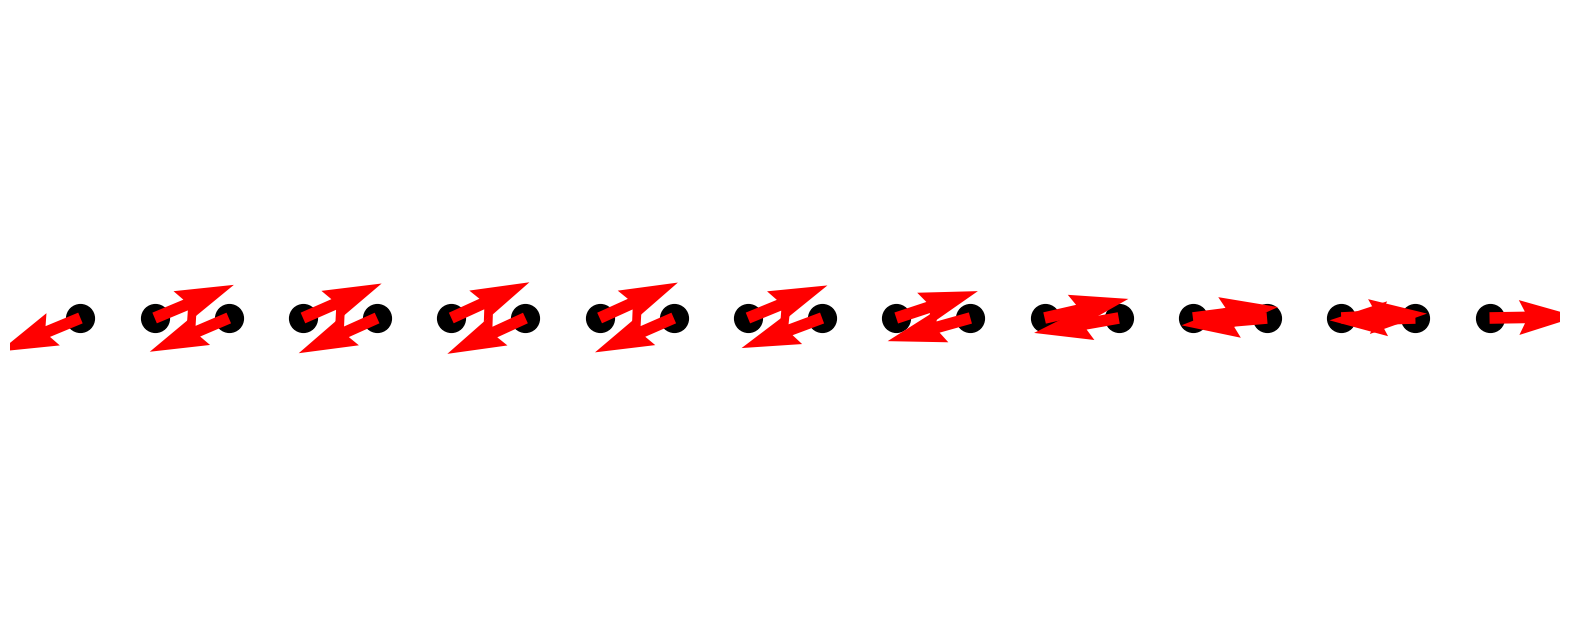

In [33]:
from pyqula import geometry
g = geometry.chain() # generate a chain 
g = g.get_supercell(20) ; g.dimensionality = 0 # use open boundaries, to avoid incommensurability issues
h = g.get_hamiltonian(tij=[1.,.3]) # generate the Hamiltonian

# generate the selfconsistent (SCF) Hamiltonian
U = 10. # strong Hubbard interaction
h = h.get_mean_field_hamiltonian(U=U,mf="XY",mix=0.9) # solve the interacting problem with a mean-field guess
mx = h.extract("mx") ; my = h.extract("my") ; x = h.geometry.r[:,0] ; y = h.geometry.r[:,1] # get magnetization
plt.scatter(x,y,c="black",s=400) ; plt.quiver(x,y,mx,my,color="red") ; plt.axis("off") # plot magnetization

### Exercise
- Discuss why including second neighbor hopping gives rise to a non-collinear magnetic state
- Is there a long neighbor hopping that can be included that does not lead to non-collinearity? Include it and show that you recover the antiferromagnetic state

#### In the lab
- Non-collinear magnetism coming from copeting interactions is observed in 2D materials, and in particular in the multiferroic monolayer NiI2
https://www.nature.com/articles/s41586-021-04337-x

## Non-collinear magnetism from spin-orbit coupling
We will now see that spin-orbit coupling is also able to generate a non-collinear magnetic texture

(-4.95, 4.95, -0.05500000000000001, 0.05500000000000001)

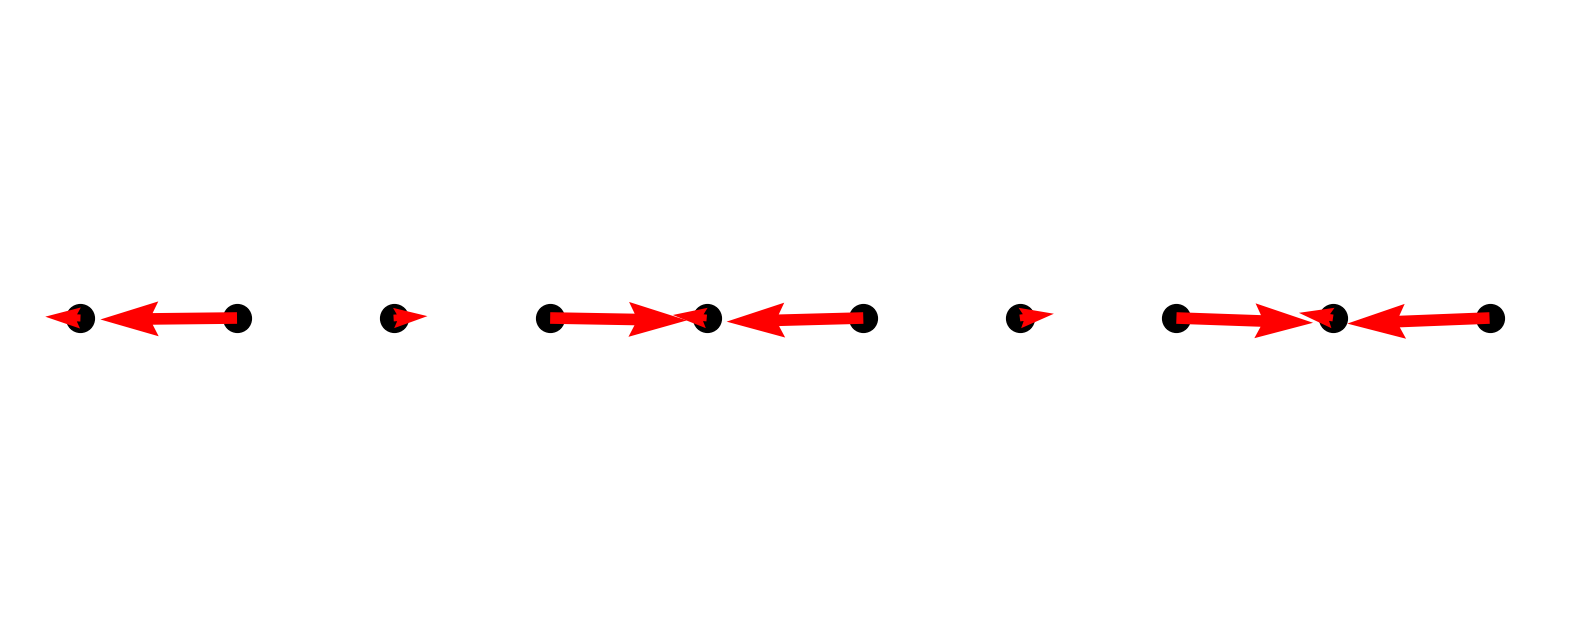

In [34]:
from pyqula import geometry
g = geometry.chain() # generate a chain 
g = g.get_supercell(10) ; g.dimensionality = 0 # use open boundaries, to avoid incommensurability issues
h = g.get_hamiltonian() # generate the Hamiltonian
h.add_rashba(1.) # add Rashba spin-orbit coupling

# generate the SCF Hamiltonian
U = 10. # strong Hubbard interaction
h = h.get_mean_field_hamiltonian(U=U,mf="random",mix=0.9) # solve the interacting problem with a mean-field guess
mx = h.extract("mx") ; my = h.extract("my") ; x = h.geometry.r[:,0] ; y = h.geometry.r[:,1] # get magnetization
plt.scatter(x,y,c="black",s=400) ; plt.quiver(x,y,mx,my,color="red") ; plt.axis("off") # plot magnetization

### Exercise
- Discuss why spin-orbit coupling gives rise to non-collinear magnetism
- What is the term in the spin Hamiltonian that Rashba SOC generates?
- What happens to the spin texture if the sign of the Rashba term is reversed? (Physically, it means flipping the sample upside down)

## Magnetic instabilities of the square lattice
Let us now address the magnetic instabilities of the square lattice

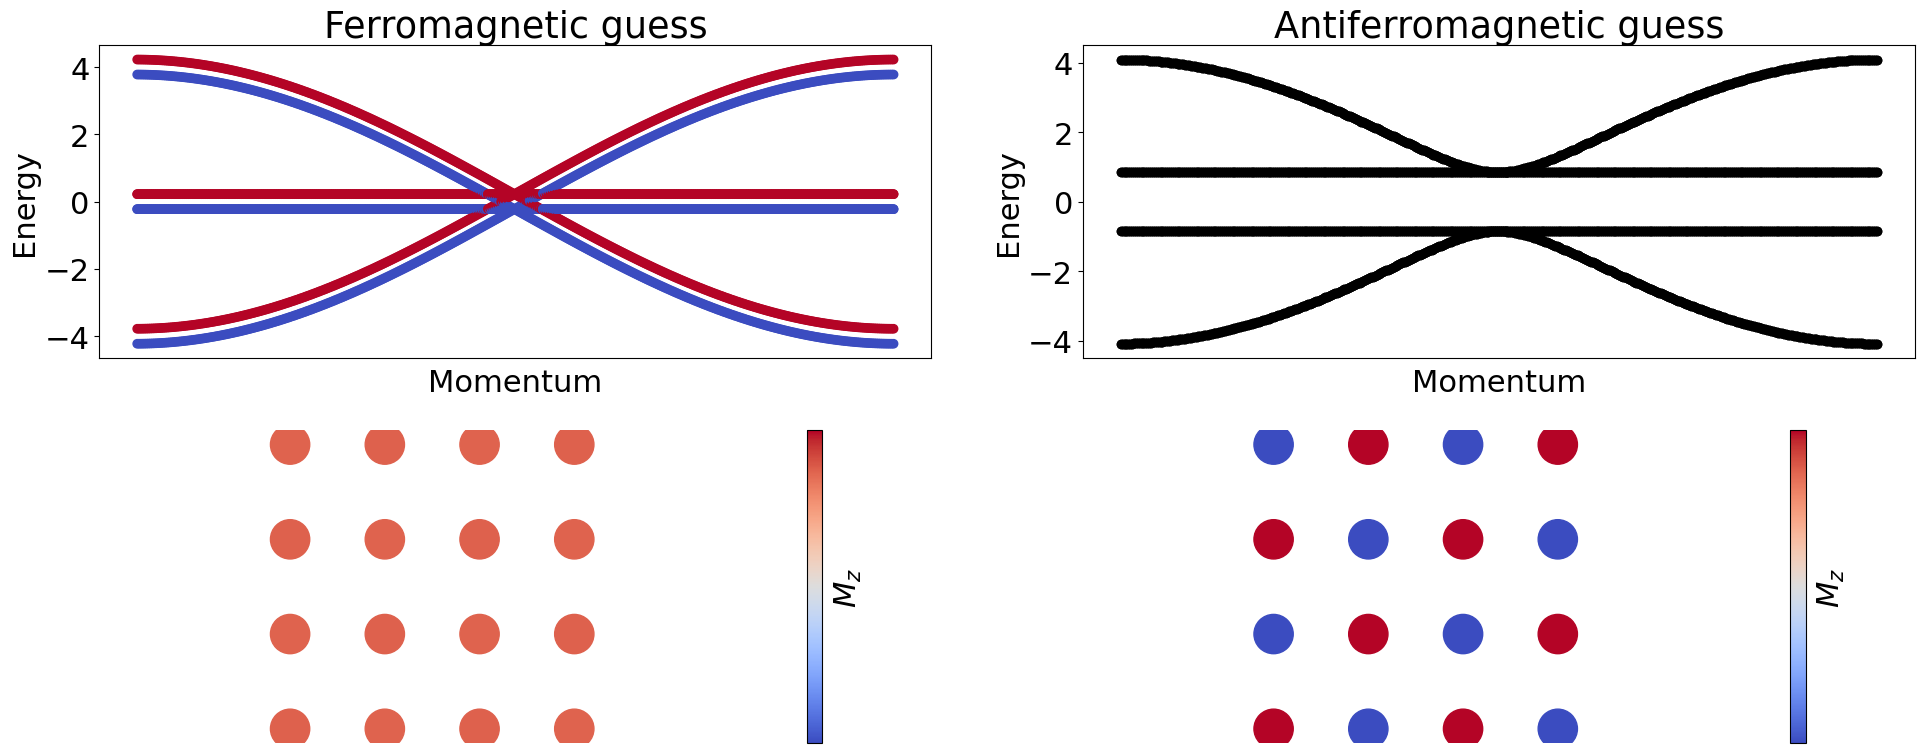

In [35]:
from pyqula import geometry
g = geometry.square_lattice_bipartite() # generate a chain with two sites per unit cell
h = g.get_hamiltonian() # generate the Hamiltonian

# let us now add interactions, and compute the electronic structure
U = 3.0 # value of the local interaction

# first with a ferromagnetic guess
plt.subplot(2,2,1)
plt.title("Ferromagnetic guess")

hfe = h.get_mean_field_hamiltonian(U=U,mf="ferro",mix=0.9) # FE guess
(k,e,c) = hfe.get_bands(operator="sz") # compute band structure
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

# plot z-component of the magnetization
hs = hfe.get_supercell(2) ; gs = hs.geometry ; mz = hs.extract("mz") # supercell geometry and Mz
plt.subplot(2,2,3)
plt.scatter(gs.r[:,0],gs.r[:,1],c=mz,vmin=-.3,vmax=.3,s=800) ; plt.yticks([]) ; plt.xticks([])
plt.axis("equal") ; plt.axis("off")
plt.colorbar(label="$M_z$",ticks=[])

# and with an antiferromagnetic guess
plt.subplot(2,2,2)
plt.title("Antiferromagnetic guess")
haf = h.get_mean_field_hamiltonian(U=U,mf="antiferro",mix=0.9) # AF guess
(k,e) = haf.get_bands() # compute band structure
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

# plot z-component of the magnetization
hs = haf.get_supercell(2) ; gs = hs.geometry ; mz = hs.extract("mz") # supercell geometry and Mz
plt.subplot(2,2,4)
plt.scatter(gs.r[:,0],gs.r[:,1],c=mz,vmin=-.3,vmax=.3,s=800) ; plt.yticks([]) ; plt.xticks([]) 
plt.axis("equal") ; plt.axis("off")
plt.colorbar(label="$M_z$",ticks=[])

plt.tight_layout()

## Non-collinear magnetic order from geometric frustration
We will now address 2D models that show non-collinear magnetism due to the geometric frustration of the lattice.

(-4.124999999999999, 4.124999999999999, -2.3815698604072066, 2.381569860407206)

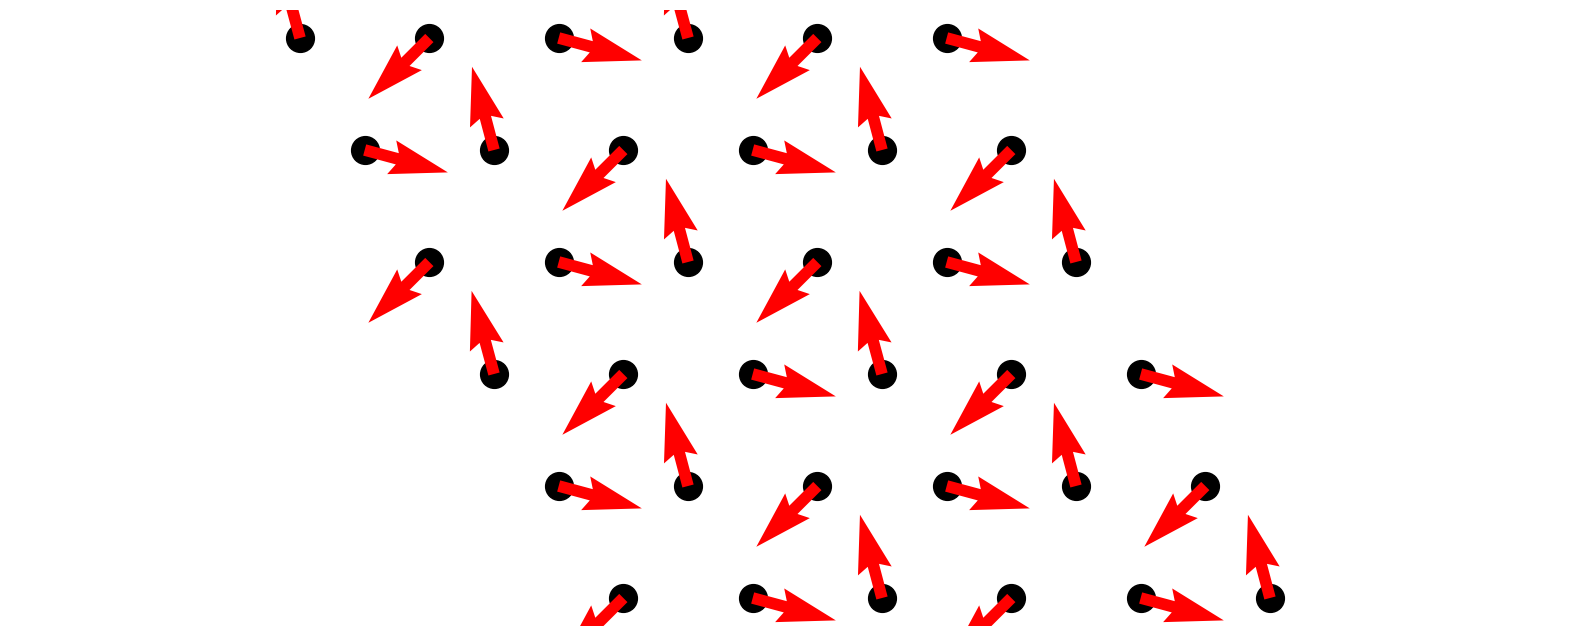

In [36]:
from pyqula import geometry
g = geometry.triangular_lattice() # generate a chain 
g = g.get_supercell((3,3)) # make a supercell
h = g.get_hamiltonian() # generate the Hamiltonian

# generate the SCF Hamiltonian
U = 10. # strong Hubbard interaction
h = h.get_mean_field_hamiltonian(U=U,mf="XY",mix=0.9) # solve the interacting problem with a mean-field guess
hs = h.get_supercell(2) # generate a supercell
mx = hs.extract("mx") ; my = hs.extract("my") ; x = hs.geometry.r[:,0] ; y = hs.geometry.r[:,1] # get magnetization
plt.scatter(x,y,c="black",s=400) ; plt.quiver(x,y,mx,my,color="red")  # plot magnetization
plt.axis("equal") ; plt.axis("off")

### Exercise
- Plot the band structure for the SCF solution for the 3x3 supercell, and estimate its gap
- Plot the band structure for the SCF solution for the 1x1 supercell, and estimate its gap
- Can you infer which one is the lowest energy solution, and why?

### In the lab
- 1T-NbSe2 hosts a triangular lattice of magnetic sites, stemming from the charge density wave instability of the compound, each spin living in a charge density wave
https://www.science.org/doi/10.1126/sciadv.abi6339

## Competition between interactions
Let us now address the magnetic instabilities of the honeycomb lattice, and see the interplay between charge and spin order

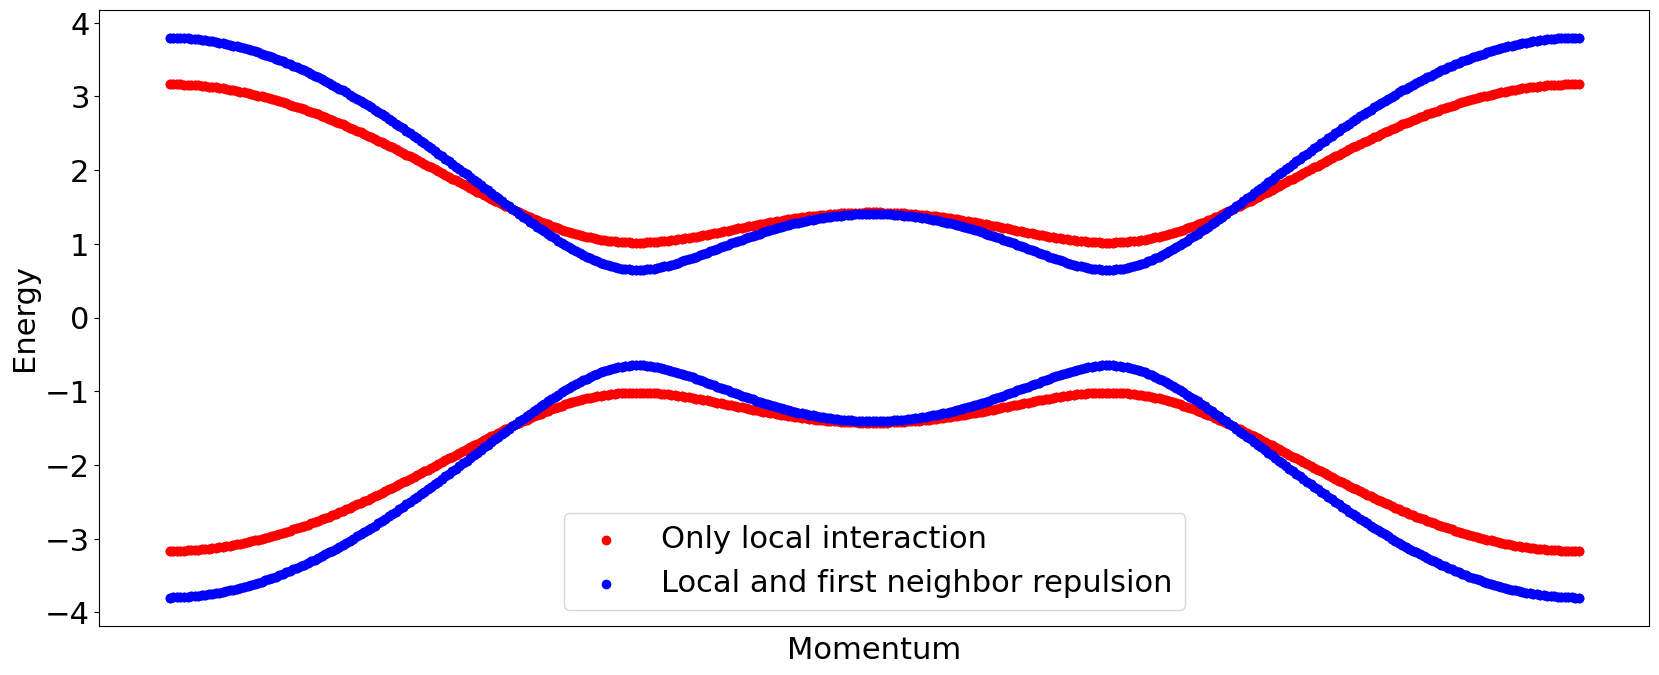

In [37]:
from pyqula import geometry
g = geometry.honeycomb_lattice() # generate a chain with two sites per unit cell
h = g.get_hamiltonian() # generate the Hamiltonian

# let us now add interactions, and compute the electronic structure
U = 3.5 # value of the local interaction
V = 1 # value of the first neighbor interaction

# first with U
hU = h.get_mean_field_hamiltonian(U=U,mf="antiferro",mix=0.9) # only U
(k,e) = hU.get_bands() # compute band structure
plt.scatter(k,e,c="red",label="Only local interaction") ; plt.xlabel("Momentum") 
plt.ylabel("Energy") ; plt.xticks([]) # plot

# and with U and V
hUV = h.get_mean_field_hamiltonian(U=U,V1=V,mf="antiferro",mix=0.9) # U and V
(k,e) = hUV.get_bands() # compute band structure
plt.scatter(k,e,c="blue",label="Local and first neighbor repulsion") 
plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot

plt.legend()

### Exercise
- Discuss what is the impact of first neighbor repulsion. Is it promoting or quenching magnetic order?
- Take a value of U slightly above the critical one (U=2.3), and add a small first neighbor repulsion. Do you observe magnetic order?

## Competition between charge and magnetic order in the honeycomb lattice
Let us now look in more detail at the interacting honeycomb lattice. In particular, we will see what is the interplay between U and V, showing that U promotes magnetic order and V promotes charge order

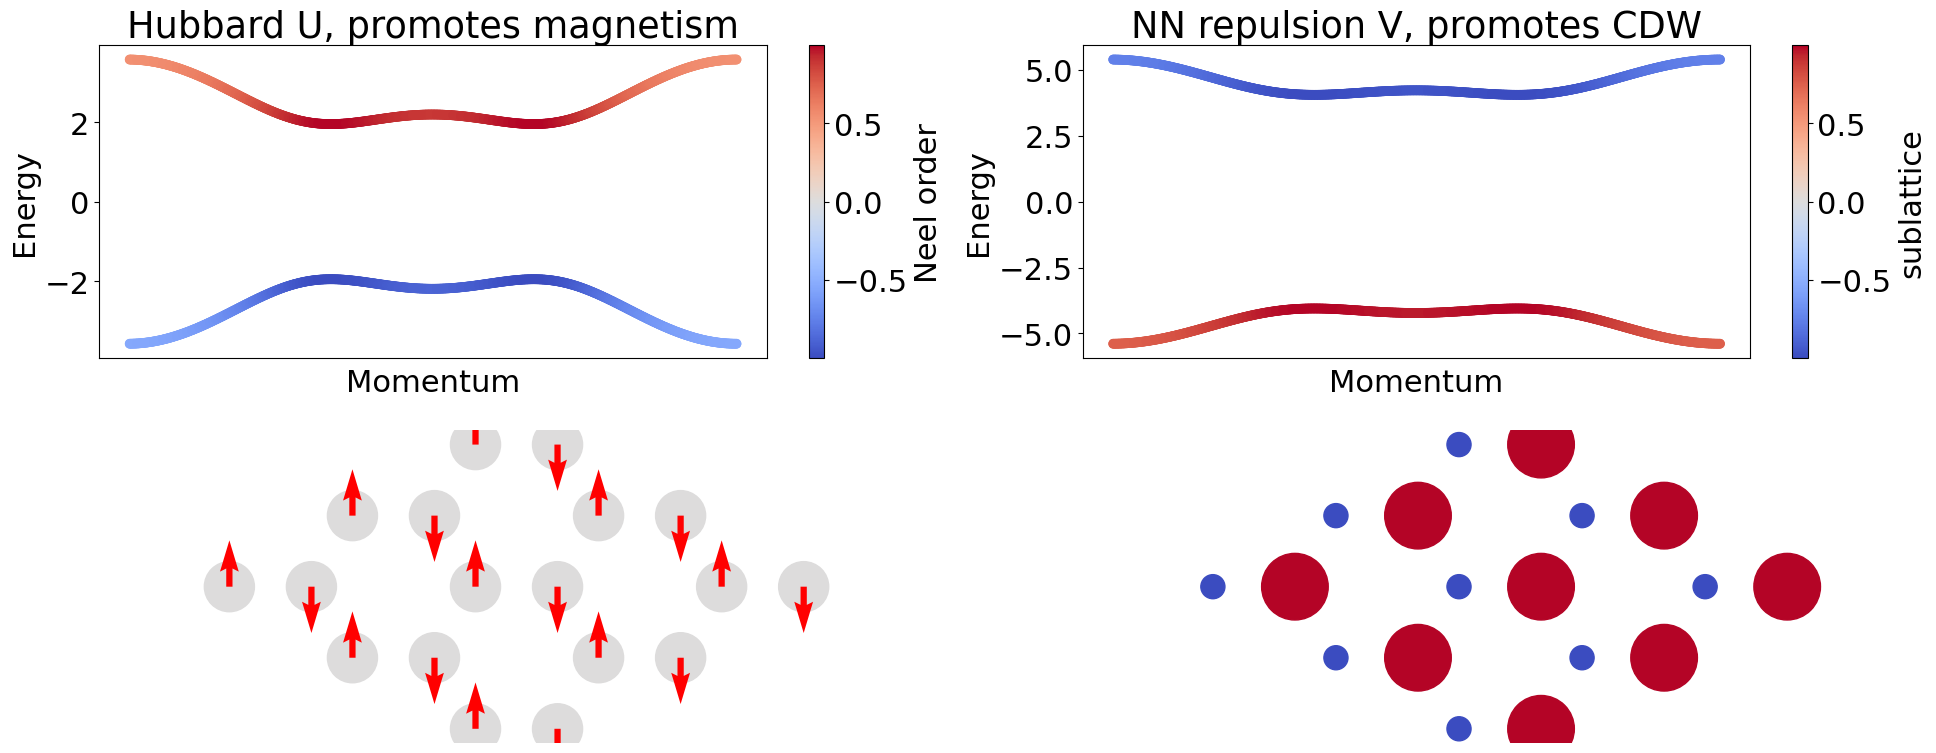

In [38]:
from pyqula import geometry
g = geometry.honeycomb_lattice() # generate a chain with two sites per unit cell
h = g.get_hamiltonian() # generate the Hamiltonian

# let us now add interactions, and compute the electronic structure
U = 5.0 # value of the local interaction
V = 1.5 # value of the first neighbor interaction

def plot_MCDW(h): # given a Hamiltonian, plot magnetization and CDW
    hs = h.get_supercell(3) ; mz = hs.extract("mz") ; mx = hs.extract("mx") 
    x = hs.geometry.r[:,0] ; y = hs.geometry.r[:,1] ; ons = hs.extract("density") ; ons = np.tanh(ons) # saturate
    plt.scatter(x,y,c=ons,vmin=-1,vmax=1.,s=(1.3+ons)*1000) # plot CDW
    if np.max(mx**2+mz**2)>1e-3: plt.quiver(x,y,mx,mz,color="red")  # plot magnetization
    plt.axis("equal") ; plt.axis("off")

# first with U
plt.subplot(2,2,1)
plt.title("Hubbard U, promotes magnetism")
hU = h.get_mean_field_hamiltonian(U=U,mf="antiferro",mix=0.9) # only U
op = h.get_operator("sz")*h.get_operator("sublattice") # Sz times sublattice
(k,e,c) = hU.get_bands(operator=op) # compute band structure
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) # plot
plt.colorbar(label="Neel order") # plot
plt.subplot(2,2,3) ; plot_MCDW(hU) # make the plot of magnetization and cdw


# and with V
plt.subplot(2,2,2)
plt.title("NN repulsion V, promotes CDW")
hV = h.get_mean_field_hamiltonian(V1=V,mf="random",mix=0.9) # U and V
(k,e,c) = hV.get_bands(operator="sublattice") # compute band structure
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) 
plt.colorbar(label="sublattice") # plot
plt.subplot(2,2,4) ; plot_MCDW(hV) # make the plot of magnetization and cdw

plt.tight_layout() # adjust plots

### Exercise
- Replace the sublattice*mz operator in Hubbard case, by the sublattice operator. What do you observe and why?
- Replace the sublattice operator in V-interaction case, by the sublattice*mz operator. What do you observe and why?


#### In the lab
- A competition between antiferromagentism and charge density wave order is observed in graphene monolayer at large magnetic fields
https://www.nature.com/articles/nature12800

## Simultaneous charge and magnetic ordering in the honeycomb lattice
Let us now impose the existence of both charge order and magnetism in the honeycomb lattice

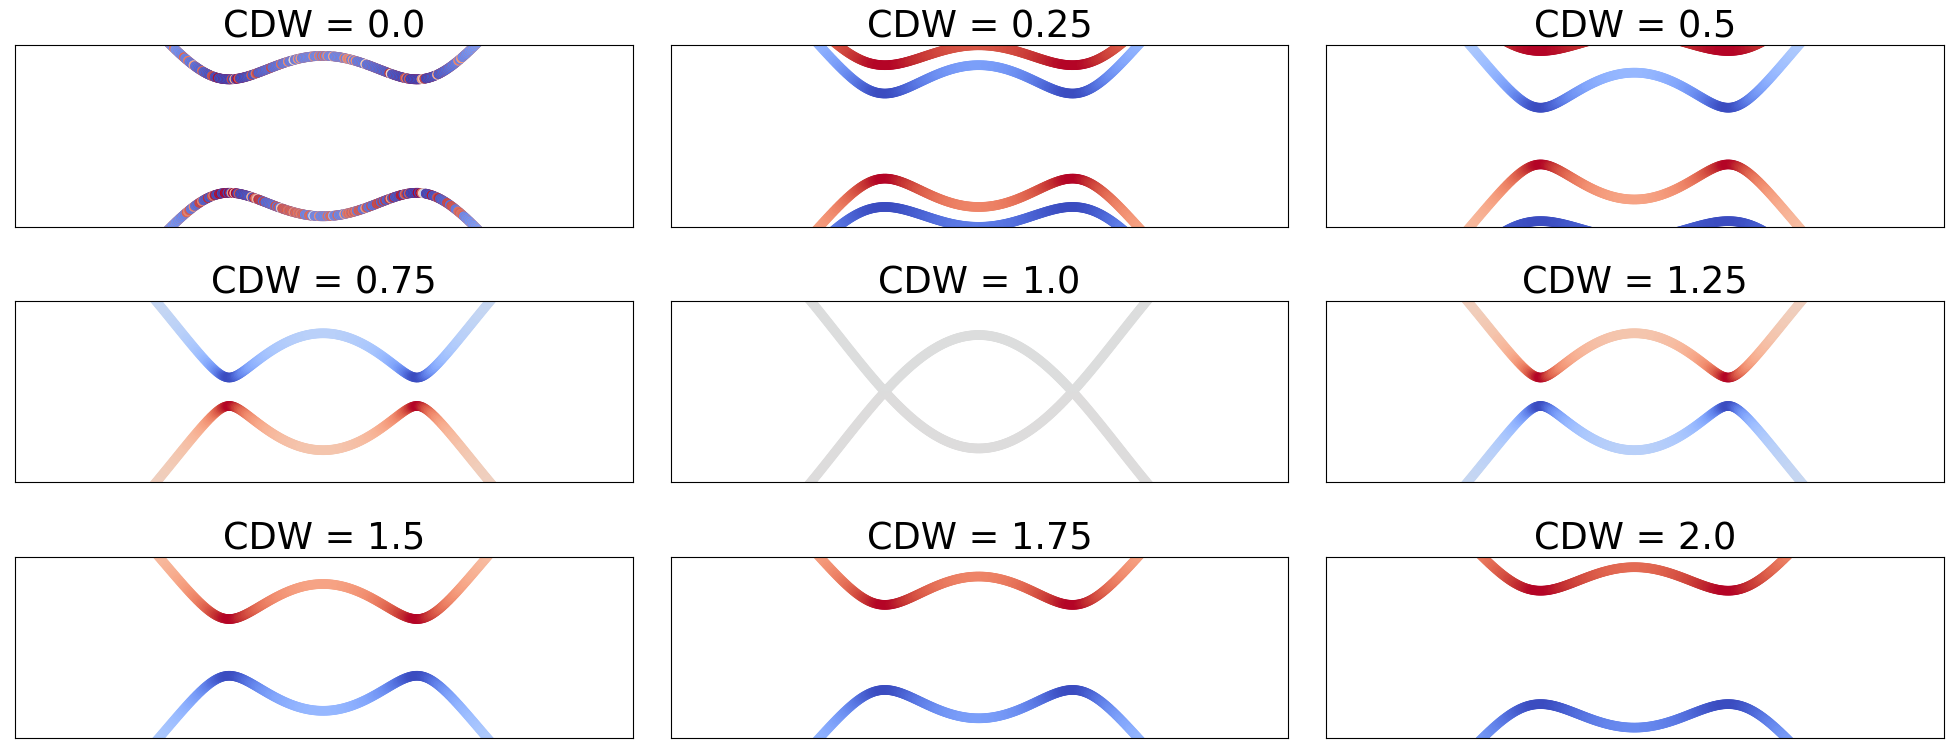

In [39]:
from pyqula import geometry
N = 9 # number of plots
cdws = np.linspace(0.,2.0,N) # strengths

ii = 1 # counter for the subplots
for cdw in cdws:
    g = geometry.honeycomb_lattice() # generate a chain
    h = g.get_hamiltonian() # generate the Hamiltonian
    h.add_sublattice_imbalance(cdw) # Add a CDW order explicitly
    h.add_antiferromagnetism(1.0) # add antiferromagnetism explicitly
    plt.subplot(N//3,3,ii); ii += 1 
    (k,e,c) = h.get_bands(operator="sublattice") # compute band structure
    plt.title("CDW = "+str(np.round(cdw,2))) # set the title
    plt.scatter(k,e,c=c) ; plt.yticks([]) ; plt.xticks([]) ; plt.ylim([-1.6,1.6]) # plot
plt.tight_layout() # adjust the subplots

### Exercise
- Given a certain value of the AF order, what is the value of the CDW required to close the gap?
- Discuss why it is energetically unfavorable to have simultaneously antiferromagnetism and charge density wave order

### In the lab
- Simultaneous magnetic and electric polarization can emerge in 2D materials, in particular stemming from non-collinear magnetic order and spin-orbit coupling https://www.nature.com/articles/s41586-021-04337-x

## Electronic instabilities in graphene multilayers
Let us now address specific graphene multilayers, and show how magnetic instabilities can emerge due to their enhanced density of states

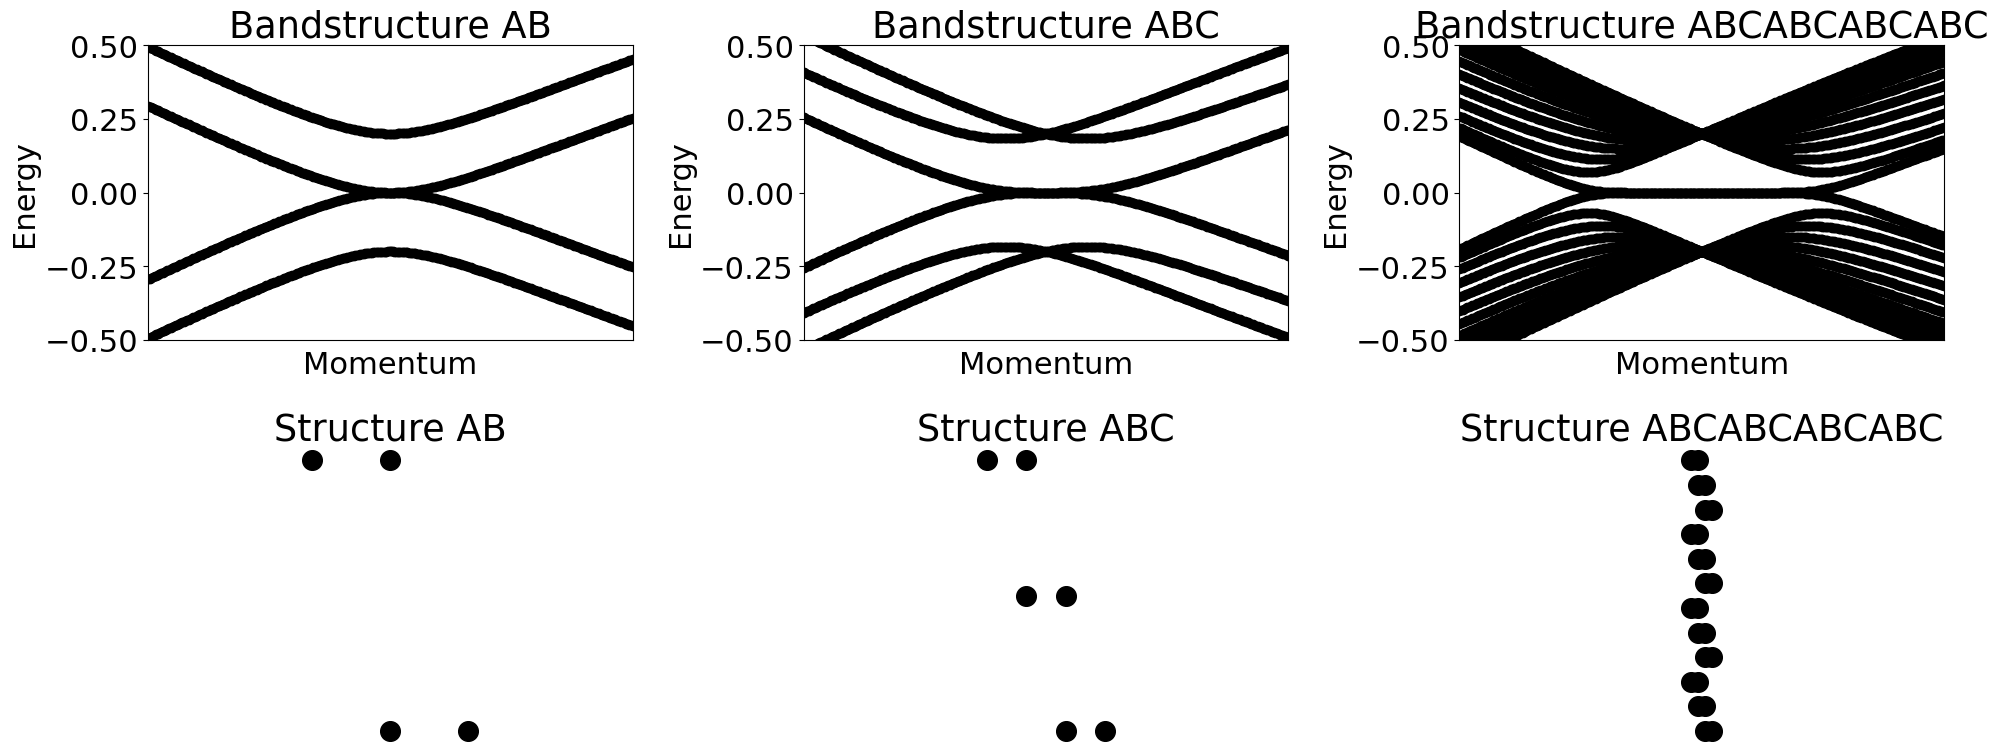

In [40]:
from pyqula import specialhamiltonian
mls = ["AB","ABC","ABCABCABCABC"] # graphene multilayers to consider
ii = 1 # counter
for m in mls: # loop over multilayers
    h = specialhamiltonian.multilayer_graphene(l=m,ti=0.2) # Hamiltonian of the graphene multilayer
    # make a small Kpath around the K point
    Kp = h.geometry.get_kpath(["K"])[0] ; kpath = [dk*Kp for dk in np.linspace(0.9,1.1,300)]
#    h = h.get_supercell(4) # make a supercell to see the bands easier
#    h.add_onsite(lambda r: r[2]*0.1/np.max(h.geometry.r[:,2])) # to add an electric field 
    (k,e) = h.get_bands(nk=300,kpath=kpath) # compute band structure
    plt.subplot(2,len(mls),ii) ; plt.title("Bandstructure "+m)
    plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") ; plt.xticks([]) 
    plt.ylim([-.5,.5]) ; plt.xlim([min(k),max(k)])
    plt.subplot(2,len(mls),ii+len(mls)) ; plt.title("Structure "+m) ; gs = h.geometry
    plt.scatter(gs.r[:,0],gs.r[:,2],c="black",s=200) ; plt.axis("equal") ; plt.axis("off")
    ii += 1
    
plt.tight_layout() # tight layout

### Exercise
- Which of the three graphene multilayers above can have a stronger electronic instability? Discuss why
- Add an interlayer bias (as noted in the comment). WHat happens to the electronic structure?

## Magnetic symmetry breaking in graphene multilayers
We will now add interactions to a grpahene multilayer, and see that those interactions open up a gap

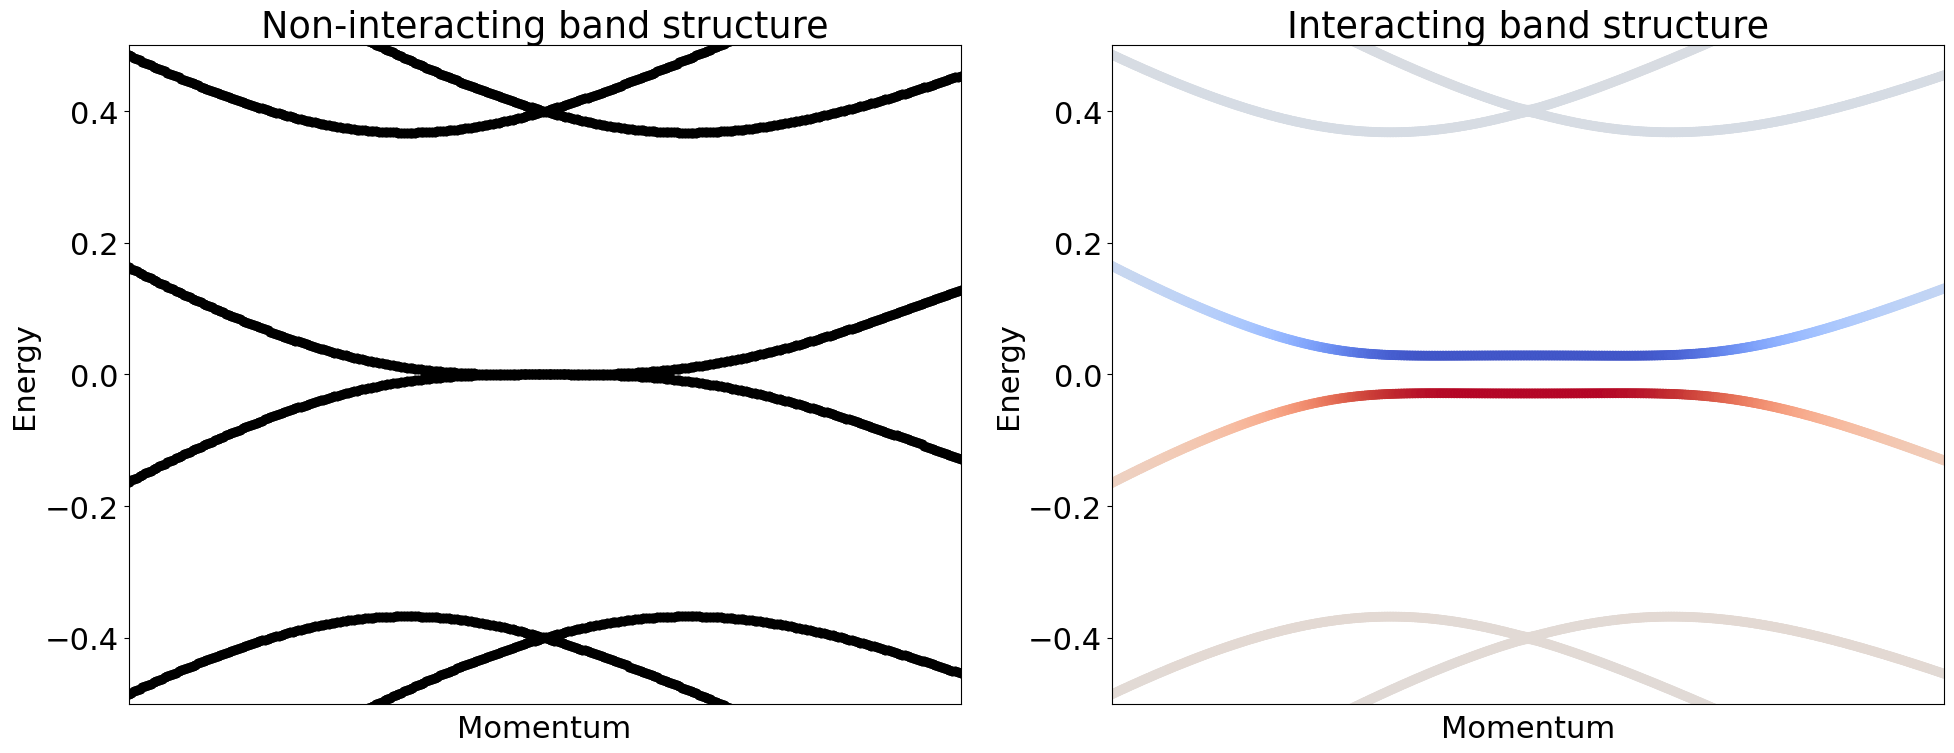

In [41]:
from pyqula import specialhamiltonian
h = specialhamiltonian.multilayer_graphene(l="ABC",ti=0.4) # Hamiltonian of the graphene multilayer
h.turn_spinful() 
# first plot the non-interacting bands
plt.subplot(1,2,1) ; plt.title("Non-interacting band structure")
# kpath around the K point
Kp = h.geometry.get_kpath(["K"])[0] ; kpath = [dk*Kp for dk in np.linspace(0.9,1.1,300)]
(k,e) = h.get_bands(nk=400,kpath=kpath) # compute band structure 
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") 
plt.xticks([]) ; plt.ylim([-.5,.5]) ; plt.xlim([min(k),max(k)])

# compute the mean-field Hamiltonian
U = 2. # value of the interaction
hscf = h.get_mean_field_hamiltonian(U=U,filling=0.5,mix=0.9,mf="random",nk=30) # perform SCF

# plot the interacting bands
plt.subplot(1,2,2) ; plt.title("Interacting band structure")
op = hscf.get_operator("sz")*hscf.get_operator("sublattice")
(k,e,c) = hscf.get_bands(operator=op,nk=400,kpath=kpath) # compute band structure
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") 
plt.xticks([]) ; plt.ylim([-.5,.5]) ; plt.xlim([min(k),max(k)])

plt.tight_layout() # adjust subplots

### Exercise
- Replace the multilayer by a single graphene monolayer. Do you still observe the electronic instability? Discuss why
- Add an out of plane electric field in the sample (add_onsite). What happens to the electronic instability?
- Change the doping of the system (filling), how does the electronic instability change?

#### In the lab
- Symmetry breaking in aligned multilayers has been observed experimentally for a variety of different thicknesses
https://www.science.org/doi/10.1126/science.aar6855

## Spinon Fermi surface in gapless quantum spin liquids
In the description of quantum spin liquids, effective single particle excitations known as spinons arise, that can be effectively described with a tight binding Hamiltonian. Here we will see how the Fermi surface of a gapless quantum spin liquid in the triangular lattice can evolve as a function of the couplings

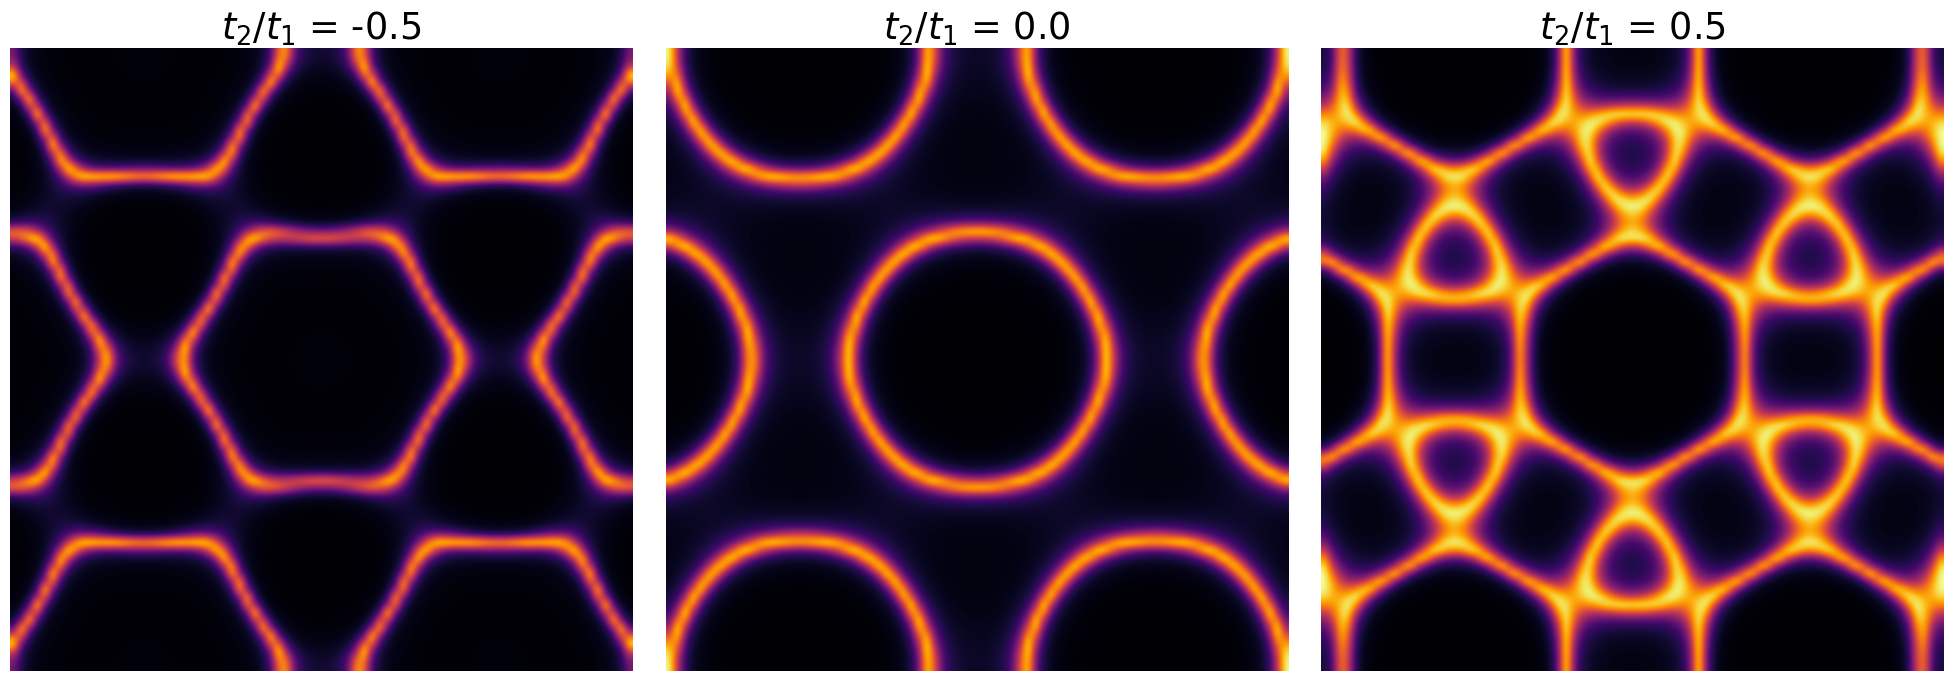

In [42]:
from pyqula import geometry
g = geometry.triangular_lattice() # generate a honeycomb lattice
nk = 80 ; delta = 30./nk # smearing and kmesh
t2s = np.linspace(-0.5,0.5,3) # loop over t2s
ip = 1 # counter for the plot
for t2 in t2s: # loop over t2s
    h = g.get_hamiltonian(tij=[1.,t2]) ; h.set_filling(0.5,nk=10) # generate the Hamiltonian at half filling
    (x,y,d) = h.get_fermi_surface(e=0.,delta=delta,nk=nk) # compute Fermi surface
    plt.subplot(1,len(t2s),ip) ; ip += 1 # set subplot
    d2d = d.reshape((nk,nk)) ; plt.imshow(d2d,vmin=0.,vmax=2./delta,cmap="inferno",interpolation="bicubic") 
    plt.title("$t_2/t_1$ = "+str(np.round(t2,2))) ; plt.axis("off")
plt.tight_layout()

### Exercise
- Replace the triangular lattice by a square lattice (square_lattice), recompute the spinon Fermi surfaces
- Replace the triangular lattice by a Kagome lattice (kagome_lattice), recompute the spinon Fermi surfaces
- Discuss why the effective tight binding model should be enforced to be at half filling
- Discuss how the hoppings of the quantum spin liquid depend on the exchange coupling of the parent Heisenberg model

#### In the lab
- Signatures of spinon Fermi surfaces in the triangular lattice have been observed with scanning tunnel microscopy
https://www.nature.com/articles/s41567-021-01321-0

## Topological magnons in 2D magnets
Ordered 2D magnets feature magnon excitations, that can be effectively described with a single particle Hamiltonian. Here we will see how such magnon excitations can develop a topological gap, leading to edge states

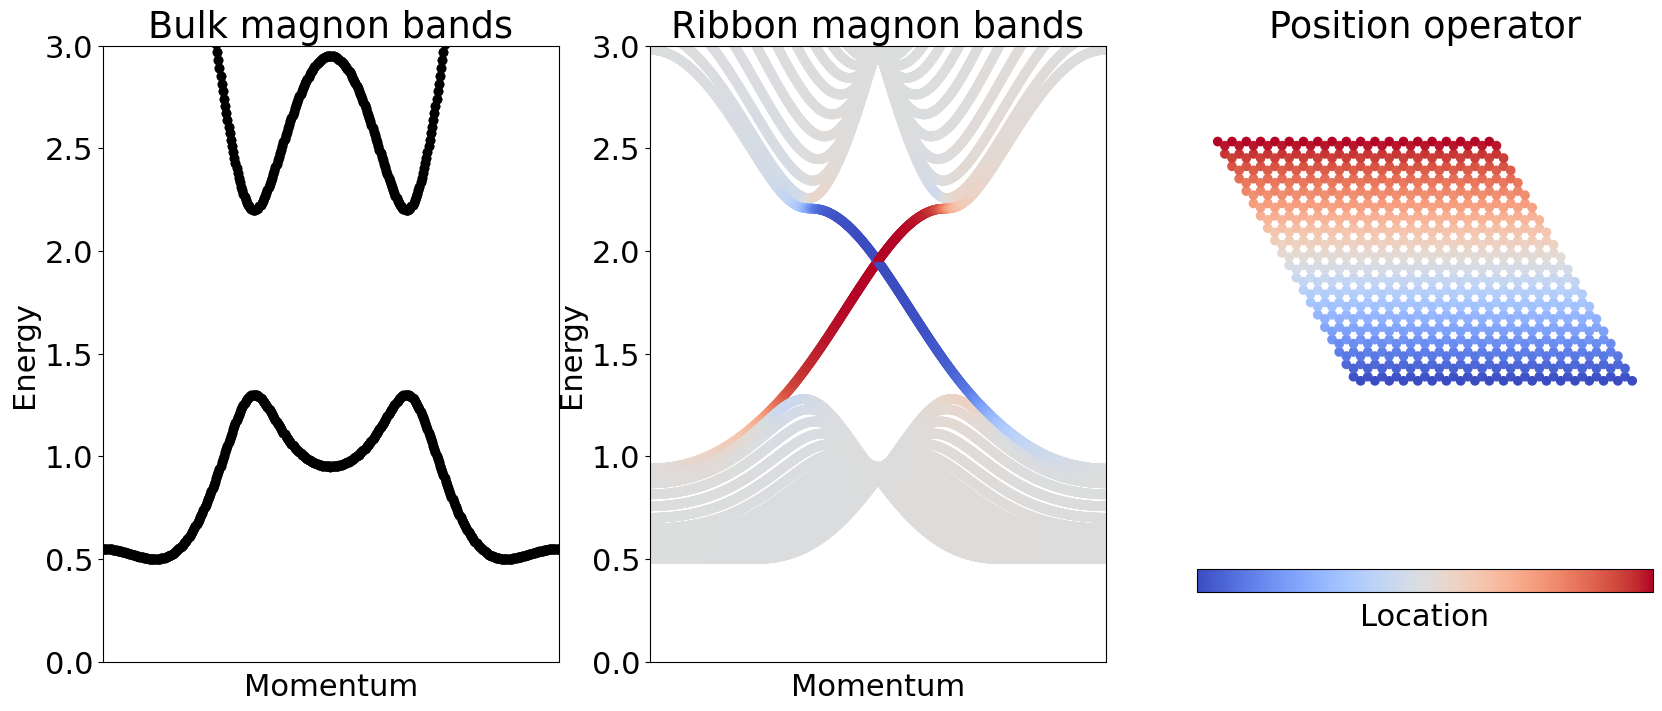

In [43]:
from pyqula import geometry, ribbon
g = geometry.honeycomb_lattice() # honeycomb lattice
h = g.get_hamiltonian(tij=[1.,0.2]) # generate the Hamiltonian
h.add_haldane(0.1) # add a coupling leadin to a topologicla gap
h.set_filling(0.0) ; h.add_onsite(0.5) # zero filling, and add a gap

# plot the bulk bands
plt.subplot(1,3,1) ; plt.title("Bulk magnon bands")
(k,e) = h.get_bands() # compute band structure
plt.scatter(k,e,c="black") ; plt.xlabel("Momentum") ; plt.ylabel("Energy") 
plt.xticks([]) ; plt.xlim([min(k),max(k)]) ; plt.ylim([0.,3.])# plot

h = ribbon.bulk2ribbon(h,n=20)

# plot the bands
plt.subplot(1,3,2) ; plt.title("Ribbon magnon bands")
(k,e,c) = h.get_bands(operator="yposition") # compute band structure
plt.scatter(k,e,c=c) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") 
plt.xticks([]) ; plt.xlim([min(k),max(k)]) ; plt.ylim([0.,3.])# plot

# draw a ribbon with the position operator
gs = h.geometry.get_supercell(20) 
plt.subplot(1,3,3) ; plt.title("Position operator")
plt.scatter(gs.r[:,0],gs.r[:,1],c=gs.r[:,1]) ; plt.axis("equal") ; plt.axis("off")
plt.colorbar(label="Location",ticks=[],orientation="horizontal")

### Exercise
- Change the value of the coupling opening a topologicla magnon gap (add_haldane). Do you still observe magnon edge states?
- Change the value of the second neighbor hopping (tij=[1.,t2]). Do you still observe magnon edge states?
- Discuss why the magnon eigenspectra should be positive

#### In the lab
- Signatures of magnon gaps at the Dirac pont in CrI3 have been observed
https://journals.aps.org/prx/abstract/10.1103/PhysRevX.8.041028

## Heavy-fermions in van der Waals heterostructures
We now explore how the electronic structure of a van der Waals material is modified in the presence of a Kondo lattice. In the screened regime, a Kondo lattice will open up a heavy fermion gap in a metallic 2D material

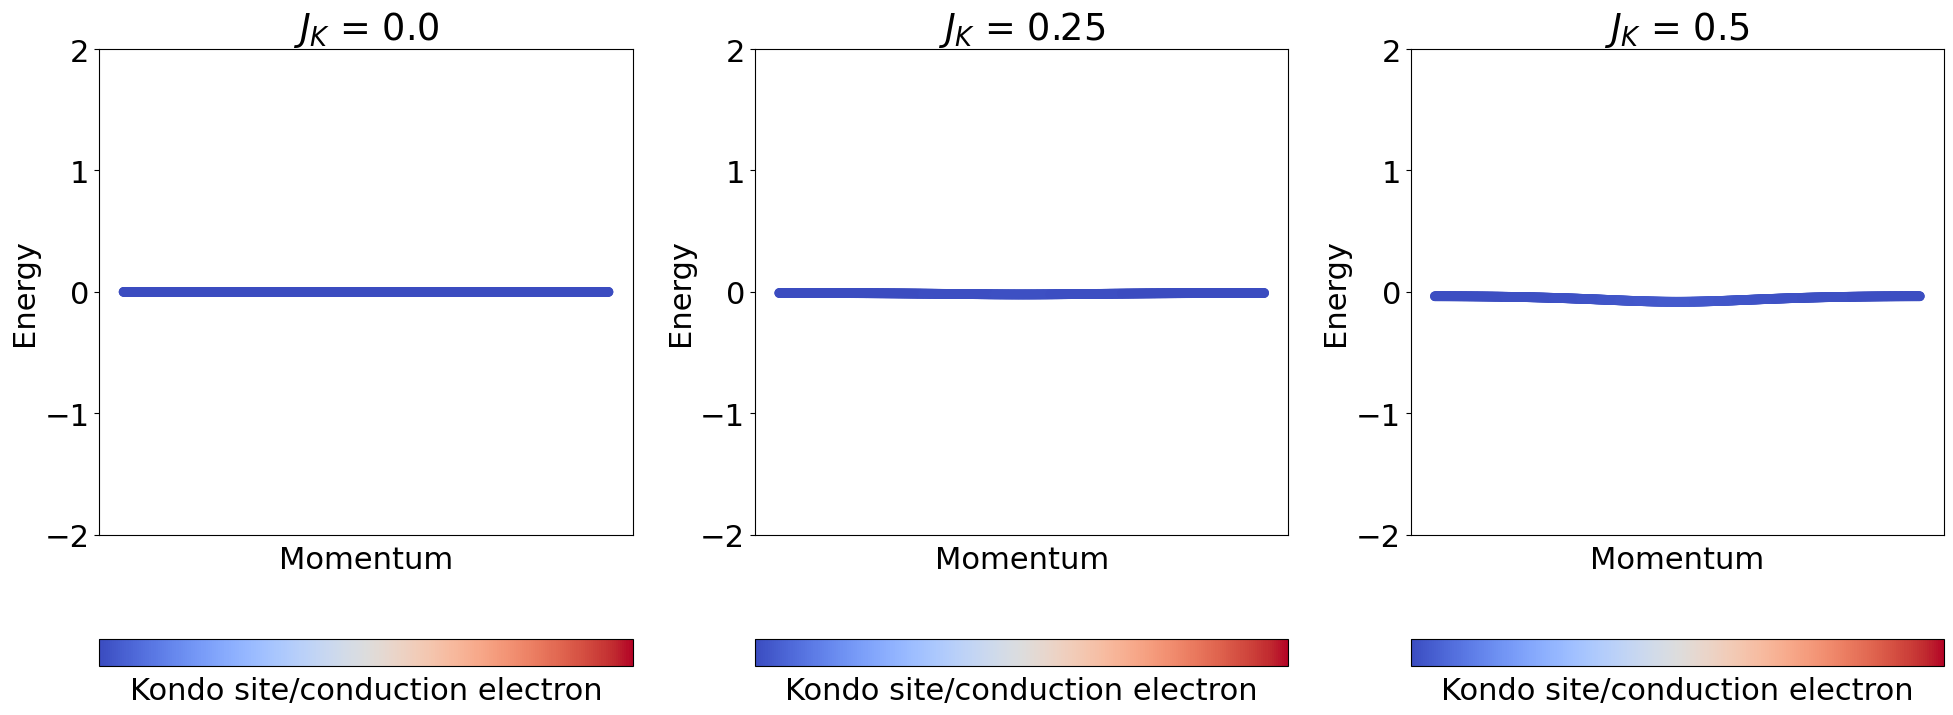

In [44]:
from pyqula import geometry
from pyqula.specialhamiltonian import H2HFH # promote a Hamiltonian to a heavy-fermion Hamiltonian
JKs = np.linspace(0.,.5,3) # chemical potentials
g = geometry.square_lattice() # take a honeycomb lattice
iw = 1 # counter
delta = 0.5 # value of the superconducting order
for JK in JKs: # loop over local potentials
    h = g.get_hamiltonian() ; h.add_onsite(3.0) # generate Hamiltonian
    h = H2HFH(h,JK=JK) # add a Kondo lattice in the fully screened regime 
    plt.subplot(1,len(JKs),iw) 
    iw +=1 ; plt.title("$J_K$ = "+str(np.round(JK,3)))
    (k,e,c) = h.get_bands(operator="dispersive_electrons",kpath=["G","X","G"]) # compute band structure
    plt.scatter(k,e,c=c,vmin=0.,vmax=0.8) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") 
    plt.xticks([]) ; plt.ylim([-2.,2.])
    plt.colorbar(label="Kondo site/conduction electron",ticks=[],orientation="horizontal")
plt.tight_layout() # adjust

### Exercise
- Discuss what is teh origin of the flat blue band
- Discuss what is the physical origin of the anticrossing between the blue and red band
- Change the chemical potential. Do you still observe a gap opening in the electronic structure? Discuss why

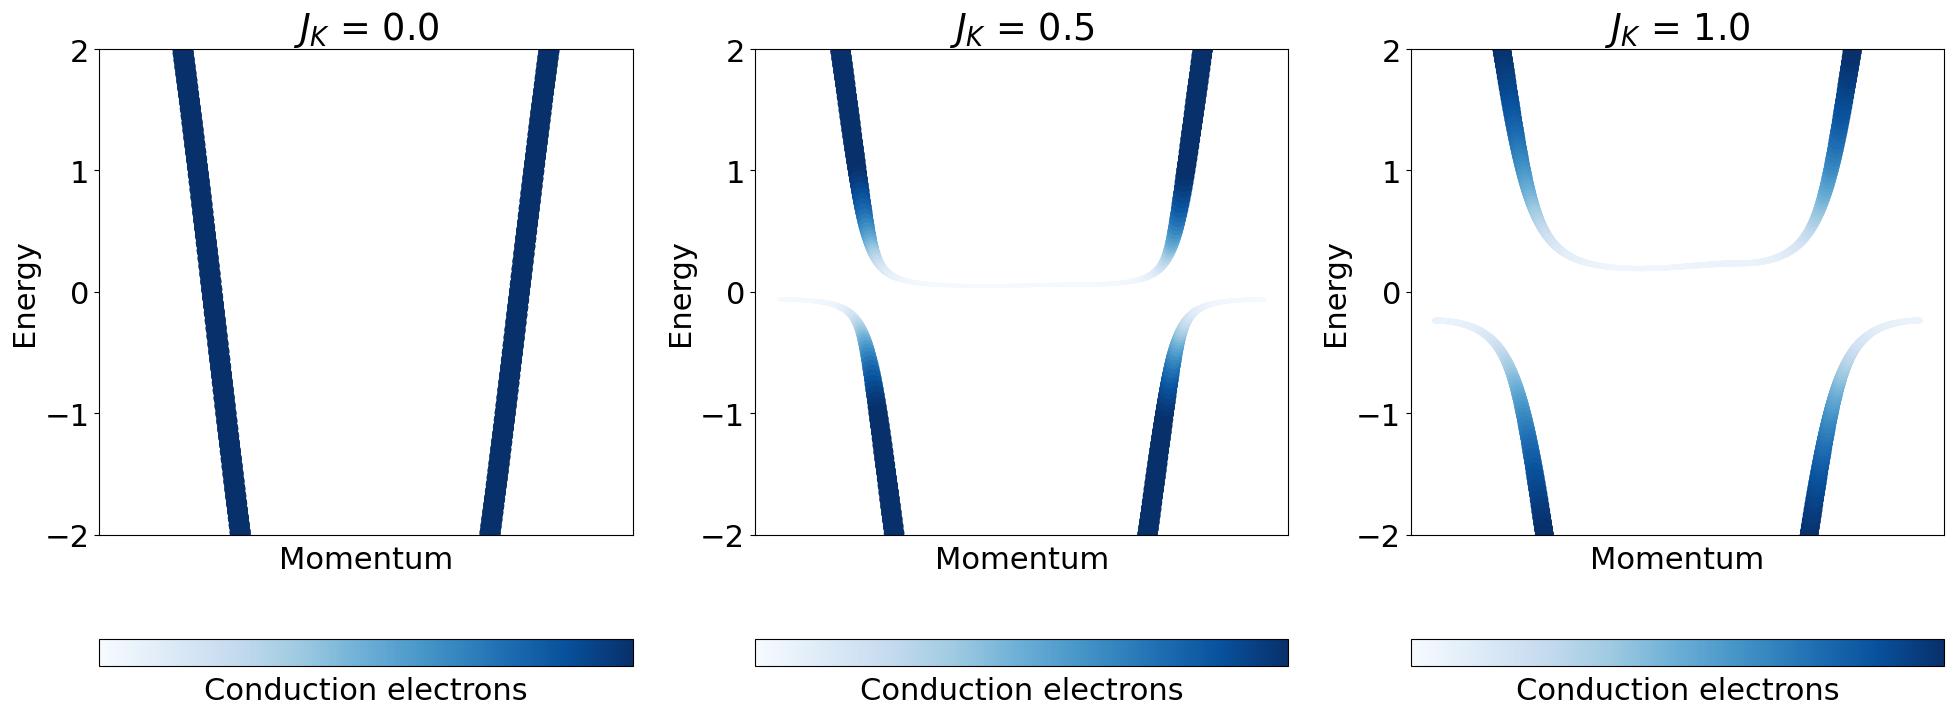

In [45]:
from pyqula import geometry
from pyqula.specialhamiltonian import H2HFH # promote a Hamiltonian to a heavy-fermion Hamiltonian
JKs = np.linspace(0.,1.,3) # chemical potentials
g = geometry.triangular_lattice() # take a triangular lattice
iw = 1 # counter
delta = 0.5 # value of the superconducting order
JK = 1. # Kondo coupling
for JK in JKs: # loop over local potentials
    h = g.get_hamiltonian() ; h.add_onsite(-2.0) # generate Hamiltonian
    h = H2HFH(h,JK=JK) # add a Kondo lattice in the fully screened regime 
    plt.subplot(1,len(JKs),iw) 
    iw +=1 ; plt.title("$J_K$ = "+str(np.round(JK,3)))
    (k,e,c) = h.get_bands(operator="dispersive_electrons",kpath=["G","K","M","G"]) # compute band structure
    plt.scatter(k,e,c=c,s=200*c,cmap="Blues",vmin=0.,vmax=0.8) ; plt.xlabel("Momentum") ; plt.ylabel("Energy") 
    plt.xticks([]) ; plt.ylim([-2.,2.])
    plt.colorbar(label="Conduction electrons",ticks=[],orientation="horizontal")
plt.tight_layout() # adjust

### Exercise
- Change the chemical potential. Do you still observe a gap opening in the electronic structure? Discuss why
- Replace the triangular lattice by a honeycomb lattice. Do you observe a gap opening? Discuss why

#### In the lab
- Heavy fermions in a van der Waals heterostructure leading to a Kondo insulator have been observed in 1T-TaS2/1H-TaS2 heterostructures
https://www.nature.com/articles/s41586-021-04021-0

### Exercise
- See if you can create such a topological phase transition with an in-plane exchange field. 
- Why is an out of plane exchange field required? 
- Discuss with your colleagues if there is some symmetry reason why an in-plane exchange field does not work